# import

In [1]:
import os
import sys
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import pickle
from copy import deepcopy

sys.path.append("/data1/lichen/code/cell_state_control/scControl/v1")
sys.path.append("/data1/lichen/code/ECA2.0/drug_experiment/code/ISDE_GRN/GRN_benchmark/CellOracle_benchmark/CellOracle_based_function/")


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import utils
import GRN_func
import GNN_recover
import TF_inference
import TF_inference_torch
import plot
import link_recover
import pca_umap

from utils import *
from GRN_func import *
from GNN_recover import *
from TF_inference import *
from TF_inference_torch import *
from plot import *
from link_recover import *
from pca_umap import *

/data1/lichen/anaconda3/envs/dgl/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/data1/lichen/anaconda3/envs/dgl/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/data1/lichen/anac

In [3]:
importlib.reload(utils)
importlib.reload(GRN_func)
importlib.reload(GNN_recover)
importlib.reload(TF_inference)
importlib.reload(TF_inference_torch)
importlib.reload(plot)
importlib.reload(link_recover)
importlib.reload(pca_umap)

<module 'pca_umap' from '/data1/lichen/code/cell_state_control/scControl/v1/pca_umap.py'>

In [4]:
import gseapy
gseapy.__version__

'1.0.6'

In [5]:
from utility.utility import intersect
from trajectory.oracle_utility import _is_perturb_condition_valid
from trajectory.oracle_utility import _adata_to_df
from adjustText import adjust_text

In [6]:
import celloracle as co
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 读进part1中处理好的adata

In [7]:
# initial the data_dir and prefix
data_dir = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/'
result_dir = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/'
prefix = 'three_branch'
os.makedirs(result_dir, exist_ok=True)

# read adata
# adata = sc.read(os.path.join(data_dir,prefix,'adata_oracle_v1.h5ad'))
# adata = sc.read(os.path.join(data_dir,prefix,'adata_oracle_v1_addTF4.h5ad'))
adata = sc.read(os.path.join(data_dir,prefix,'adata_oracle_v1.h5ad'))


# ensure the cluster_name
cluster_name = 'celltype'

# print basic info of the adata
print(f"Cell number is :{adata.shape[0]}")
print(f"Gene number is :{adata.shape[1]}")
print('the cluster_name count is:')
adata.obs[cluster_name].value_counts()

Cell number is :2688
Gene number is :2748
the cluster_name count is:


Hair Shaft-cuticle.cortex    672
IRS                          672
Medulla                      672
TAC-1                        672
Name: celltype, dtype: int64

# 将adata导入oracle并计算GRN

the base_GRN shape is (32608, 1095)


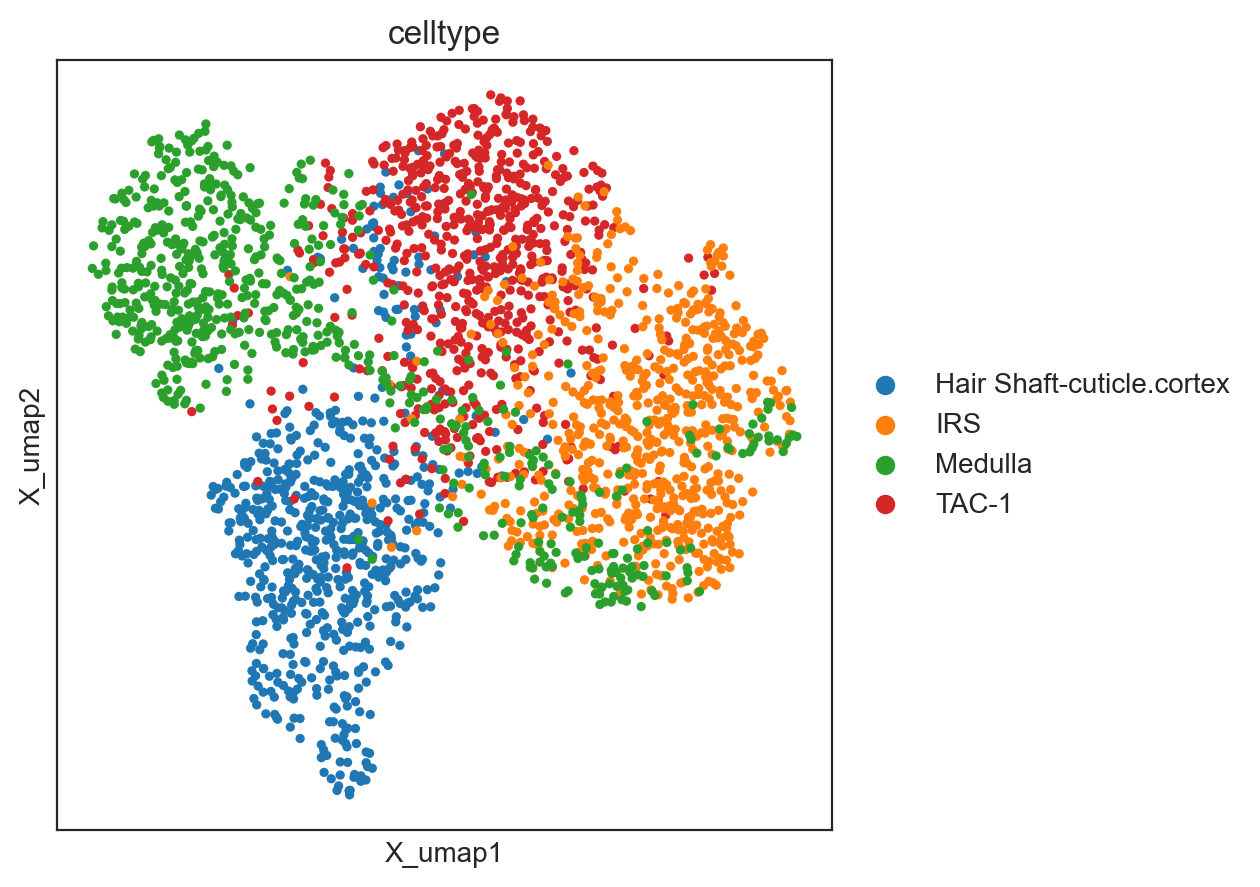

In [8]:

# get the save_prefix_1
# save_prefix_1 = 'v1' 
# save_prefix_1 = 'v1_addTF4' 
save_prefix_1 = 'v1' 

# get save_dir_1, this is for the oracle and link obj
save_dir_1 = os.path.join(result_dir,prefix,save_prefix_1)
os.makedirs(save_dir_1,exist_ok=True)

# read the base_GRN 

base_GRN = pd.read_parquet(os.path.join('/nfs/public/lichen/results/ISDE_GRN/SHARE-seq/','skin',"base_GRN_dataframe_stream.parquet"))
print(f"the base_GRN shape is {base_GRN.shape}")


# train a pca and umap on the adata first, and input the adata to the oracle.
# the pca and umap model is for later visualize the transition
pca_train,umap_train,oracle = pca_umap_train(adata,
                   cluster_column_name=cluster_name,
                   embedding_name="X_umap",
                   n_components=50,
                   svd_solver='arpack',
                   random_seed=2022)

# visualize the umap
None

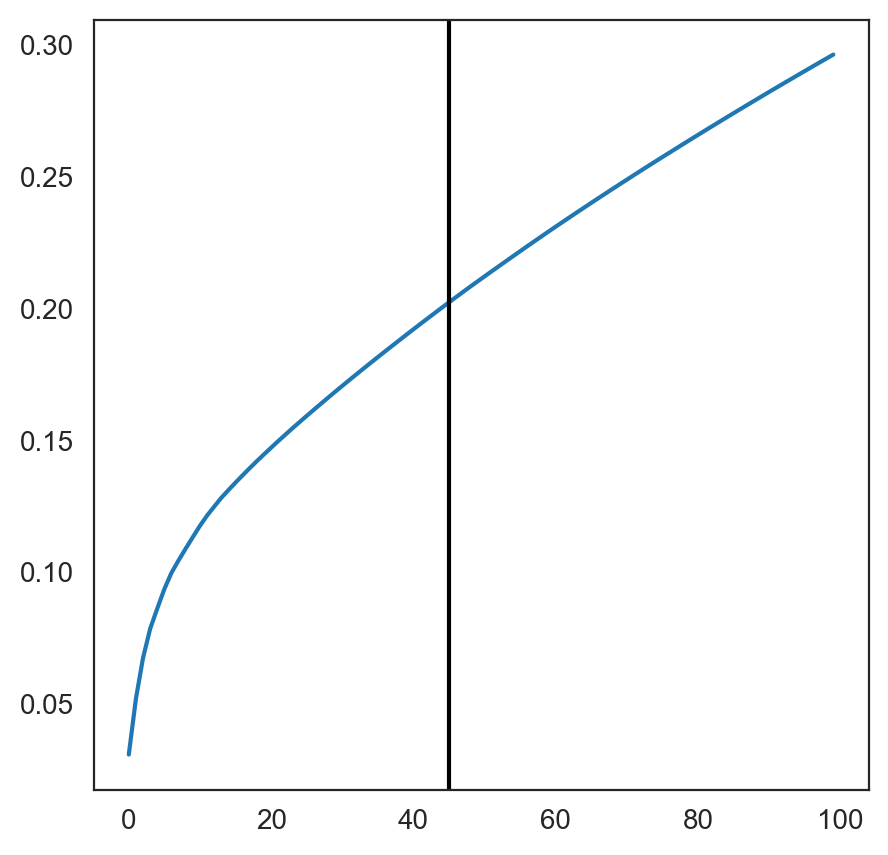

n_comps is: 45
cell number is :2688
Auto-selected k is :67
but we set default k is: 10


In [7]:
# import the base_GRN to the oracle , and do the imputation
oracle.import_TF_data(TF_info_matrix=base_GRN)
oracle = oracle_preprocess(oracle)

In [9]:
oracle.adata.obs['total'] = 'total'

  0%|          | 0/1 [00:00<?, ?it/s]

Inferring GRN for total...


  0%|          | 0/2593 [00:00<?, ?it/s]

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

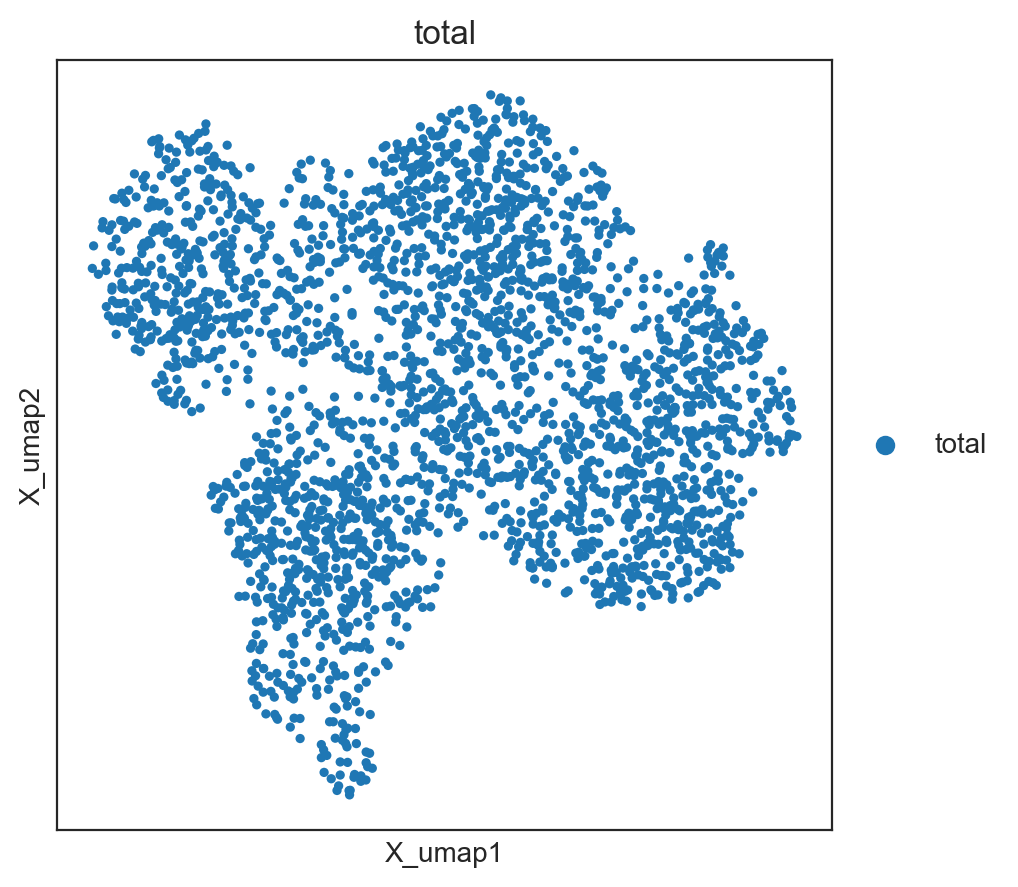

CPU times: user 2min 46s, sys: 13.9 s, total: 3min
Wall time: 3min 24s


In [10]:
%%time
# Calculate GRN for each population in "louvain_annot" clustering unit.
# This step may take some time.(~30 minutes)
cluster_name_for_GRN_unit = cluster_name
links = oracle.get_links(cluster_name_for_GRN_unit='total', 
                         alpha=10,
                         verbose_level=10) # 值得注意的在计算link的时候用的都是oracle.adata的imputed count

In [11]:
# save oracle and links
oracle.to_hdf5(os.path.join(save_dir_1,"{}.celloracle.oracle".format(prefix)))
links.to_hdf5(file_path=os.path.join(save_dir_1,"links.celloracle.links"))

# 查看umap

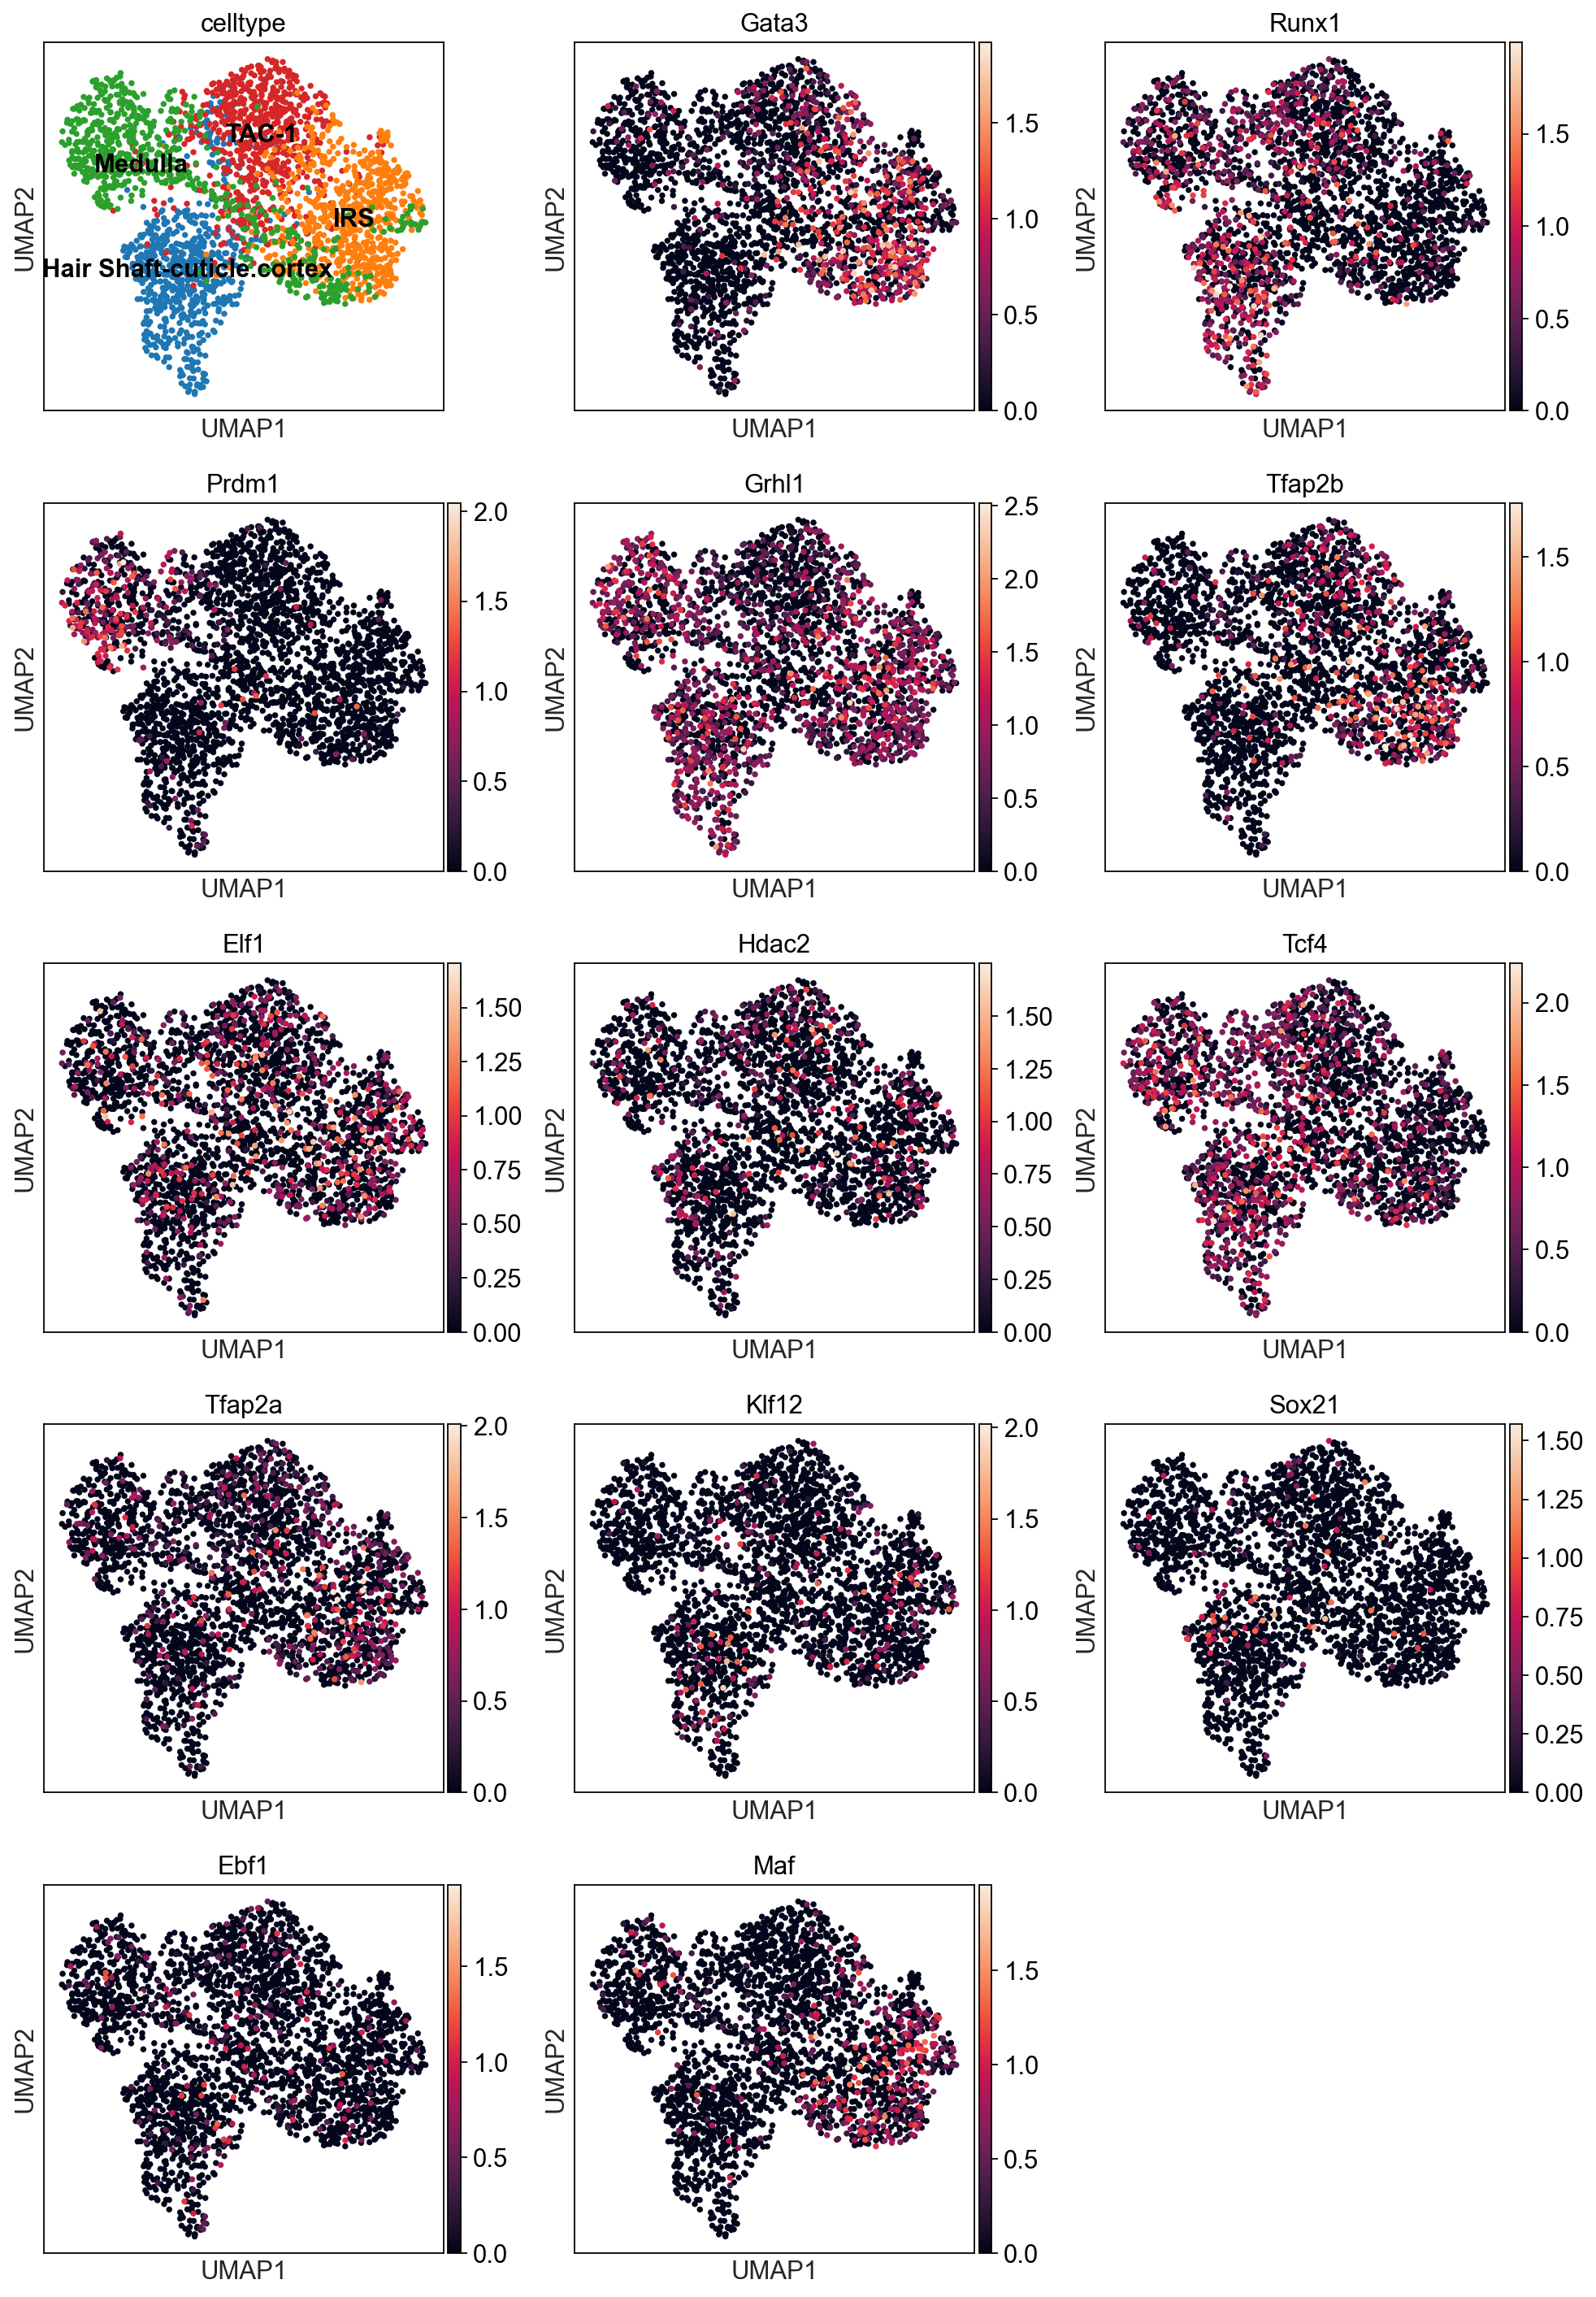

In [92]:
sc.settings.set_figure_params(dpi=80, facecolor='white',figsize=(4,4),frameon=True)
sc.pl.umap(oracle.adata, color=['celltype','Gata3','Runx1','Prdm1','Grhl1',
                               'Tfap2b','Elf1','Hdac2','Tcf4',
                               'Tfap2a','Klf12','Sox21','Ebf1','Maf'],ncols=3,
           legend_loc='on data')

# 重新根据filtered links计算GRN

In [10]:
# read oracle and links
oracle = co.load_hdf5(os.path.join(save_dir_1,"{0}.celloracle.oracle".format(prefix)))
links = co.load_hdf5(file_path=os.path.join(save_dir_1,"links.celloracle.links"))

In [11]:
# get the processed adata from oracle
adata = oracle.adata.copy() 
adata.X = adata.layers['normalized_count'].toarray()  # here we make the data sparse, not sure if there are problems
# and this normalized_count has been log by oracle on original normalized raw count

In [16]:
# # set the link threshold and do inference again
# threshold_number = 10000
# alpha_fit_GRN = 10
# links.filter_links(threshold_number=threshold_number,
#                    p=0.001,
#                    weight='coef_abs')
# oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
# oracle.fit_GRN_for_simulation(alpha=alpha_fit_GRN,
#                               use_cluster_specific_TFdict=True)

  0%|          | 0/22 [00:00<?, ?it/s]

# 获取baseGRN中的所有TF

In [15]:
TFdict = import_TF_data(TF_info_matrix=base_GRN)

tf_target_dict = {}
for target, gene_set in TFdict.items():
    for tf in gene_set:
        if tf not in tf_target_dict:
            tf_target_dict[tf] = []
            tf_target_dict[tf].append(target)
        else:
            tf_target_dict[tf].append(target)
total_tf_list = list(tf_target_dict.keys())

In [11]:
len(total_tf_list)

1093

# 该版本为修改了筛选tf方式和画图方式的版本

In [16]:
# import matplotlib as mpl
# mpl.rcParams["font.sans-serif"]=["Arial"]
# mpl.rcParams["axes.unicode_minus"]=False
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42
# mpl.rcParams['text.color'] = 'black'
set_plot_para()

## 正式版 - TAC->IRS

In [17]:
adata.obs[cluster_name].value_counts()

Hair Shaft-cuticle.cortex    672
IRS                          672
Medulla                      672
TAC-1                        672
Name: celltype, dtype: int64

finish oracle_links_part load


  0%|          | 0/1 [00:00<?, ?it/s]

=======control cluster is:  IRS========


  0%|          | 0/1 [00:00<?, ?it/s]

==========model:ridge, alpha:1
correlation is: 0.9299786162315283


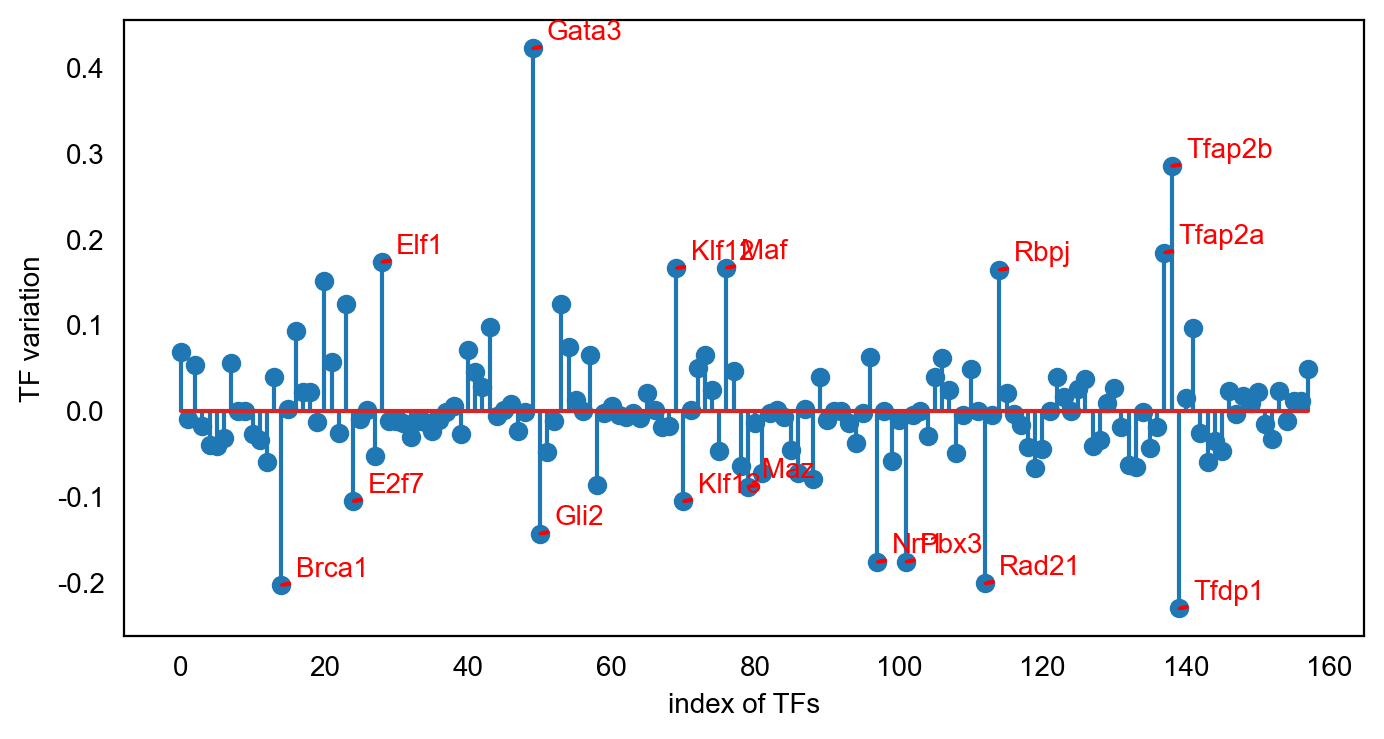

the percentile threshold is 92.96875
0.1665964025635736 -0.10489031419009612 0.5214650763900948


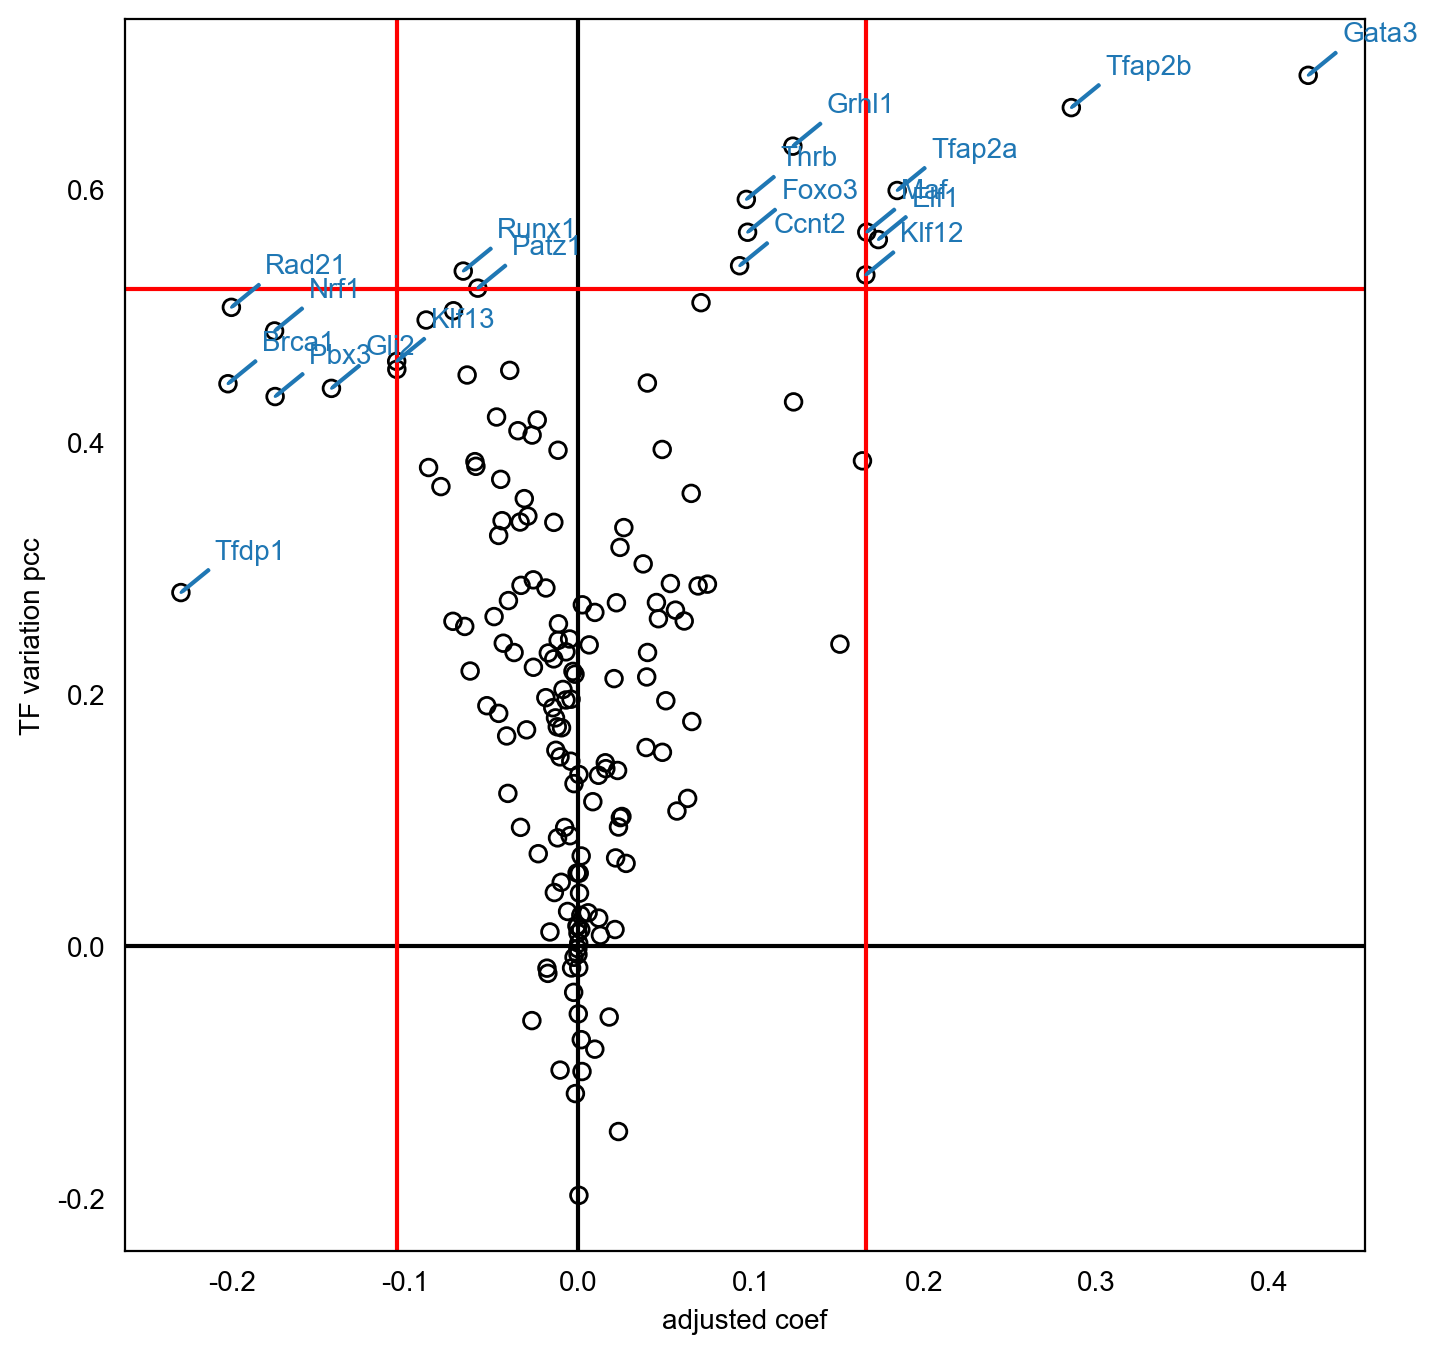

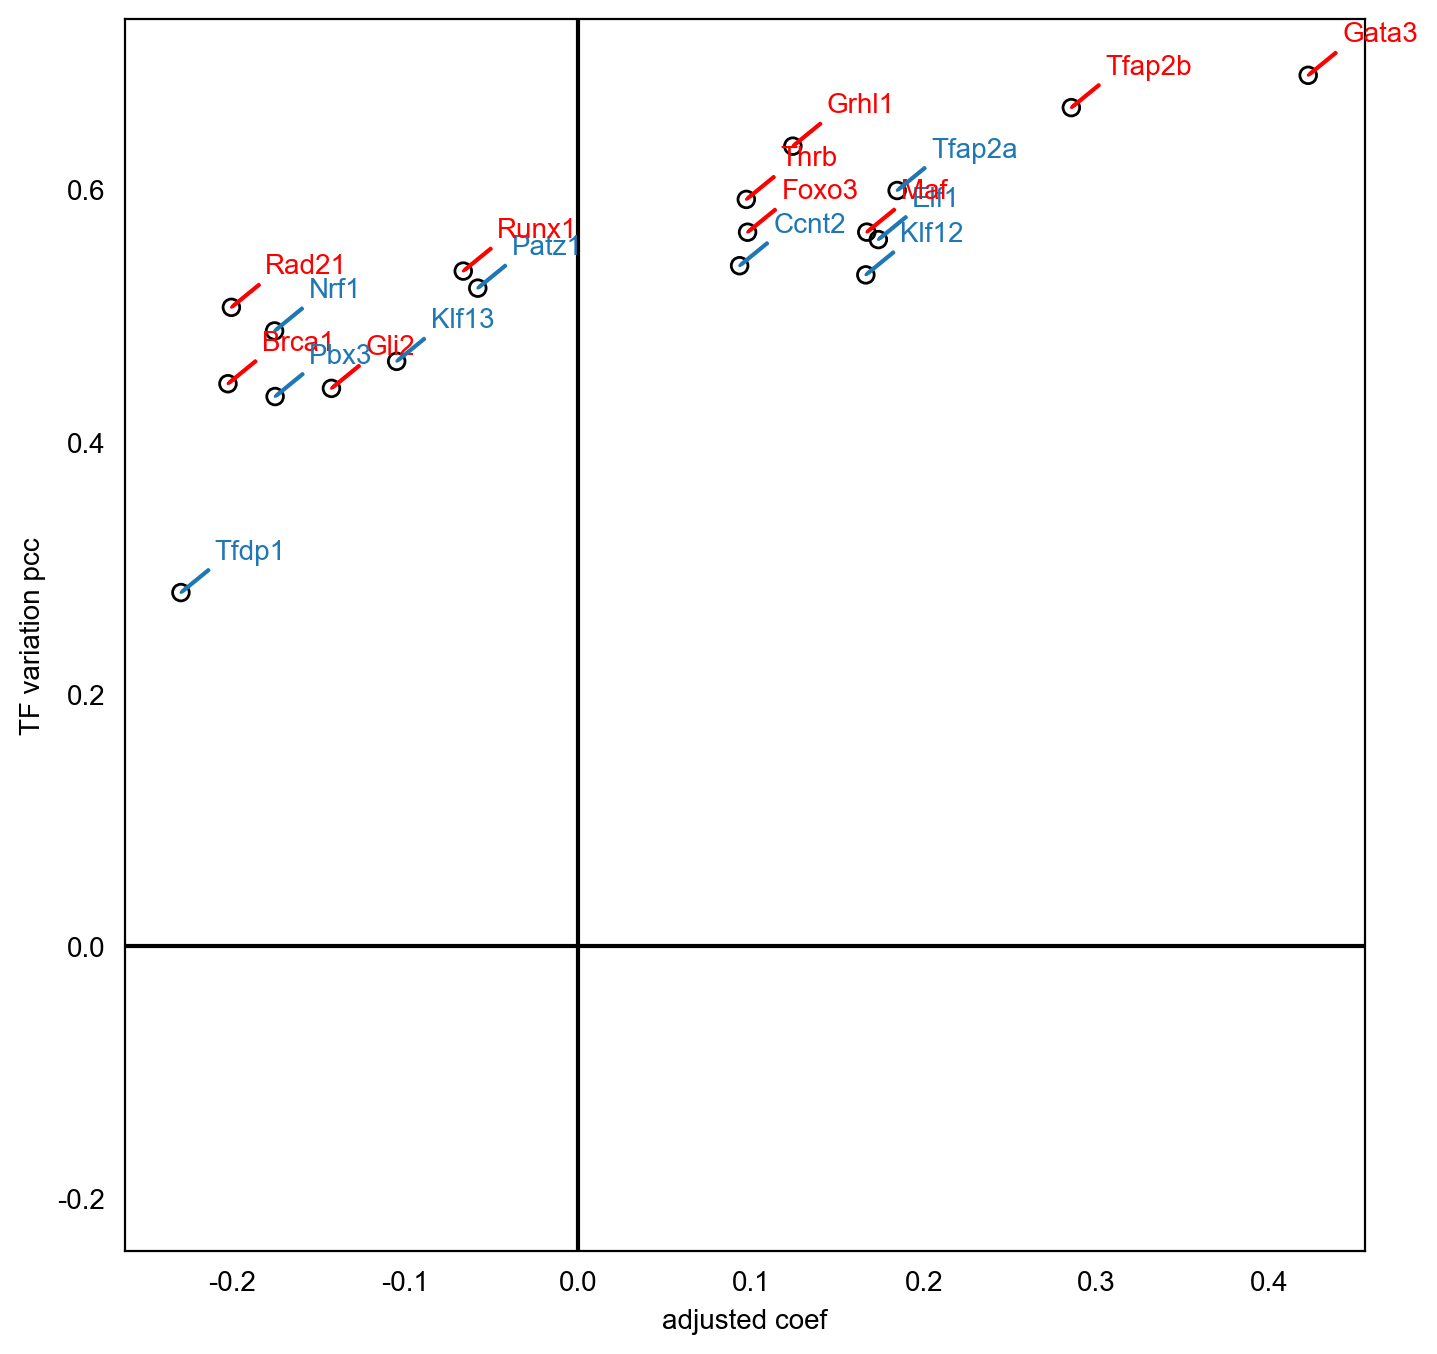

In [18]:


tmp_list = list(adata.obs[cluster_name].unique())
# tmp_list.remove('louvain5')
init_cluster = 'TAC-1'
# tmp_list = ['8-0']
score_de_list, score_our_list = [], []
total_tf_pos_control_norecover_list, total_pos_gene_filter_norecover_list = [], []
for control_cluster in tmp_list:
    control_cluster = 'IRS'
    
    
    tmp_control = control_cluster
    tmp_name = 'combine_init_cluster'
    combine = '_'.join([init_cluster,tmp_control])
    
    save_dir_part = os.path.join(save_dir_1, f'oracle_links_part')
    os.makedirs(os.path.join(save_dir_part,combine), exist_ok=True)
    
    if not os.path.exists(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle")):
        oracle_part = oracle.copy()
        oracle_part.adata = oracle.adata[oracle.adata.obs[cluster_name].isin([init_cluster,tmp_control])]
        oracle_part.adata.obs[tmp_name] = '_'.join([init_cluster,tmp_control])
        oracle_part.adata.obs[tmp_name] = oracle_part.adata.obs[tmp_name].astype('category')
        oracle_part.cluster_column_name = tmp_name
        oracle_part.adata.uns[f'{tmp_name}_colors'] = np.array(['#ead3c6'])
        # Calculate GRN for each population in "louvain_annot" clustering unit.
        # This step may take some time.(~30 minutes)
        links_part = oracle_part.get_links(cluster_name_for_GRN_unit=tmp_name, 
                                 alpha=10,
                                 verbose_level=10)


        save_dir_part = os.path.join(save_dir_1, f'oracle_links_part')
        os.makedirs(save_dir_part, exist_ok=True)
        oracle_part.to_hdf5(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle"))
        links_part.to_hdf5(file_path=os.path.join(save_dir_part,combine,"links.celloracle.links"))
    else:
        oracle_part = co.load_hdf5(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle"))
        links_part = co.load_hdf5(file_path=os.path.join(save_dir_part,combine,"links.celloracle.links"))
    
    print('finish oracle_links_part load')
    
    
    # set the link threshold and do inference again
    threshold_number = 10000
    alpha_fit_GRN = 10
    links_part.filter_links(threshold_number=threshold_number,
                       p=0.001,
                       weight='coef_abs')
    oracle_part.get_cluster_specific_TFdict_from_Links(links_object=links_part)
    oracle_part.fit_GRN_for_simulation(alpha=alpha_fit_GRN,
                              use_cluster_specific_TFdict=True)
    
    # control_cluster = tmp_control
    print(f"=======control cluster is:  {control_cluster}========")
    total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori, \
    total_tf_GRN_filter_mtx, total_tf_GRN_dict, total_tf_info_df, \
    total_total_rs_dict, total_mean_rs_dict = get_GRN_parameters(oracle_part,
                                                               links_part,
                                                               if_print=False)
    
    total_tf_GRN_dict_ori = total_tf_GRN_dict.copy()
    
    infer_layer = 'normalized_count' # imputed_count
    tf_list = list(total_tf_GRN_dict[combine].keys())
    
    
    total_gene_GRN_mtx, total_tf_GRN_mtx = total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori
    # the recovered links
    gene_GRN_mtx = total_gene_GRN_mtx[combine]
    tf_GRN_mtx = total_tf_GRN_mtx[combine]
    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]

    gene_list = list(tf_GRN_mtx.columns)
    layer_use = 'normalized_count'
    cluster_name_for_GRN_unit = cluster_name
    
    tf_GRN_dict = total_tf_GRN_dict[combine]
    
    
    recover_ = True
    # start recover
    if recover_ == True:
        # parameters for training GNN model
        n_splits = 10
        seed = 42
        neg_link_split = 'all' # 'all'/'neg_hard_sampling'; 
        #'all' use all remaining negative links to train the model
        #'neg_hard_sampling' use the paired links to the positive links
        model_name = 'GAT' # 'GraphSAGE'/'GAT'/'GCN'
        pred_name = 'mlp' #'mlp'/'dot'
        hidden_dim = 16
        out_dim = 7
        num_heads = [4, 4, 6]
        epochs = 1500
        lr = 0.01
        patience = 300
        gpu = 3
        verbose = True
        # set the torch device
        if torch.cuda.is_available():
            device='cuda'
            torch.cuda.set_device(gpu)
        else:
            device='cpu'

        prefix = f'threshold{threshold_number}_seed{seed}_{model_name}_epochs{epochs}_patience{patience}' # seedxxx_model_epochxxx_earlyxxx
        # the model dir that save model and pred, used for earlystopping
        save_dir_GNN = os.path.join(save_dir_1, f'GNN_model/{prefix}/{combine}')
        model_dir = f'{save_dir_GNN}/model_checkpoint'+'/model.pt'
        pred_dir = f'{save_dir_GNN}/pred_checkpoint'+'/pred.pt'
        os.makedirs(f'{save_dir_GNN}/model_checkpoint', exist_ok=True)
        os.makedirs(f'{save_dir_GNN}/pred_checkpoint', exist_ok=True)
        
        if os.path.exists(os.path.join(save_dir_GNN,'tf_gene_link_dict_Allfold.pickle')):
            with open(os.path.join(f'{save_dir_GNN}/tf_gene_link_dict_Allfold.pickle'), 'rb') as file:
                tf_gene_link_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/tf_gene_link_score_dict_Allfold.pickle'), 'rb') as file:
                tf_gene_link_score_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/model_dict_Allfold.pickle'), 'rb') as file:
                model_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/h_dict_Allfold.pickle'), 'rb') as file:
                h_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/thre_dict_Allfold.pickle'), 'rb') as file:
                thre_dict_Allfold = pickle.load(file)
            
        else:
            # construct the graph dataset
            adata_part = adata[adata.obs[cluster_name_for_GRN_unit]==init_cluster]
            dataset = GRN_Dataset(adata_part,tf_GRN_mtx,tf_list)
            graph = dataset[0]
            g = graph
            print(g)

            # train the model
            tf_gene_link_dict_Allfold,tf_gene_link_score_dict_Allfold,\
            model_dict_Allfold,h_dict_Allfold,thre_dict_Allfold\
            =   recover_links(g,
                              gene_list = gene_list,
                              n_splits = n_splits,
                              seed = seed,
                              neg_link_split = neg_link_split,
                              model_name = model_name,
                              pred_name = pred_name,
                              hidden_dim = hidden_dim,
                              out_dim = out_dim,
                              num_heads = num_heads,
                              epochs = epochs,
                              lr = lr,
                              patience = patience,
                              device = device,
                              model_dir = model_dir,
                              pred_dir = pred_dir,
                              verbose = verbose,
                              save_dir = save_dir_GNN,
                              tf_list = tf_list)
        
        # parameters for filter the links
        if_inv = False
        count_fold = 9
        iter_step = 1
        iter_step_inv = 4
        link_score_quantile = 0.1 # 0-1 to filter the percentage of recover links
        delete_percent = 0

        # filter the links
        df_tmp, tf_target_link, tf_target_iter_link, tf_recover_link\
            =   filter_recover_links(tf_GRN_dict = tf_GRN_dict,
                                     gene_list = gene_list,
                                     tf_list = tf_list,
                                     tf_gene_link_dict_Allfold = tf_gene_link_dict_Allfold,
                                     tf_gene_link_score_dict_Allfold = tf_gene_link_score_dict_Allfold,
                                     count_fold = count_fold,
                                     iter_step = iter_step,
                                     if_inv = if_inv,
                                     iter_step_inv = iter_step_inv,
                                     link_score_quantile = link_score_quantile)
        
        # delete links
        # construct total TFGene_score_dict
        TfGene_score_dict = {}
        for tf in tf_list:
            # tf = 'Gata3'

            idx = gene_list.index(tf)
            idx_list = list(np.arange(len(gene_list)))
            idx_list.remove(idx)

            # count the show times of folds and construct the tf_recover_link
            tf_folds_array = [tmp[tf] for key,tmp in tf_gene_link_dict_Allfold.items()]
            tf_folds_array = np.array(tf_folds_array)
            tf_folds_score_array = np.array([tmp[tf] for key,tmp in tf_gene_link_score_dict_Allfold.items()])
            count = np.sum(tf_folds_array,axis=0)
            link_score = np.mean(tf_folds_score_array,axis=0)

            for i,gene in enumerate(np.array(gene_list)[np.array(idx_list)]):
                TfGene_score_dict['_'.join([tf,gene])] = link_score[i]

            # # filter the links with fewer links across folds
            # tf_waiting_list = np.array(gene_list)[np.array(idx_list)[count>=count_fold]]
            # link_score_filter = link_score[count>=count_fold]

        # get the values of filtered_links
        df_tmp = links_part.filtered_links[combine]
        filter_score_list = []
        for i in range(threshold_number):
            filter_score_list.append(TfGene_score_dict['_'.join([df_tmp.iloc[i,0],df_tmp.iloc[i,1]])])

        # get the thre
        thre = np.quantile(filter_score_list,delete_percent)
        
        # get rows that are less than thre
        filter_score_list = np.array(filter_score_list)
        delete_row_list = []
        for i in range(threshold_number):
            if TfGene_score_dict['_'.join([df_tmp.iloc[i,0],df_tmp.iloc[i,1]])] < thre:
                delete_row_list.append(i)
                
        df_tmp = df_tmp.reset_index(drop=True)
        df_tmp.drop(delete_row_list)
        # links_part_filter = links_part.copy()
        links_part_filter = deepcopy(links_part)
        links_part_filter.filtered_links[combine] = df_tmp.drop(delete_row_list)
        
        # Add links
        # add the links to a new link object and redo the GRN inference
        links_recover, tf_recover_filter_link =   add_recover_links(links = links_part_filter,
                                          tf_list = tf_list,
                                          init_cluster = combine,
                                          tf_recover_link = tf_recover_link,
                                          tf_target_iter_link = tf_target_iter_link)
        # refit the GRN
        oracle_part.get_cluster_specific_TFdict_from_Links(links_object=links_recover)
        oracle_part.fit_GRN_for_simulation(alpha=alpha_fit_GRN,
                                      use_cluster_specific_TFdict=True)
        
        # update the gene_GRN_mtx and tf_GRN_mtx, then again use add_recover_links function
        # to encode tf_GRN_mtx
        gene_GRN_mtx = oracle_part.coef_matrix_per_cluster[combine].copy()
        tf_GRN_mtx = gene_GRN_mtx[~(gene_GRN_mtx == 0).all(axis=1)]
        
        # update the links_recover
        links_recover, tf_recover_filter_link =   add_recover_links(links = links_part_filter,
                                          tf_list = tf_list,
                                          init_cluster = combine,
                                          tf_recover_link = tf_recover_link,
                                          tf_target_iter_link = tf_target_iter_link,
                                          tf_GRN_mtx = tf_GRN_mtx)
        
        
        # reload the parameter
        total_gene_GRN_mtx, total_tf_GRN_mtx, \
        total_tf_GRN_filter_mtx, total_tf_GRN_dict, total_tf_info_df, \
        total_total_rs_dict, total_mean_rs_dict = get_GRN_parameters(oracle_part,
                                                                   links_recover,
                                                                   if_print=False)
    else:
        total_gene_GRN_mtx, total_tf_GRN_mtx = total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori

    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]
    

    # set parameters

    # the basic parameters
    # init_cluster, control_cluster = '0', '2'
    # init_cluster, control_cluster = 'S3-S1-TAC', 'S3-S1-Hair Shaft-cuticle.cortex'
    infer_layer = 'normalized_count' # imputed_count
    tf_list = list(total_tf_GRN_dict[combine].keys())

    # the recovered links
    gene_GRN_mtx = total_gene_GRN_mtx[combine]
    tf_GRN_mtx = total_tf_GRN_mtx[combine]
    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]

    gene_list = list(tf_GRN_mtx.columns)
    layer_use = 'normalized_count'
    cluster_name_for_GRN_unit = cluster_name
    
    
    # set up parameters
    layer_use = 'normalized_count'
    model = 'ridge'
    alpha = 1
    plot = True
    a = [0.6,0.2,0.2]
    regression_percentile = 90
    prop_mode = 'soft'
    tf_index = gene_GRN_mtx.index.isin(tf_list)
    
    if recover_:
        save_dir_2 = f'recover_{recover_}/{combine}/filter_quantile_{link_score_quantile}-model-{model}_alpha-{alpha}_a-{a[0]}-{a[1]}-{a[2]}-threshold_{threshold_number}'
    else:
        save_dir_2 = f'recover_{recover_}/{combine}/model-{model}_alpha-{alpha}_a-{a[0]}-{a[1]}-{a[2]}-threshold_{threshold_number}'
    os.makedirs(os.path.join(save_dir_1,save_dir_2),exist_ok=True)
    
    # infer the variation of the TFs

    plt.rcParams["figure.figsize"] = [8, 4]
    rr,X,init_ave,control_ave = control_TF_infer_recover(adata,
                                                cluster_name_for_GRN_unit,
                                                tf_list,
                                                gene_GRN_mtx,
                                                tf_GRN_mtx,
                                                init_cluster,
                                                control_cluster,
                                                gene_GRN_mtx_ori=gene_GRN_mtx_ori ,
                                                tf_GRN_mtx_ori=tf_GRN_mtx_ori,
                                                prop_mode = prop_mode,
                                                layer_use=layer_use,
                                                model=model, 
                                                alpha=alpha, 
                                                plot=plot,
                                                a1=a[0],
                                                a2=a[1],
                                                a3=a[2],
                                                regression_percentile = regression_percentile,
                                                annot_shifts=(2,0.01),
                                                xlabel='index of TFs',
                                                ylabel='TF variation',
                                                save=os.path.join(save_dir_1,save_dir_2,'regression_coef.png'))
    rr_corr = rr
    
    TF_pcc_dict, TF_acc_dict = cal_control_pcc(change_tf=tf_list,
                                  rr=rr_corr,
                                  tf_GRN_mtx=tf_GRN_mtx,
                                  diff_ave=(control_ave-init_ave).ravel(),
                                  mode='single',
                                  if_print=False,
                                  tf_GRN_dict=total_tf_GRN_dict[combine],
                                  X=X)
    
    pos_gene, neg_gene, pos_gene_tf, neg_gene_tf = get_de_genes(adata,
                                                             cluster_name_for_GRN_unit,
                                                             init_cluster,
                                                             control_cluster,
                                                             tf_list,
                                                             p_val=0.05)
    
    x_name, y_name = 'adjusted coef', 'TF variation pcc'
    percentile1 = 90
    percentile2 = 90
    plot_de_gene = True
    TF_number=10


    df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
    
    percentile = get_percentile_thre(df, 'value', True, x_name, y_name, TF_number=TF_number)
    
    save_dir_3 = f'percentile1-{percentile1}_percentile2-{percentile2}'
    os.makedirs(os.path.join(save_dir_1,save_dir_2,save_dir_3),exist_ok=True)
    
    save = os.path.join(save_dir_1,save_dir_2,save_dir_3,'compare')
    os.makedirs(save,exist_ok=True)
    
    
    plt.rcParams["figure.figsize"] = [8, 8]
    save = ''
    save1 = os.path.join(save,'pcc_coef_compare.png')
    save2 = os.path.join(save,'pcc_coef_de_compare.png')
    save, save1, save2 = None, None, None
    change_tf=plot_score_comparison_2D(df, 
                             value='value', 
                             cluster1=x_name, 
                             cluster2=y_name, 
                             percentile1=percentile,
                             percentile2=percentile,
                             annot_shifts=None, 
                             save=None, 
                             fillna_with_zero=True, 
                             plt_show=True,
                             select='union',
                             plot_de_gene=plot_de_gene,
                             neg_gene_tf=neg_gene_tf,
                             pos_gene_tf=pos_gene_tf,
                             title1='',
                             title2='',
                             save1=save1,
                             save2=save2)
    

#     plt.rcParams["figure.figsize"] = [8, 8]
#     save = ''
#     save1 = os.path.join(save,'pcc_coef_compare.png')
#     save2 = os.path.join(save,'pcc_coef_de_compare.png')
#     save, save1, save2 = None, None, None
    
#     save_dir = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/scatter_plot'
#     os.makedirs(save_dir,exist_ok=True)
#     save_dir_fig = os.path.join(save_dir,f'scatter_{control_cluster}.pdf')
#     change_tf=plot_score_comparison_2D_test(df, 
#                              value='value', 
#                              cluster1=x_name, 
#                              cluster2=y_name, 
#                              percentile1=percentile,
#                              percentile2=percentile,
#                              annot_shifts=None, 
#                              save=None, 
#                              fillna_with_zero=True, 
#                              plt_show=True,
#                              select='union',
#                              plot_de_gene=plot_de_gene,
#                              neg_gene_tf=neg_gene_tf,
#                              pos_gene_tf=pos_gene_tf,
#                              title1='Cell state '+control_cluster,
#                              title2='',
#                              save1=save_dir_fig,
#                              save2=save2,
#                              goi_size=10,
#                              point_size=15,
#                              gt_tforf=[])
    
    
    # gt_trorf = np.unique([i.split('-')[1] for i in filter_tforf_dict[control_cluster]])
    # de_tforf_list = np.intersect1d(total_tf_list,pos_gene)
    # print(f'our method on cluster {cluster_name} is :\n {np.intersect1d(gt_trorf,change_tf)} ')
    # print(f'DE on cluster {cluster_name} is :\n {np.intersect1d(gt_trorf,de_tforf_list)} ')
    
    # calculate the benchmark score
    tf_pos_control_list = [i for i in change_tf if rr_corr.coef_[tf_list.index(i)]>0]
    tf_pos_control_pcc_list = [TF_pcc_dict[i] for i in tf_pos_control_list]
    zipped_lists = zip(tf_pos_control_pcc_list, tf_pos_control_list)
    sorted_lists = sorted(zipped_lists,reverse=True)
    tf_pos_control_pcc_list, tf_pos_control_list = zip(*sorted_lists)
    
    pos_gene_filter_list = [i for i in pos_gene if i in total_tf_list][0:len(tf_pos_control_list)]
    
    
    # score_our, score_de = get_benchmark_score(gt_trorf, tf_pos_control_list), get_benchmark_score(gt_trorf, pos_gene_filter_list)
    # score_de_list.append(score_de)
    # score_our_list.append(score_our)
    # print('de score is: ', score_de)
    # print('our score is:', score_our)
    
    import json
    with open(os.path.join(save_dir_1,save_dir_2,save_dir_3,'tf_pos_control_list.json'), 'w') as file:
        json.dump(tf_pos_control_list, file)
    with open(os.path.join(save_dir_1,save_dir_2,save_dir_3,'pos_gene_filter_list.json'), 'w') as file:
        json.dump(pos_gene_filter_list, file)
    
    total_tf_pos_control_norecover_list.append(tf_pos_control_list)
    total_pos_gene_filter_norecover_list.append(pos_gene_filter_list)
    break

In [86]:
tf_pos_control_list,tf_pos_control_pcc_list,[rr.coef_[tf_list.index(i)] for i in tf_pos_control_list]

(('Gata3',
  'Tfap2b',
  'Grhl1',
  'Tfap2a',
  'Thrb',
  'Maf',
  'Foxo3',
  'Elf1',
  'Ccnt2',
  'Klf12'),
 (0.6907421528480955,
  0.6651164711234423,
  0.6345604631046032,
  0.5993670431902394,
  0.592306277744172,
  0.5663569390053244,
  0.5662734780224485,
  0.5604463046416106,
  0.5397071804536927,
  0.5324490681864071),
 [0.422360224884716,
  0.2853521036444027,
  0.12426521627238214,
  0.18459261308244168,
  0.09734587892448165,
  0.16702796565026826,
  0.09806583969314472,
  0.17370702104730845,
  0.09346620961234656,
  0.16647556489929907])

### 绘制scatter图

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'E', 'F', 'I', 'K', 'P', 'R', 'S', 'T', 'a', 'c', 'd', 'e', 'f', 'four', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 'six', 'space', 't', 'two', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 23, 25, 38, 40, 41, 44, 46, 51, 53, 54, 55, 68, 70, 71, 72, 73, 76, 79, 81, 82, 83, 85, 87, 89]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 33 glyphs after
I

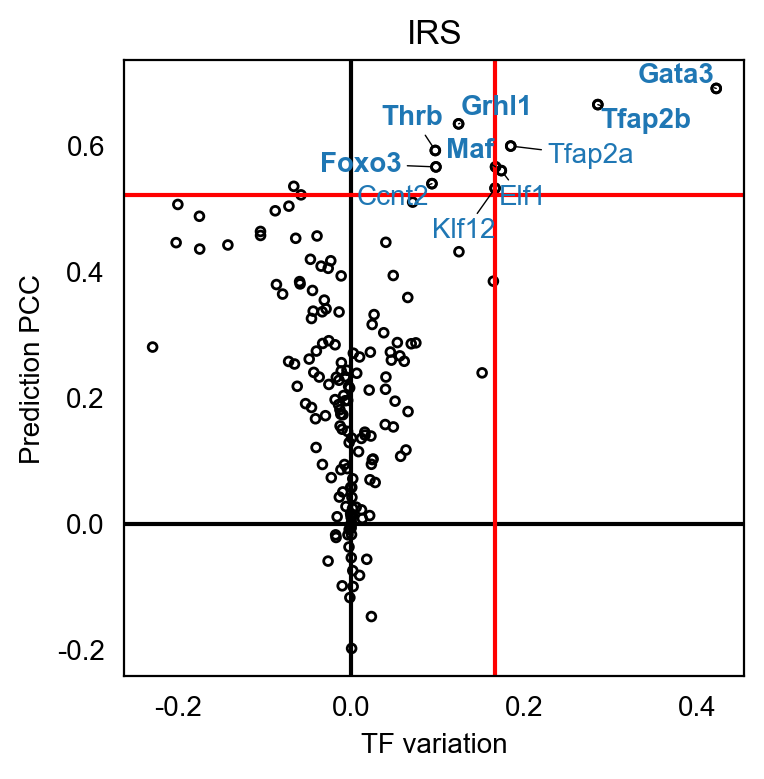

In [19]:
plt.rcParams["figure.figsize"] = [4, 4]
save = ''
save1 = os.path.join(save,'pcc_coef_compare.png')
save2 = os.path.join(save,'pcc_coef_de_compare.png')
save, save1, save2 = None, None, None

save_dir = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/scatter_plot'
os.makedirs(save_dir,exist_ok=True)
save_dir_fig = os.path.join(save_dir,f'scatter_{control_cluster}.pdf')
change_tf=plot_score_comparison_2D_test(df, 
                         value='value', 
                         cluster1=x_name, 
                         cluster2=y_name, 
                         percentile1=percentile,
                         percentile2=percentile,
                         annot_shifts=None, 
                         save=None, 
                         fillna_with_zero=True, 
                         plt_show=True,
                         select='union',
                         plot_de_gene=plot_de_gene,
                         neg_gene_tf=neg_gene_tf,
                         pos_gene_tf=pos_gene_tf,
                         title1=''+control_cluster,
                         title2='',
                         save1=save_dir_fig,
                         save2=save2,
                         goi_size=10,
                         point_size=10,
                         gt_tforf=pos_gene)

In [37]:
print(os.path.join(save_dir_1,save_dir_2,save_dir_3))

/nfs/public/lichen/results/ISDE_GRN/reprogramming_case/figures/fib2keratin/v1/recover_True/1 RF_6 Keratinocyte/filter_quantile_0.1-model-ridge_alpha-1_a-0.6-0.2-0.2-threshold_12000/percentile1-90_percentile2-90


In [13]:
tf_pos_control_list

('Gata3',
 'Tfap2b',
 'Maf',
 'Tfap2a',
 'Elf1',
 'Ccnt2',
 'Grhl1',
 'Thrb',
 'Klf12',
 'Foxo3')

### 绘制umap状态转移图

In [84]:
save_umap_transition = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/umap_transition'
os.makedirs(save_umap_transition,exist_ok=True)

==============Gata3


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'G', 'I', 'M', 'P', 'R', 'S', 'T', 'U', 'a', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'n', 'nonmarkingreturn', 'o', 'one', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 36, 38, 42, 44, 48, 51, 53, 54, 55, 56, 68, 72, 76, 81, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 32 glyphs after


<Figure size 500x500 with 0 Axes>

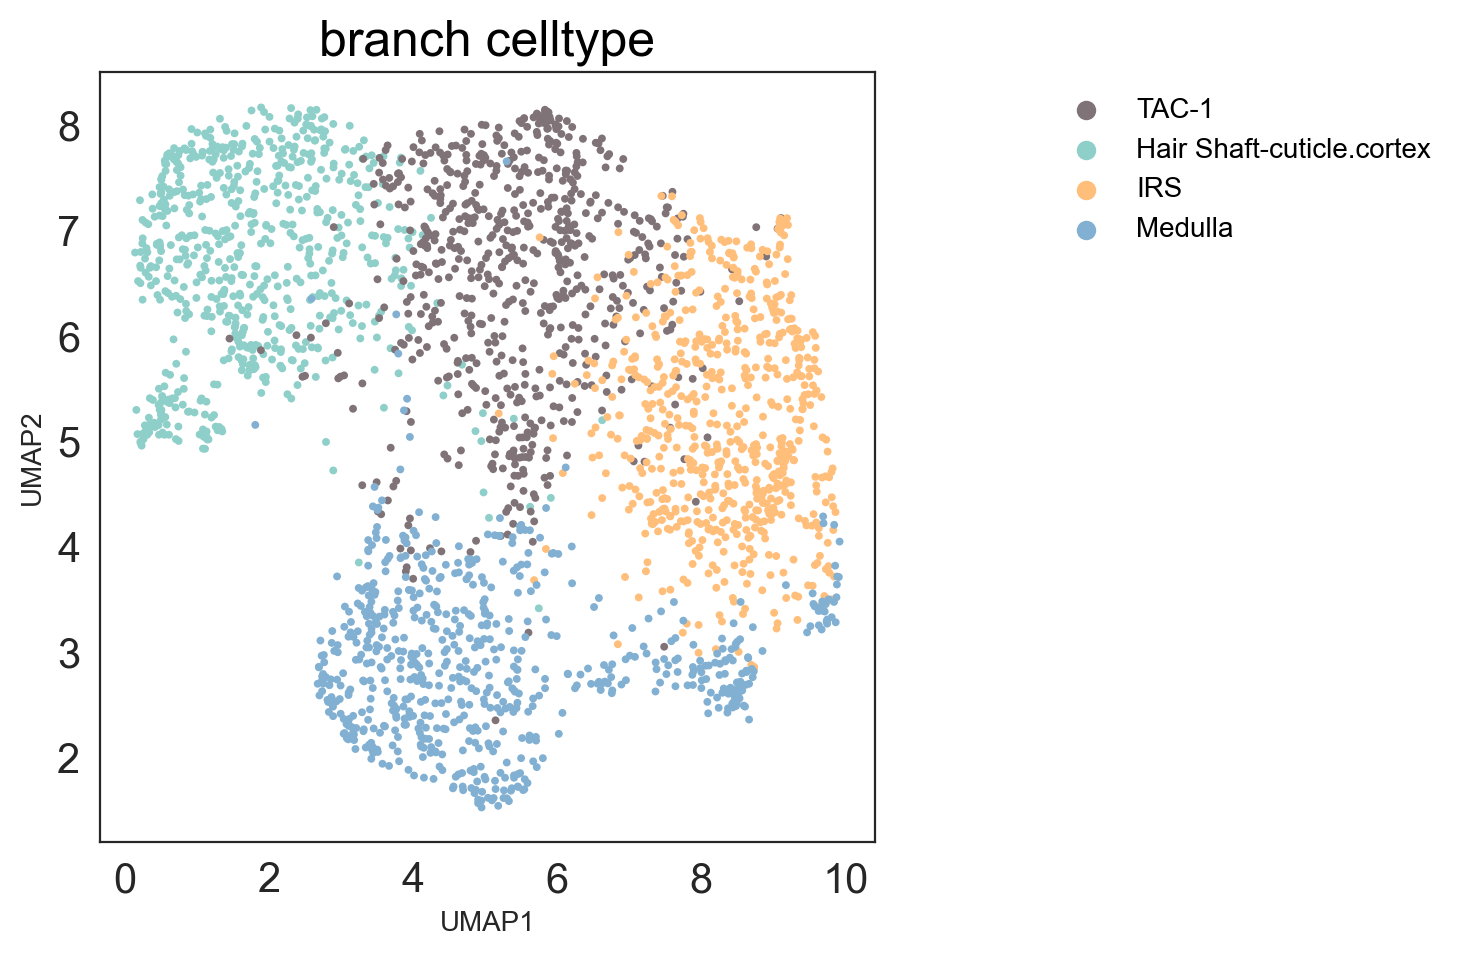

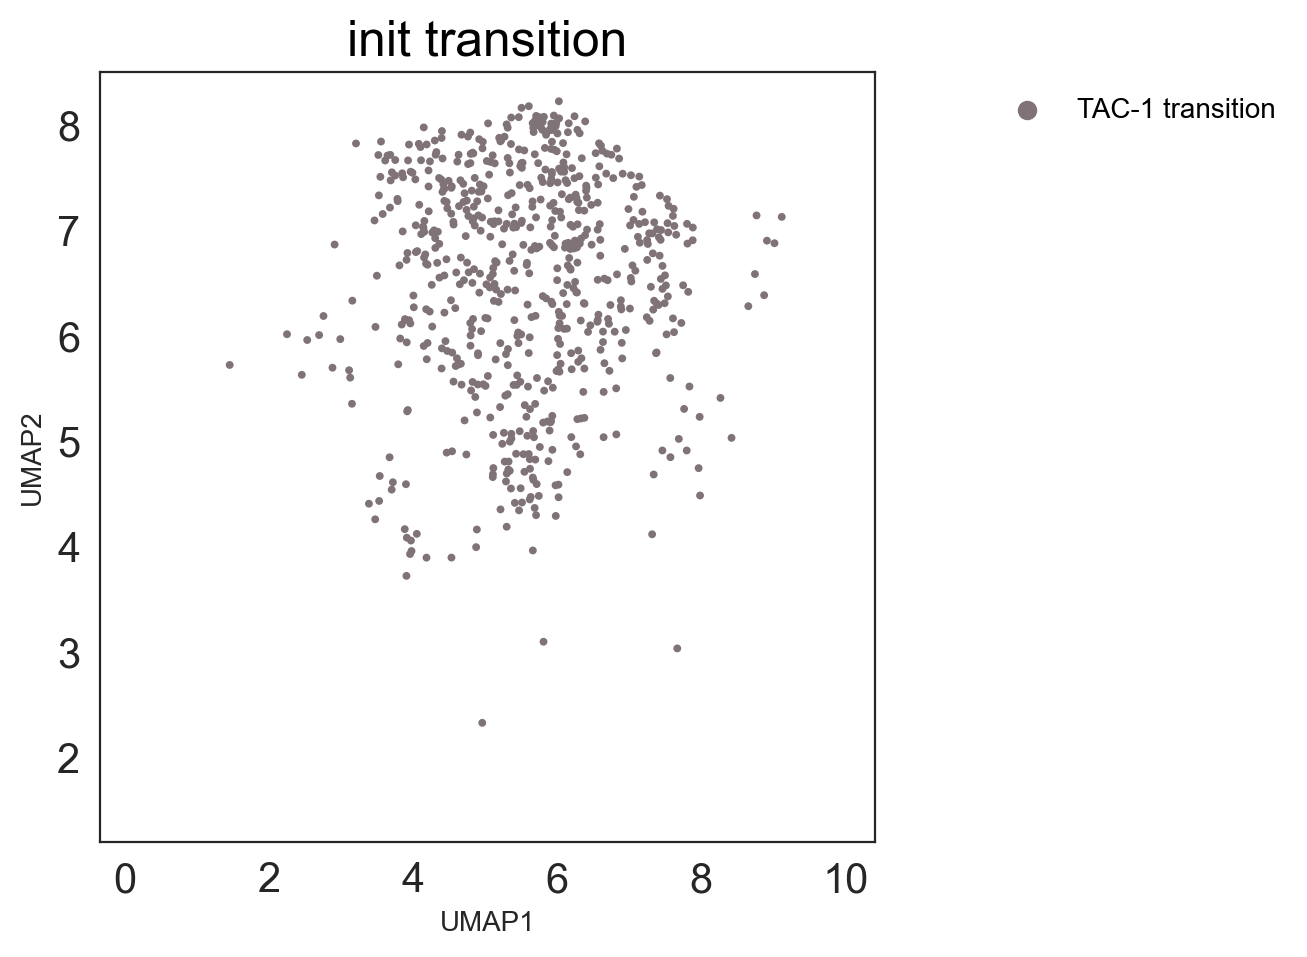

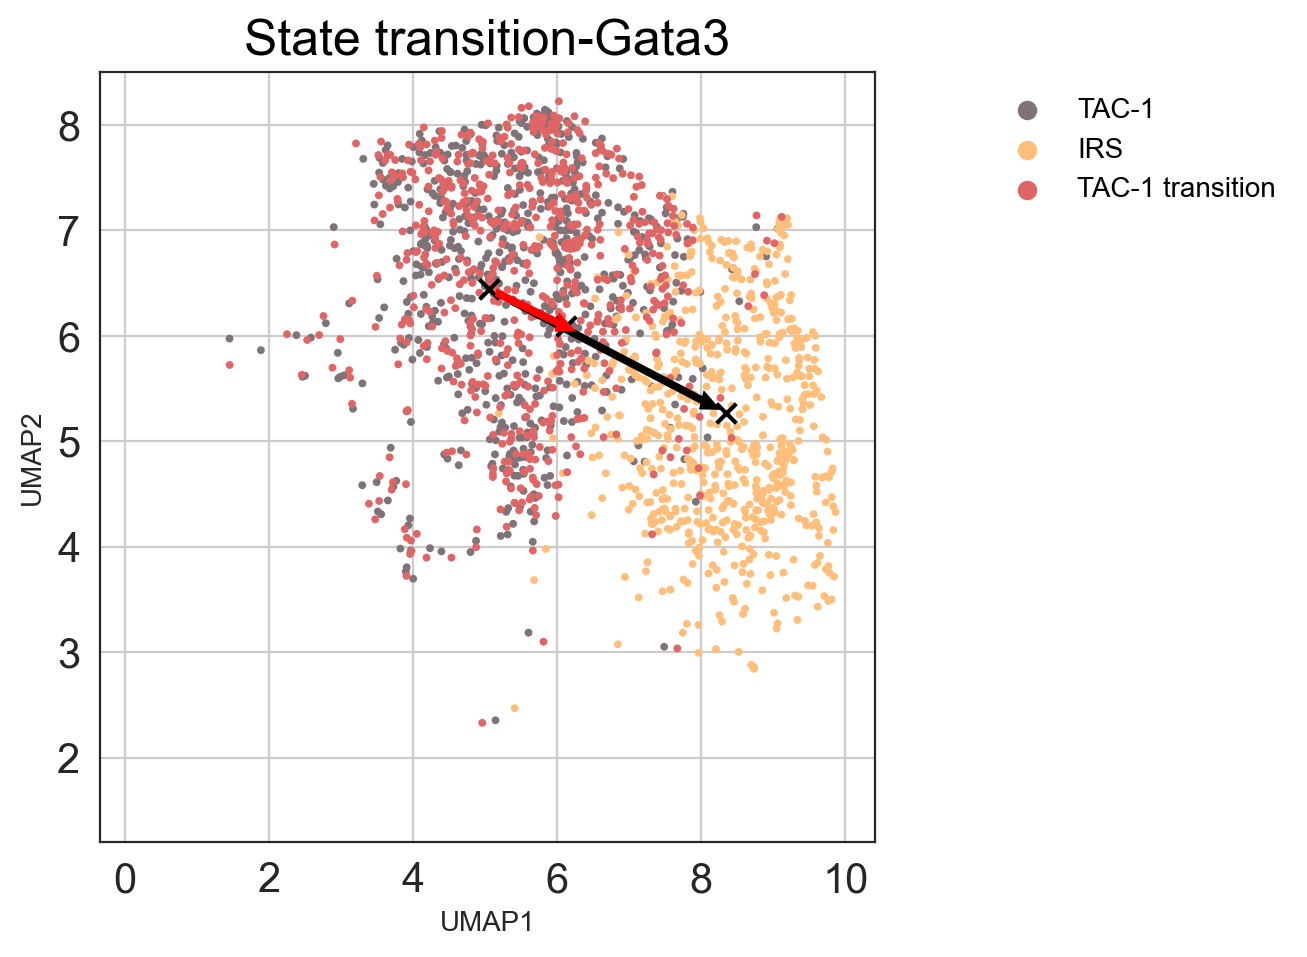

In [85]:
tf = 'Gata3'
print(f'=============={tf}')
plot_umap_transition_test(adata=adata,
                     change_tf=[tf],
                     rr=rr,
                     X=X,
                     cluster_name_for_GRN_unit=cluster_name_for_GRN_unit,
                     init_cluster=init_cluster,
                     control_cluster=control_cluster,
                     init_ave=init_ave,
                     control_ave=control_ave,
                     pca_train=pca_train,
                     umap_train=umap_train,
                     mode='single',
                     layer_use='normalized_count',
                     bbox_list = [1.75, 1.55, 1.55],
                     title_list=['branch celltype','init transition',f'State transition-{tf}'],
                     fig_size=(5,5),
                     save=save_umap_transition,
                     save_prefix='sigTFs',
                     if_close=False,
                     tf_GRN_mtx=tf_GRN_mtx,
                     oracle=oracle,
                     save_format='pdf')

<Figure size 500x500 with 0 Axes>

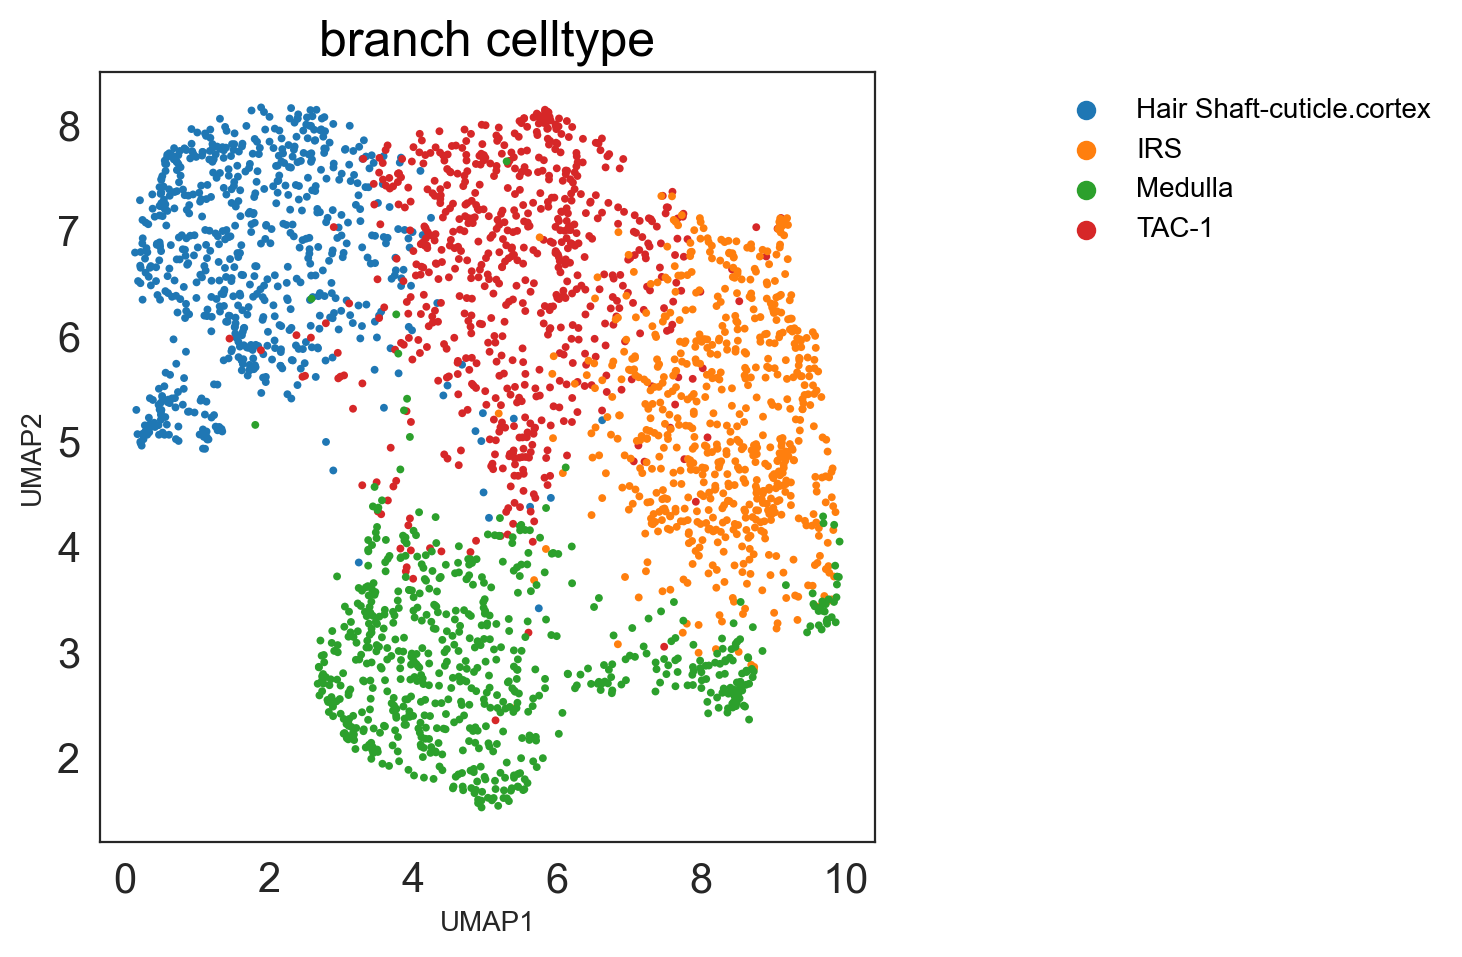

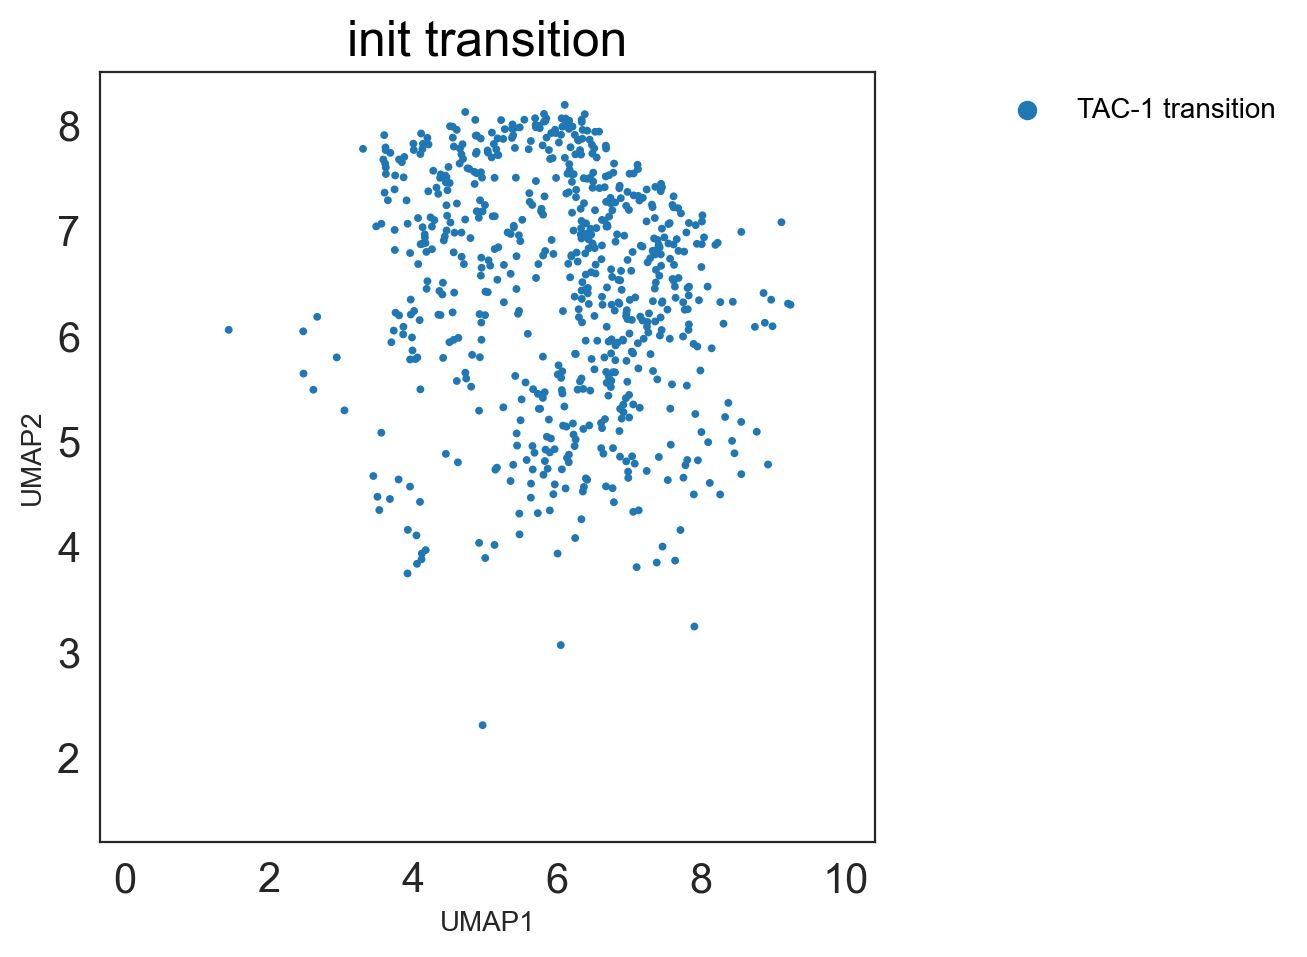

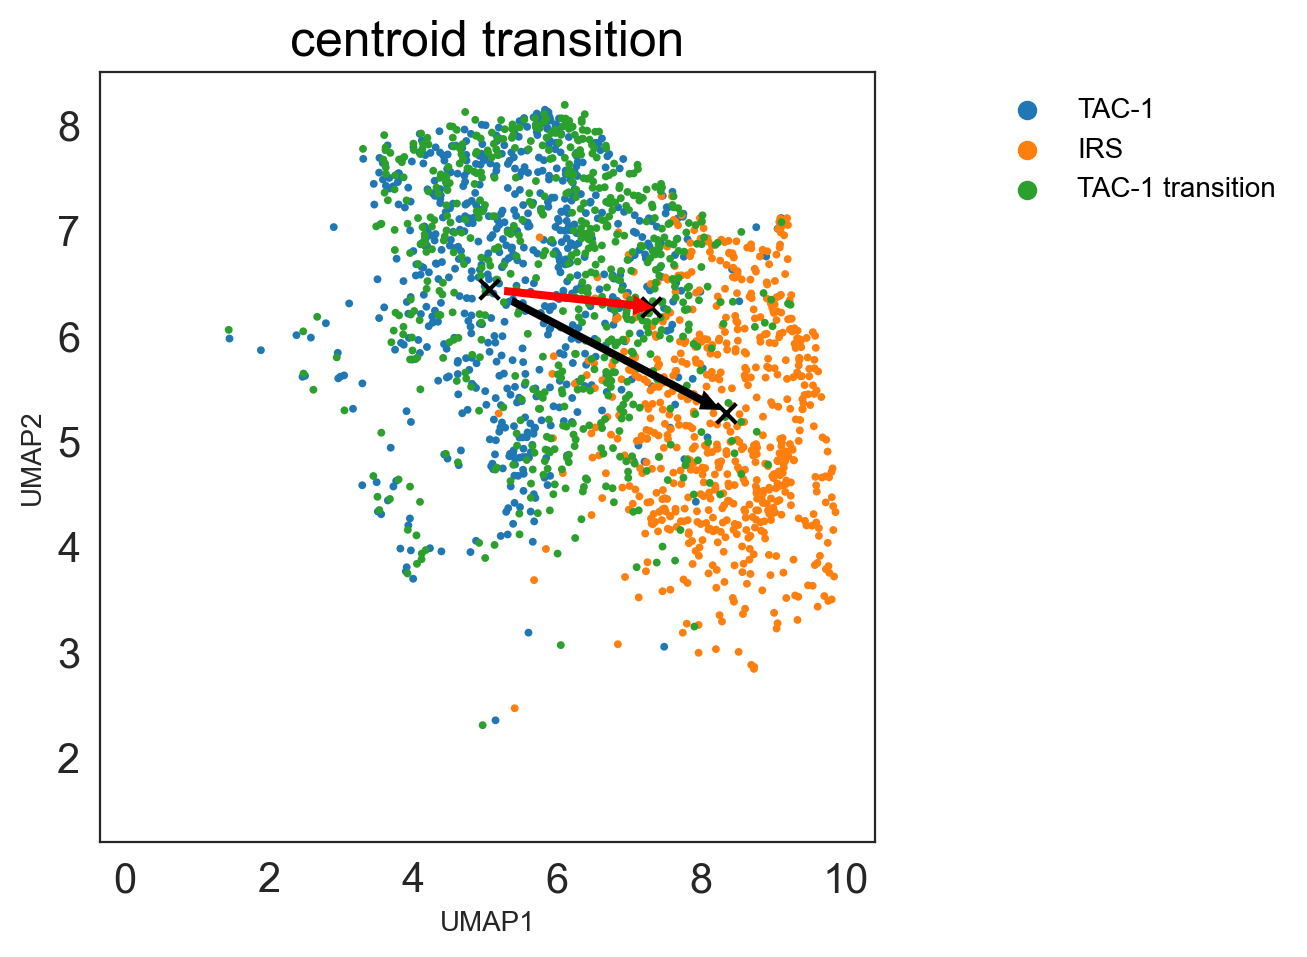

In [58]:
# 对所有挑选出的TF一起绘制一个转移图
plot_umap_transition_test(adata=adata,
                     change_tf=change_tf,
                     rr=rr,
                     X=X,
                     cluster_name_for_GRN_unit=cluster_name_for_GRN_unit,
                     init_cluster=init_cluster,
                     control_cluster=control_cluster,
                     init_ave=init_ave,
                     control_ave=control_ave,
                     pca_train=pca_train,
                     umap_train=umap_train,
                     mode='multi',
                     layer_use='normalized_count',
                     bbox_list = [1.75, 1.55, 1.55],
                     title_list=['branch celltype','init transition','centroid transition'],
                     fig_size=(5,5),
                     save=os.path.join(save_dir_1,save_dir_2,save_dir_3),
                     save_prefix='sigTFs',
                     if_close=False,
                     tf_GRN_mtx=tf_GRN_mtx,
                     oracle=oracle)

### 绘制GSEA图

#### test

In [20]:
init_cluster = 'TAC-1'
control_cluster = 'IRS'
combine = '_'.join([init_cluster,control_cluster])

In [21]:
len(total_tf_GRN_dict)
len(total_tf_GRN_dict[combine])

158

In [22]:
tf_GRN_dict = total_tf_GRN_dict_ori[combine]

In [23]:
total_tf_GRN_dict_ori[combine] == total_tf_GRN_dict[combine]

False

In [24]:
tf_pos_control_list

('Gata3',
 'Tfap2b',
 'Grhl1',
 'Tfap2a',
 'Thrb',
 'Maf',
 'Foxo3',
 'Elf1',
 'Ccnt2',
 'Klf12')

In [26]:
tf_genes_pos_dict, tf_genes_neg_dict = {}, {}
for tf in list(goi4[0:3])+list(goi4[-3:]):
    df2 = pd.DataFrame.from_dict(tf_GRN_dict[tf],orient='index',columns=['value'])
    tf_genes_pos_dict[tf] = list(df2[df2.value>0].index)
    tf_genes_neg_dict[tf] = list(df2[df2.value<0].index)

In [27]:
len(tf_genes_pos_dict)

6

In [27]:
tf = 'Gata3'
df2 = pd.DataFrame.from_dict(tf_GRN_dict[tf],orient='index',columns=['value'])
tf_genes_pos_dict = {tf:list(df2[df2.value>0].index)}
tf_genes_neg_dict = {tf:list(df2[df2.value<0].index)}

In [93]:
adata_part = adata[adata.obs[cluster_name_for_GRN_unit].isin([control_cluster, init_cluster])].copy()
df = pd.DataFrame(data=adata_part.X,index=adata_part.obs_names,columns=adata_part.var_names)
df = df.T
df.index.name = 'Gene'

In [94]:
adata_part

AnnData object with n_obs × n_vars = 1344 × 2748
    obs: 'celltype', 'n_counts_all', 'n_counts', 'total'
    var: 'mean', 'std', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators'
    uns: 'log1p', 'neighbors', 'pca', 'umap', 'celltype_colors', 'total_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_count', 'normalized_count', 'imputed_count'
    obsp: 'connectivities', 'distances'

In [96]:
df_total = df

In [70]:
class_vector = list(adata_part.obs[cluster_name_for_GRN_unit])
# class_vector

In [71]:
[len(tf_genes_pos_dict[i]) for i in tf_genes_pos_dict.keys()],[i for i in tf_genes_pos_dict.keys()]

([83, 151, 25, 144, 117, 21],
 ['Gata3', 'Tfap2b', 'Grhl1', 'Hdac2', 'Zbtb33', 'Zbtb1'])

In [101]:
# 获取所有的调控为正的tf并排序
df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
piv = pd.pivot_table(df, values='value', columns="cluster", index="index")
if True:
    piv = piv.fillna(0)
else:
    piv = piv.fillna(piv.mean(axis=0))
    
goi4 = piv[piv['adjusted coef'] > 0.01].index
goi4_pcc_list = [TF_pcc_dict[i] for i in goi4]
zipped_lists = zip(goi4_pcc_list, goi4)
sorted_lists = sorted(zipped_lists,reverse=True)
goi4_pcc_list, goi4 = zip(*sorted_lists)
len(goi4)

51

In [102]:
tf_genes_pos_dict, tf_genes_neg_dict = {}, {}
for tf in list(goi4[0:3])+list(goi4[-3:]):
    df2 = pd.DataFrame.from_dict(tf_GRN_dict[tf],orient='index',columns=['value'])
    tf_genes_pos_dict[tf] = list(df2[df2.value>0].index)
    tf_genes_neg_dict[tf] = list(df2[df2.value<0].index)
print(list(goi4[0:3])+list(goi4[-3:]))

['Gata3', 'Tfap2b', 'Grhl1', 'Hdac2', 'Zbtb33', 'Zbtb1']


In [103]:
tf_genes_neg_dict

{'Gata3': ['Ablim1',
  'Acer3',
  'Acsl4',
  'Agps',
  'Anxa1',
  'Apbb2',
  'Atp13a1',
  'Cdca2',
  'Cdh3',
  'Celf2',
  'Cenpp',
  'Cit',
  'Cntfr',
  'Csrp1',
  'Dek',
  'Diaph3',
  'Dsg3',
  'Dst',
  'Dusp6',
  'Dut',
  'Fabp4',
  'Fhit',
  'Flrt2',
  'Frem2',
  'Frrs1',
  'G3bp2',
  'Ghr',
  'Hells',
  'Hmgcr',
  'Hoxc13',
  'Ift57',
  'Kif13a',
  'Klf3',
  'Klhl29',
  'Krt1',
  'Krt17',
  'Lgr6',
  'Lrrc8c',
  'Lrrc8d',
  'Man2a1',
  'March3',
  'Mpdz',
  'Mphosph8',
  'Mta1',
  'Nampt',
  'Nap1l1',
  'Nop56',
  'Nup54',
  'Plch2',
  'Plpp3',
  'Pmepa1',
  'Pold3',
  'Ppfibp2',
  'Ptn',
  'Rnd3',
  'Rsbn1l',
  'Runx1',
  'Scin',
  'Slc39a10',
  'Slc6a6',
  'Smc2',
  'Smc4',
  'Smc5',
  'Srrt',
  'Tacc2',
  'Tcf4',
  'Tiam2',
  'Timp3',
  'Tmpo',
  'Tpm1',
  'Trps1',
  'Tspan18',
  'Zcchc11',
  'Zfp827',
  'Zhx2'],
 'Tfap2b': ['1700025G04Rik',
  'Acap2',
  'Aff3',
  'Agap3',
  'Agtpbp1',
  'Ank',
  'Arhgap24',
  'Atad5',
  'Auts2',
  'Bmper',
  'Cables1',
  'Cadm1',
  'Ccnd2',
  '

In [104]:
# df

In [111]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name
gs_res = gp.gsea(data=df_total, # or data='./P53_resampling_data.txt'
                 gene_sets=tf_genes_pos_dict, # or enrichr library names
                 cls= class_vector, # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, 
                 seed= 7,
                 min_size=1)

In [89]:
gp.

<module 'gseapy.stats' from '/data1/lichen/anaconda3/envs/dgl/lib/python3.9/site-packages/gseapy/stats.py'>

In [75]:
del gs_res

In [73]:
gs_res.res2d

Name    Term        ES       NES NOM p-val FDR q-val FWER p-val   Tag %  \
0  gsea  Tfap2b  0.679181  2.878336       0.0   0.00001        0.0  77/136   
1  gsea   Gata3  0.679784  2.660883       0.0   0.00001        0.0   50/75   
2  gsea   Grhl1  0.795392  2.379366       0.0   0.00001        0.0   12/19   
3  gsea   Nr3c1 -0.542631 -2.139244       0.0   0.00001        0.0   36/79   
4  gsea   Zbtb1 -0.508051 -1.506767  0.050881  0.052992    0.10352    8/17   
5  gsea    Brf1 -0.869502  -1.49144  0.026052  0.038664   0.109731     2/3   

   Gene %                                         Lead_genes   NES_abs  
0  15.10%  Smc4;Ccnd2;Hist1h1e;Pola1;Setbp1;Gli2;1700025G...  2.878336  
1  18.67%  Smc4;Diaph3;Ptn;Cdca2;Dek;Cit;Smc2;Tmpo;Cdh3;C...  2.660883  
2   9.17%  Hist1h1e;Lamb1;Prr5l;Tacc3;Myb;Nap1l1;Vps13c;I...  2.379366  
3  11.24%  Krt25;Wdr47;Cpm;Neo1;Krt27;Trim2;Sema6a;Sash1;...  2.139244  
4  18.12%   Pitpnc1;Cux1;Tnik;Tnfaip8;Efna5;Cnn3;Snx24;Tmtc2  1.506767  
5   6.95%                                          Cdh6;Hexb  1.491440

In [55]:
gs_res.res2d['FDR q-val'] = gs_res.res2d['FDR q-val']+0.00001

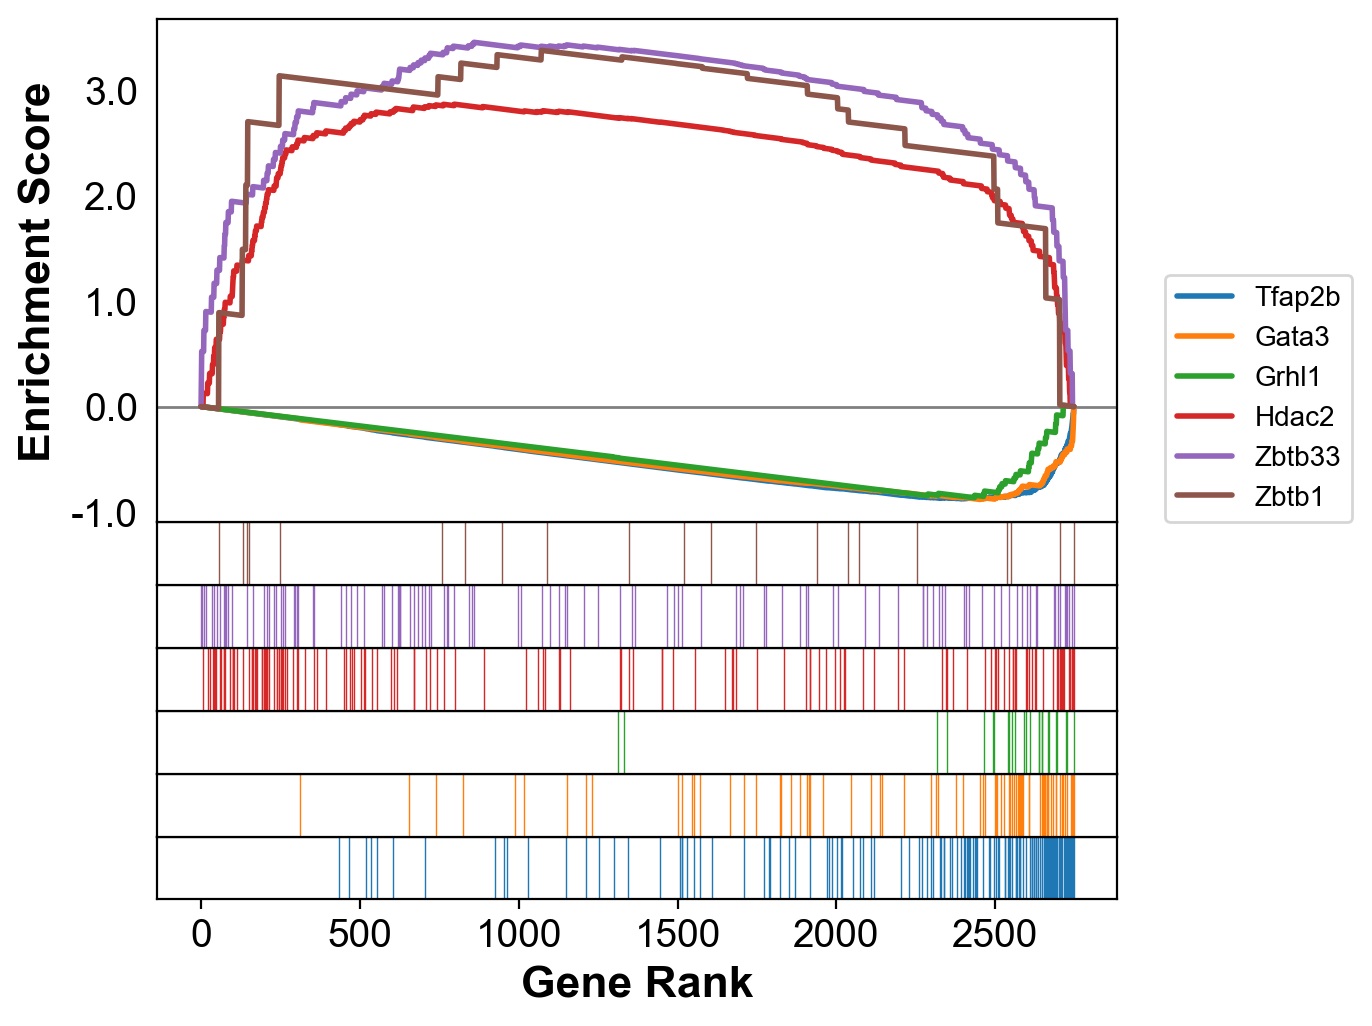

In [121]:
terms = gs_res.res2d.Term
axs = gs_res.plot(terms[:6], show_ranking=False, legend_kws={'loc': (1.05, 0)},figsize=(10,5) )

In [40]:
gs_res.res2d

Name    Term        ES       NES NOM p-val FDR q-val FWER p-val   Tag %  \
0  gsea  Tfap2b  0.679181  2.878336       0.0       0.0        0.0  77/136   
1  gsea   Gata3  0.679784  2.660883       0.0       0.0        0.0   50/75   
2  gsea   Grhl1  0.795392  2.379366       0.0       0.0        0.0   12/19   
3  gsea   Nr3c1 -0.542631 -2.139244       0.0       0.0        0.0   36/79   
4  gsea   Zbtb1 -0.508051 -1.506767  0.050881  0.052982    0.10352    8/17   
5  gsea    Brf1 -0.869502  -1.49144  0.026052  0.038654   0.109731     2/3   

   Gene %                                         Lead_genes  
0  15.10%  Smc4;Ccnd2;Hist1h1e;Pola1;Setbp1;Gli2;1700025G...  
1  18.67%  Smc4;Diaph3;Ptn;Cdca2;Dek;Cit;Smc2;Tmpo;Cdh3;C...  
2   9.17%  Hist1h1e;Lamb1;Prr5l;Tacc3;Myb;Nap1l1;Vps13c;I...  
3  11.24%  Krt25;Wdr47;Cpm;Neo1;Krt27;Trim2;Sema6a;Sash1;...  
4  18.12%   Pitpnc1;Cux1;Tnik;Tnfaip8;Efna5;Cnn3;Snx24;Tmtc2  
5   6.95%                                          Cdh6;Hexb

In [42]:
gs_res.res2d.iloc[1,5]==0

True

In [44]:
from gseapy import gseaplot, heatmap
terms = gs_res.res2d.Term
i = 0
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gseaplot(gs_res.ranking, term=terms[i], **gs_res.results[terms[i]])


TypeError: gseaplot() got multiple values for argument 'term'

In [46]:
terms[0]

'Tfap2b'

In [49]:
terms[i]

'Tfap2b'

In [50]:
df2 = gs_res.res2d
df2['NES_abs'] = [abs(i) for i in list(df2.NES)]
df2.sort_values("NES_abs").head(10)

Name    Term        ES       NES NOM p-val FDR q-val FWER p-val   Tag %  \
5  gsea   Zbtb1  0.400125  1.258454  0.194393  0.171677       0.37    9/21   
4  gsea    Brf1  0.501209   1.41551  0.094118  0.166333      0.203    5/14   
3  gsea   Nr3c1 -0.330366 -1.446646  0.033399  0.060546    0.15625   0/150   
2  gsea   Grhl1 -0.852961 -2.715919       0.0       0.0        0.0   21/25   
1  gsea   Gata3 -0.825142 -3.257575       0.0       0.0        0.0   48/83   
0  gsea  Tfap2b -0.818126 -3.344536       0.0       0.0        0.0  94/151   

   Gene %                                         Lead_genes   NES_abs  
5  39.01%     Moxd1;Jag1;Itga6;Bnc1;Smc6;Krt17;Net1;Ryk;Safb  1.258454  
4  10.48%                       Kif11;Kif20b;Tmpo;Gli3;Klf13  1.415510  
3   0.04%                                                     1.446646  
2  11.43%  Slc30a1;Samd5;Myh14;Hopx;Nipal2;Ace2;Golga7b;S...  2.715919  
1  10.77%  Krt71;Krt25;Csgalnact1;Pitpnc1;Krt28;Dsc1;Trim...  3.257575  
0  12.95%  Krt71;Csgalnact1;Pitpnc1;Wdr47;Cpm;Krt28;Pof1b...  3.344536

In [112]:
df2 = gs_res.res2d
df2['NES_abs'] = [abs(i) for i in list(df2.NES)]
df2.sort_values("NES_abs").head(10)

Name    Term        ES       NES NOM p-val FDR q-val FWER p-val   Tag %  \
5  gsea   Zbtb1  0.400125  1.258454  0.194393  0.160846      0.348    9/21   
4  gsea  Zbtb33  0.325228  1.384177  0.063786  0.138012      0.214  55/117   
3  gsea   Hdac2  0.383073  1.672218  0.006012  0.041303      0.035  71/144   
2  gsea   Grhl1 -0.852961 -2.715919       0.0       0.0        0.0   21/25   
1  gsea   Gata3 -0.825142 -3.257575       0.0       0.0        0.0   48/83   
0  gsea  Tfap2b -0.818126 -3.344536       0.0       0.0        0.0  94/151   

   Gene %                                         Lead_genes   NES_abs  
5  39.01%     Moxd1;Jag1;Itga6;Bnc1;Smc6;Krt17;Net1;Ryk;Safb  1.258454  
4  31.30%  Mki67;Hist1h1b;Mt2;Cenpe;Cit;Tmpo;Arhgap24;Dtl...  1.384177  
3  29.04%  Atad2;Cadm1;Hist1h1c;Tmtc1;Dock1;Prr5l;Gli3;Dt...  1.672218  
2  11.43%  Slc30a1;Samd5;Myh14;Hopx;Nipal2;Ace2;Golga7b;S...  2.715919  
1  10.77%  Krt71;Krt25;Csgalnact1;Pitpnc1;Krt28;Dsc1;Trim...  3.257575  
0  12.95%  Krt71;Csgalnact1;Pitpnc1;Wdr47;Cpm;Krt28;Pof1b...  3.344536

In [113]:
print(df2.iloc[0,4])
# df2

0.0


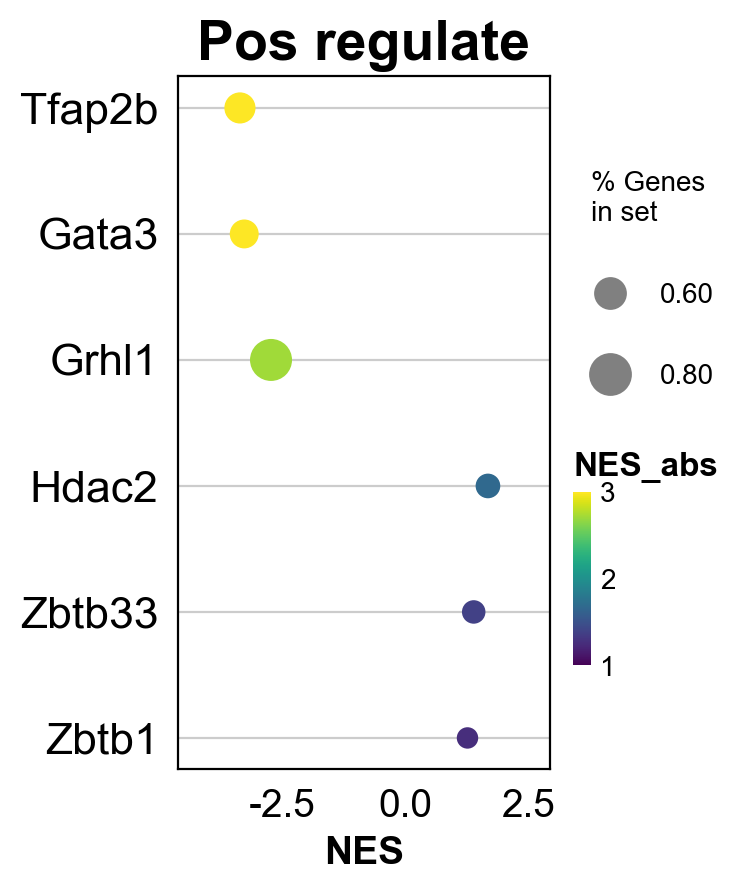

In [118]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
# plt.figure(figsize=(2,3))
ax = dotplot(df2,
             # y='NES',
             # y_order=['E2f1'],
             column="NES_abs",
             title='Pos regulate',
             cmap=plt.cm.viridis,
             size=3,
             figsize=(3,4.5), 
             cutoff=5,
             top_term=100)


In [ ]:
ax = dotplot(df2,
             # y='NES',
             # y_order=['E2f1'],
             column="NES_abs",
             title='Pos regulate',
             cmap=plt.cm.viridis,
             size=3,
             figsize=(4,6), 
             cutoff=5,
             top_term=100)

In [62]:
# ?barplot

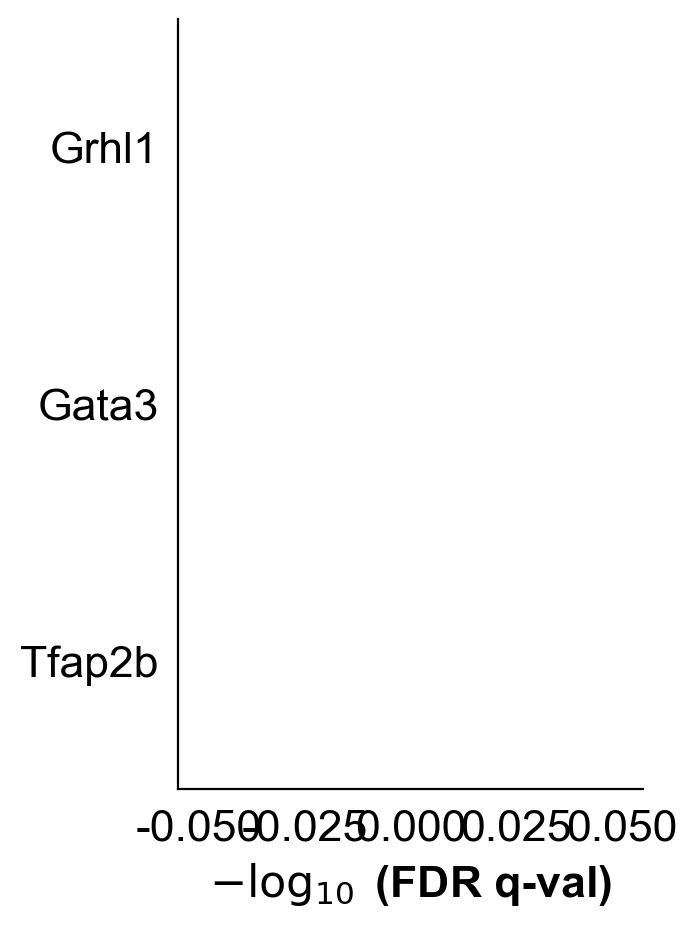

In [62]:
# categorical scatterplot
from gseapy import barplot, dotplot
ax = barplot(df2,
              column="FDR q-val",
              # group='Term', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              # color=['darkred', 'darkblue'] # set colors for group
             )



In [244]:
gs_res.ranking

Gene
Top2a         0.501624
Mki67         0.450834
Hist1h1b      0.420162
Smc4          0.403570
Kif11         0.390219
                ...   
Wdr47        -0.517722
Pitpnc1      -0.534453
Csgalnact1   -0.658712
Krt25        -0.792437
Krt71        -1.306126
Length: 2748, dtype: float64

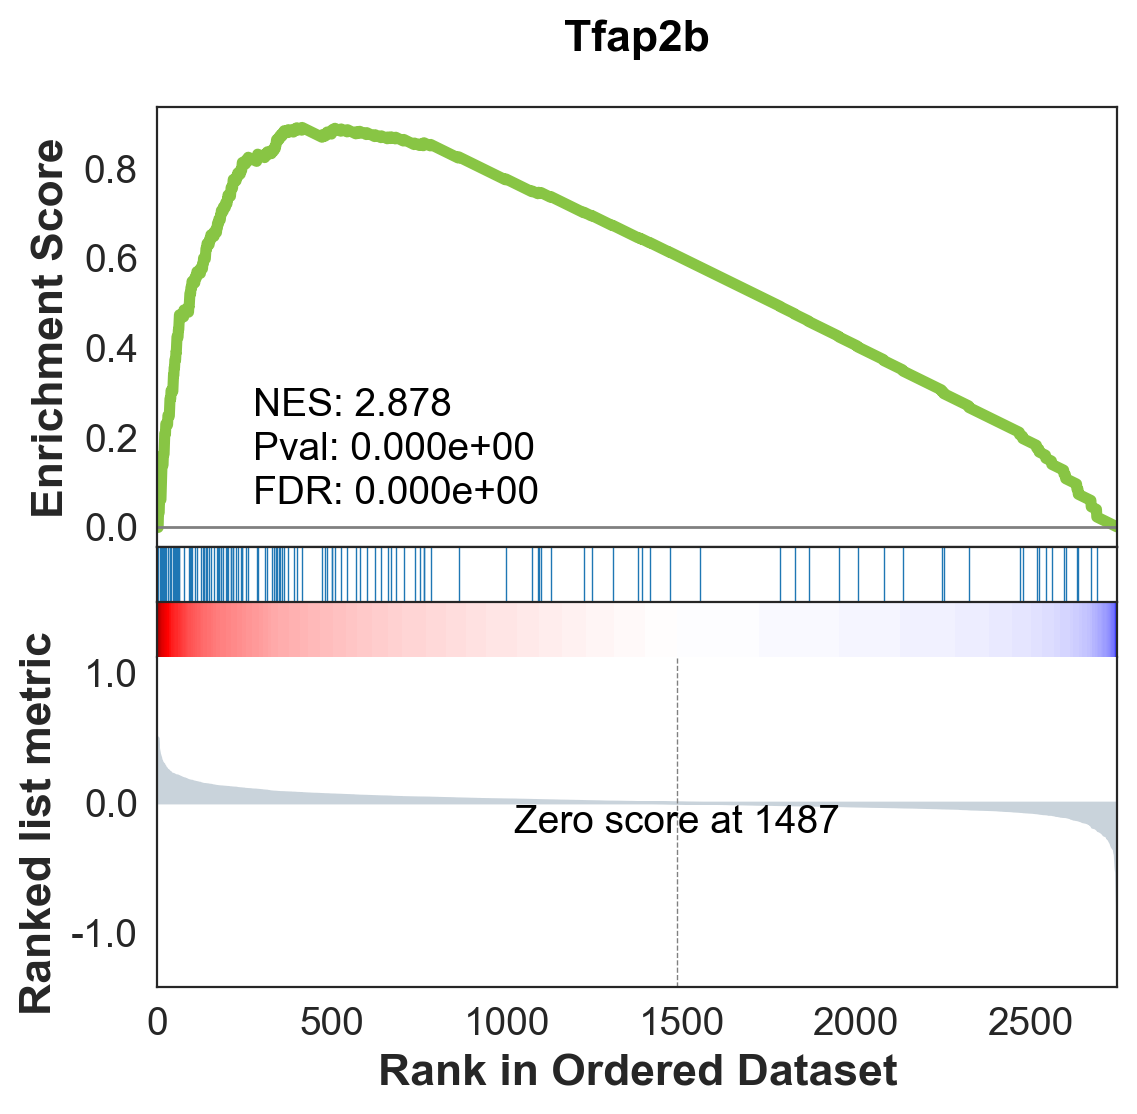

In [62]:
from gseapy import gseaplot, heatmap
terms = gs_res.res2d.Term
i = 0
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gseaplot(rank_metric=gs_res.ranking, term=terms[i], **gs_res.results[terms[i]])

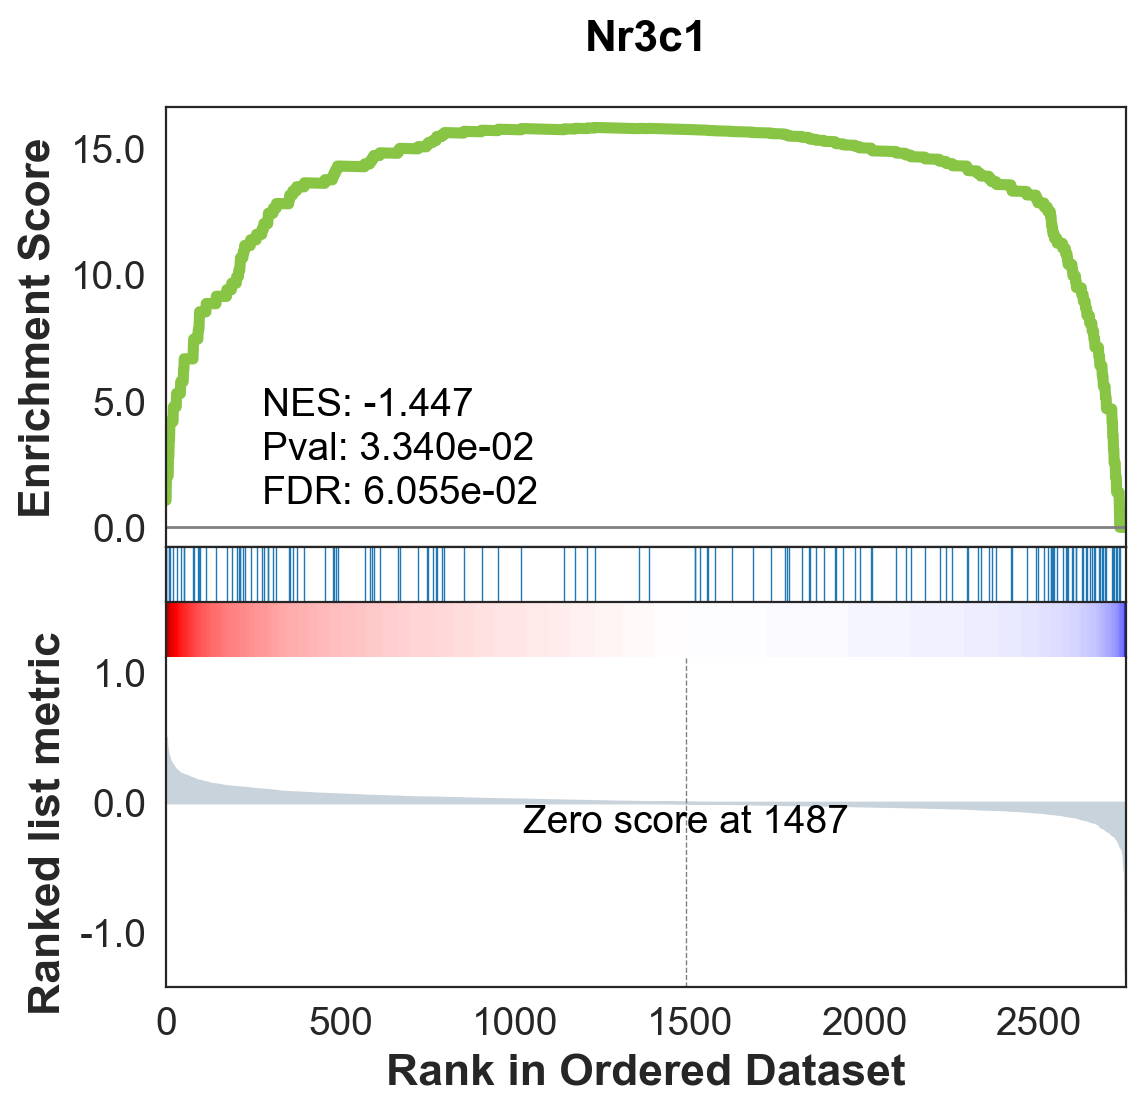

In [57]:
from gseapy import gseaplot, heatmap
terms = gs_res.res2d.Term
i = 3
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gseaplot(rank_metric=gs_res.ranking, term=terms[i], **gs_res.results[terms[i]])

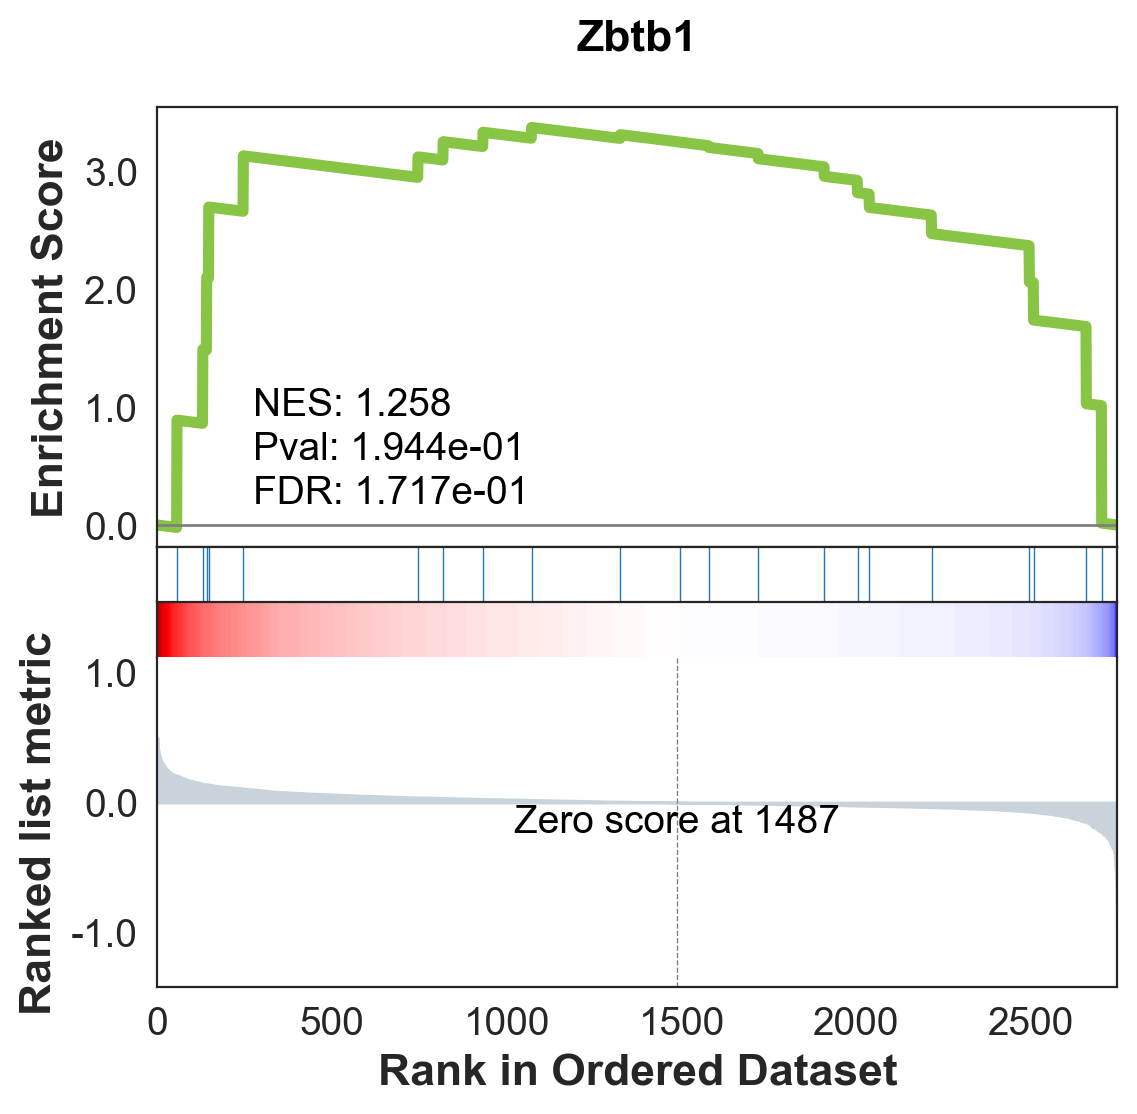

In [58]:
from gseapy import gseaplot, heatmap
terms = gs_res.res2d.Term
i = 5
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gseaplot(rank_metric=gs_res.ranking, term=terms[i], **gs_res.results[terms[i]])

In [240]:
gs_res.ranking

Gene
Top2a         0.501624
Mki67         0.450834
Hist1h1b      0.420162
Smc4          0.403570
Kif11         0.390219
                ...   
Wdr47        -0.517722
Pitpnc1      -0.534453
Csgalnact1   -0.658712
Krt25        -0.792437
Krt71        -1.306126
Length: 2748, dtype: float64

In [236]:
terms[i]
?gseaplot

Signature:
gseaplot(
    term: str,
    hits: Sequence[int],
    nes: float,
    pval: float,
    fdr: float,
    RES: Sequence[float],
    rank_metric: Optional[Sequence[float]] = None,
    pheno_pos: str = '',
    pheno_neg: str = '',
    color: str = '#88C544',
    figsize: Tuple[float, float] = (6, 5.5),
    cmap: str = 'seismic',
    ofname: Optional[str] = None,
    **kwargs,
) -> Optional[List[matplotlib.axes._axes.Axes]]
Docstring:
This is the main function for generating the gsea plot.

:param term: gene_set name
:param hits: hits indices of rank_metric.index presented in gene set S.
:param nes: Normalized enrichment scores.
:param pval: nominal p-value.
:param fdr: false discovery rate.
:param RES: running enrichment scores.
:param rank_metric: pd.Series for rankings, rank_metric.values.
:param pheno_pos: phenotype label, positive correlated.
:param pheno_neg: phenotype label, negative correlated.
:param color: color for RES and hits.
:param figsize: matplotlib figsize.
:para

In [64]:
# 获取所有的调控为正的tf并排序
df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
piv = pd.pivot_table(df, values='value', columns="cluster", index="index")
if True:
    piv = piv.fillna(0)
else:
    piv = piv.fillna(piv.mean(axis=0))
    
goi4 = piv[piv['adjusted coef'] > 0.01].index
goi4_pcc_list = [TF_pcc_dict[i] for i in goi4]
zipped_lists = zip(goi4_pcc_list, goi4)
sorted_lists = sorted(zipped_lists,reverse=True)
goi4_pcc_list, goi4 = zip(*sorted_lists)
len(goi4)

51

In [43]:
len(goi4)

69

#### 正式版

In [73]:
# - initial
init_cluster = 'TAC-1'
control_cluster = 'IRS'
combine = '_'.join([init_cluster,control_cluster])

# - get tf_GRN_dict
tf_GRN_dict = total_tf_GRN_dict[combine]

# 获取所有的调控为正的tf并排序
df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
piv = pd.pivot_table(df, values='value', columns="cluster", index="index")
if True:
    piv = piv.fillna(0)
else:
    piv = piv.fillna(piv.mean(axis=0))
    
goi4 = piv[piv['adjusted coef'] > 0].index
goi4_pcc_list = [TF_pcc_dict[i] for i in goi4]
zipped_lists = zip(goi4_pcc_list, goi4)
sorted_lists = sorted(zipped_lists,reverse=True)
goi4_pcc_list, goi4 = zip(*sorted_lists)

# - get the six TFs
tf_genes_pos_dict, tf_genes_neg_dict = {}, {}
for tf in list(goi4[0:3])+list(goi4[-3:]):
    df2 = pd.DataFrame.from_dict(tf_GRN_dict[tf],orient='index',columns=['value'])
    tf_genes_pos_dict[tf] = list(df2[df2.value>0].index)
    tf_genes_neg_dict[tf] = list(df2[df2.value<0].index)
    
# - get adata_part
adata_part = adata[adata.obs[cluster_name_for_GRN_unit].isin([control_cluster, init_cluster])].copy()
df3 = pd.DataFrame(data=adata_part.X,index=adata_part.obs_names,columns=adata_part.var_names)
df3 = df3.T
df3.index.name = 'Gene'

class_vector = list(adata_part.obs[cluster_name_for_GRN_unit])

# run gsea
# enrichr libraries are supported by gsea module. Just provide the name
gs_res = gp.gsea(data=df3, # or data='./P53_resampling_data.txt'
                 gene_sets=tf_genes_pos_dict, # or enrichr library names
                 cls= class_vector, # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, 
                 seed= 7,
                 min_size=1)

In [75]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
df4 = gs_res.res2d
df4['NES_abs'] = [abs(i) for i in list(df4.NES)]
save_gsea = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/gsea'
os.makedirs(save_gsea,exist_ok=True)
ax = dotplot(df4,
             # y='NES',
             # y_order=['E2f1'],
             column="NES_abs",
             title='Pos-regulated target set',
             cmap=plt.cm.viridis,
             size=3,
             figsize=(4,6), 
             cutoff=5,
             ofname = os.path.join(save_gsea,f'pos_dotplot_{combine}.pdf'),
             top_term=100)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'G', 'N', 'T', 'Z', 'a', 'b', 'c', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'one', 'p', 'percent', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 8, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 37, 42, 49, 55, 61, 68, 69, 70, 72, 73, 75, 76, 79, 81, 83, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 3

In [78]:
from gseapy import gseaplot, heatmap
terms = gs_res.res2d.Term
for i in range(len(terms)):
    # i = 0
    # Make sure that ``ofname`` is not None, if you want to save your figure to disk
    gseaplot(rank_metric=gs_res.ranking, term=terms[i], **gs_res.results[terms[i]],
             title = f'{terms[i]} pos-regulated target set',
            ofname = os.path.join(save_gsea,f'pos_gseaplot_{terms[i]}.pdf'))

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'D', 'E', 'F', 'N', 'P', 'R', 'S', 'Z', 'a', 'c', 'colon', 'e', 'eight', 'five', 'four', 'hyphen', 'l', 'nonmarkingreturn', 'o', 'one', 'period', 'plus', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 14, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 29, 39, 40, 41, 49, 51, 53, 54, 61, 68, 70, 72, 79, 82, 85, 86, 87, 89]
INFO:fontTools.subset:Closed glyph list over 'GSUB

#### 正式版_v2

pos-regulate

In [176]:
# def get_gs_res(tf_genes_pos_dict):

# - initial
init_cluster = 'TAC-1'
control_cluster = 'IRS'
combine = '_'.join([init_cluster,control_cluster])

# - get tf_GRN_dict
tf_GRN_dict = total_tf_GRN_dict[combine]


# - 获取所有的调控为正的tf并排序
df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
piv = pd.pivot_table(df, values='value', columns="cluster", index="index")
if True:
    piv = piv.fillna(0)
else:
    piv = piv.fillna(piv.mean(axis=0))
    
goi4 = piv[piv['adjusted coef'] > 0.0].index
goi4_pcc_list = [TF_pcc_dict[i] for i in goi4]
zipped_lists = zip(goi4_pcc_list, goi4)
sorted_lists = sorted(zipped_lists,reverse=True)
goi4_pcc_list, goi4 = zip(*sorted_lists)
len(goi4)

# - get top and bottom TFs
tf_genes_pos_dict, tf_genes_neg_dict = {}, {}
for tf in list(goi4[0:3])+list(goi4[-3:]):
    df2 = pd.DataFrame.from_dict(tf_GRN_dict[tf],orient='index',columns=['value'])
    tf_genes_pos_dict[tf] = list(df2[df2.value>0].index)
    tf_genes_neg_dict[tf] = list(df2[df2.value<0].index)
print(list(goi4[0:3])+list(goi4[-3:]))

# - get df_total
adata_part = adata[adata.obs[cluster_name_for_GRN_unit].isin([control_cluster, init_cluster])].copy()
df = pd.DataFrame(data=adata_part.X,index=adata_part.obs_names,columns=adata_part.var_names)
df = df.T
df.index.name = 'Gene'
df_total = df
class_vector = list(adata_part.obs[cluster_name_for_GRN_unit])

['Gata3', 'Tfap2b', 'Grhl1', 'Brf1', 'Zbtb1', 'Nr3c1']


In [177]:
fix_seed(2023)

# - run gsea
# enrichr libraries are supported by gsea module. Just provide the name
gs_res_pos = gp.gsea(data=df_total, # or data='./P53_resampling_data.txt'
                 gene_sets=tf_genes_pos_dict, # or enrichr library names
                 cls= class_vector, # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, 
                 seed= 2023,
                 min_size=1)

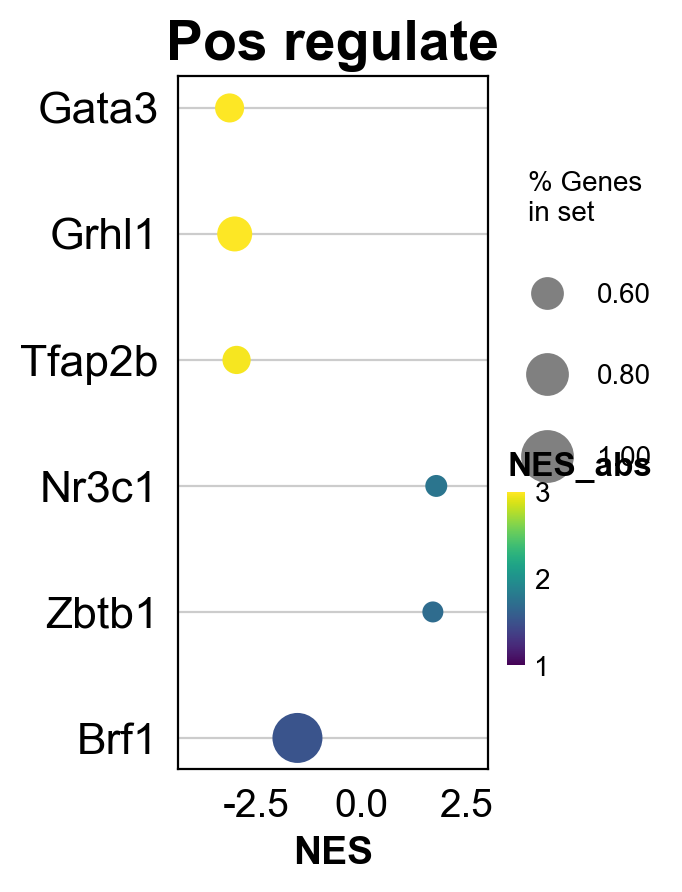

In [178]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
df2 = gs_res_pos.res2d
df2['NES_abs'] = [abs(i) for i in list(df2.NES)]
df2.sort_values("NES_abs").head(10)
save_gsea = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/gsea'
ax = dotplot(df2,
             # y='NES',
             # y_order=['E2f1'],
             column="NES_abs",
             title='Pos regulate',
             cmap=plt.cm.viridis,
             size=3,
             figsize=(2.5,4.5), 
             cutoff=5,
             # ofname = os.path.join(save_gsea,f'pos_dotplot_{combine}.pdf'),
             top_term=100)


In [186]:
gs_res_pos.res2d

Name    Term        ES       NES NOM p-val FDR q-val FWER p-val    Tag %  \
0  gsea   Gata3 -0.768029 -3.134857       0.0       0.0        0.0   82/141   
1  gsea   Grhl1 -0.779049 -3.013857       0.0       0.0        0.0    63/90   
2  gsea  Tfap2b -0.686822 -2.969217       0.0       0.0        0.0  109/193   
3  gsea   Nr3c1  0.382652  1.779027       0.0  0.005409      0.008   87/198   
4  gsea   Zbtb1  0.413878  1.697742  0.003906  0.004395      0.011    29/69   
5  gsea    Brf1 -0.376778 -1.521876  0.028169  0.030901   0.070136    75/75   

   Gene %                                         Lead_genes   NES_abs  
0   9.21%  Krt71;Krt25;Csgalnact1;Pitpnc1;Wdr47;Krt28;Dsc...  3.134857  
1   8.77%  Krt25;Pitpnc1;Wdr47;Cpm;Neo1;Cux1;Maf;Tnik;Ccs...  3.013857  
2  12.95%  Krt71;Krt25;Csgalnact1;Pitpnc1;Wdr47;Cpm;Krt28...  2.969217  
3  29.04%  Top2a;Mki67;Smc4;Ccnd2;Atad2;Anln;Mt2;Hist1h1e...  1.779027  
4  29.80%  Mki67;Kif11;Atad2;Anln;Cenpe;Kif15;1700025G04R...  1.697742  
5  99.89%  Cpm;Maf;Tmem45a;Ccser1;Slc39a8;Slc22a23;Slco3a...  1.521876

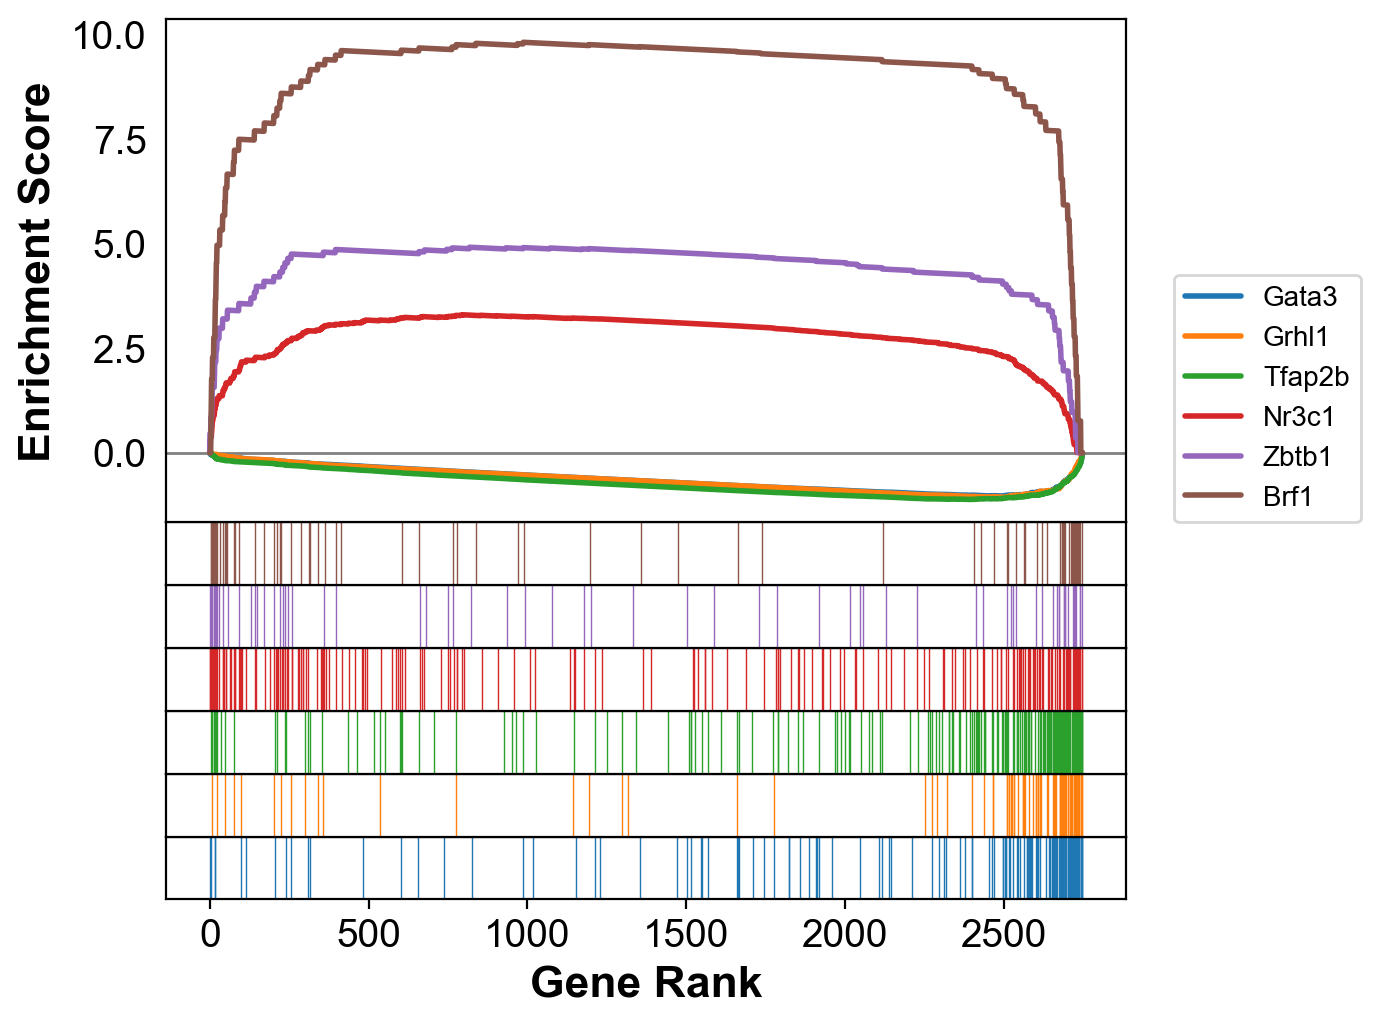

In [183]:
terms = gs_res_pos.res2d.Term
axs = gs_res_pos.plot(terms[:6], 
                  show_ranking=False, 
                  legend_kws={'loc': (1.05, 0)},
                  # ofname = os.path.join(save_gsea,f'pos_enrich_plot_{combine}.pdf'),
                  figsize=(2,5))

neg-regulate

In [151]:
# def get_gs_res(tf_genes_pos_dict):

# - initial
init_cluster = 'TAC-1'
control_cluster = 'IRS'
combine = '_'.join([init_cluster,control_cluster])

# - get tf_GRN_dict
tf_GRN_dict = total_tf_GRN_dict[combine]


# - 获取所有的调控为正的tf并排序
df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
piv = pd.pivot_table(df, values='value', columns="cluster", index="index")
if True:
    piv = piv.fillna(0)
else:
    piv = piv.fillna(piv.mean(axis=0))
    
goi4 = piv[piv['adjusted coef'] > 0.01].index
goi4_pcc_list = [TF_pcc_dict[i] for i in goi4]
zipped_lists = zip(goi4_pcc_list, goi4)
sorted_lists = sorted(zipped_lists,reverse=True)
goi4_pcc_list, goi4 = zip(*sorted_lists)
len(goi4)

# - get top and bottom TFs
tf_genes_pos_dict, tf_genes_neg_dict = {}, {}
for tf in list(goi4[0:3])+list(goi4[-3:]):
    df2 = pd.DataFrame.from_dict(tf_GRN_dict[tf],orient='index',columns=['value'])
    tf_genes_pos_dict[tf] = list(df2[df2.value>0].index)
    tf_genes_neg_dict[tf] = list(df2[df2.value<0].index)
print(list(goi4[0:3])+list(goi4[-3:]))

# - get df_total
adata_part = adata[adata.obs[cluster_name_for_GRN_unit].isin([control_cluster, init_cluster])].copy()
df = pd.DataFrame(data=adata_part.X,index=adata_part.obs_names,columns=adata_part.var_names)
df = df.T
df.index.name = 'Gene'
df_total = df
class_vector = list(adata_part.obs[cluster_name_for_GRN_unit])

In [180]:
# - run gsea
fix_seed(2023)
# enrichr libraries are supported by gsea module. Just provide the name
gs_res_neg = gp.gsea(data=df_total, # or data='./P53_resampling_data.txt'
                 gene_sets=tf_genes_neg_dict, # or enrichr library names
                 cls= class_vector, # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, 
                 seed= 2023,
                 min_size=1)

In [185]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
df2 = gs_res_neg.res2d
df2['NES_abs'] = [abs(i) for i in list(df2.NES)]
df2.sort_values("NES_abs").head(10)
save_gsea = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/gsea'
ax = dotplot(df2,
             # y='NES',
             # y_order=['E2f1'],
             column="NES_abs",
             title='Neg regulate',
             cmap=plt.cm.viridis,
             size=3,
             figsize=(2.5,4.5), 
             cutoff=5,
             ofname = os.path.join(save_gsea,f'neg_dotplot_{combine}.pdf'),
             top_term=100)


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 31 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'G', 'N', 'T', 'Z', 'a', 'b', 'c', 'e', 'eight', 'f', 'five', 'h', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'one', 'p', 'percent', 'period', 'r', 's', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 8, 16, 17, 19, 20, 21, 22, 24, 27, 37, 42, 49, 55, 61, 68, 69, 70, 72, 73, 75, 76, 79, 81, 83, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 31 glyphs after
INFO:fon

In [187]:
gs_res_neg.res2d

Name    Term        ES       NES NOM p-val FDR q-val FWER p-val   Tag %  \
0  gsea   Grhl1  0.718725  2.767682       0.0       0.0        0.0   44/80   
1  gsea  Tfap2b  0.615081   2.75801       0.0       0.0        0.0  92/170   
2  gsea   Gata3  0.635761  2.659878       0.0       0.0        0.0  75/131   
3  gsea   Nr3c1 -0.535475 -2.269747       0.0       0.0        0.0  58/126   
4  gsea   Zbtb1 -0.493384 -2.054772       0.0       0.0        0.0   38/84   
5  gsea    Brf1 -0.551597 -2.026469       0.0       0.0        0.0   22/43   

   Gene %                                         Lead_genes   NES_abs  
0   9.17%  Mki67;Smc4;Kif11;Eda;Ccnd2;Anln;Mt2;Hist1h1e;S...  2.767682  
1  15.10%  Mki67;Smc4;Ccnd2;Mt2;Hist1h1e;Pola1;Cenpe;Cadm...  2.758010  
2  15.10%  Smc4;Kif11;Ccnd2;Atad2;Mt2;Setbp1;Cenpe;Diaph3...  2.659878  
3  11.24%  Krt25;Pitpnc1;Wdr47;Cpm;Neo1;Krt27;Cux1;Maf;Cc...  2.269747  
4  14.23%  Krt25;Pitpnc1;Wdr47;Cpm;Neo1;Cux1;Tnik;Ccser1;...  2.054772  
5   9.21%  Wdr47;Neo1;Cux1;Tnik;Trim2;Arhgap29;Slc30a1;Pi...  2.026469

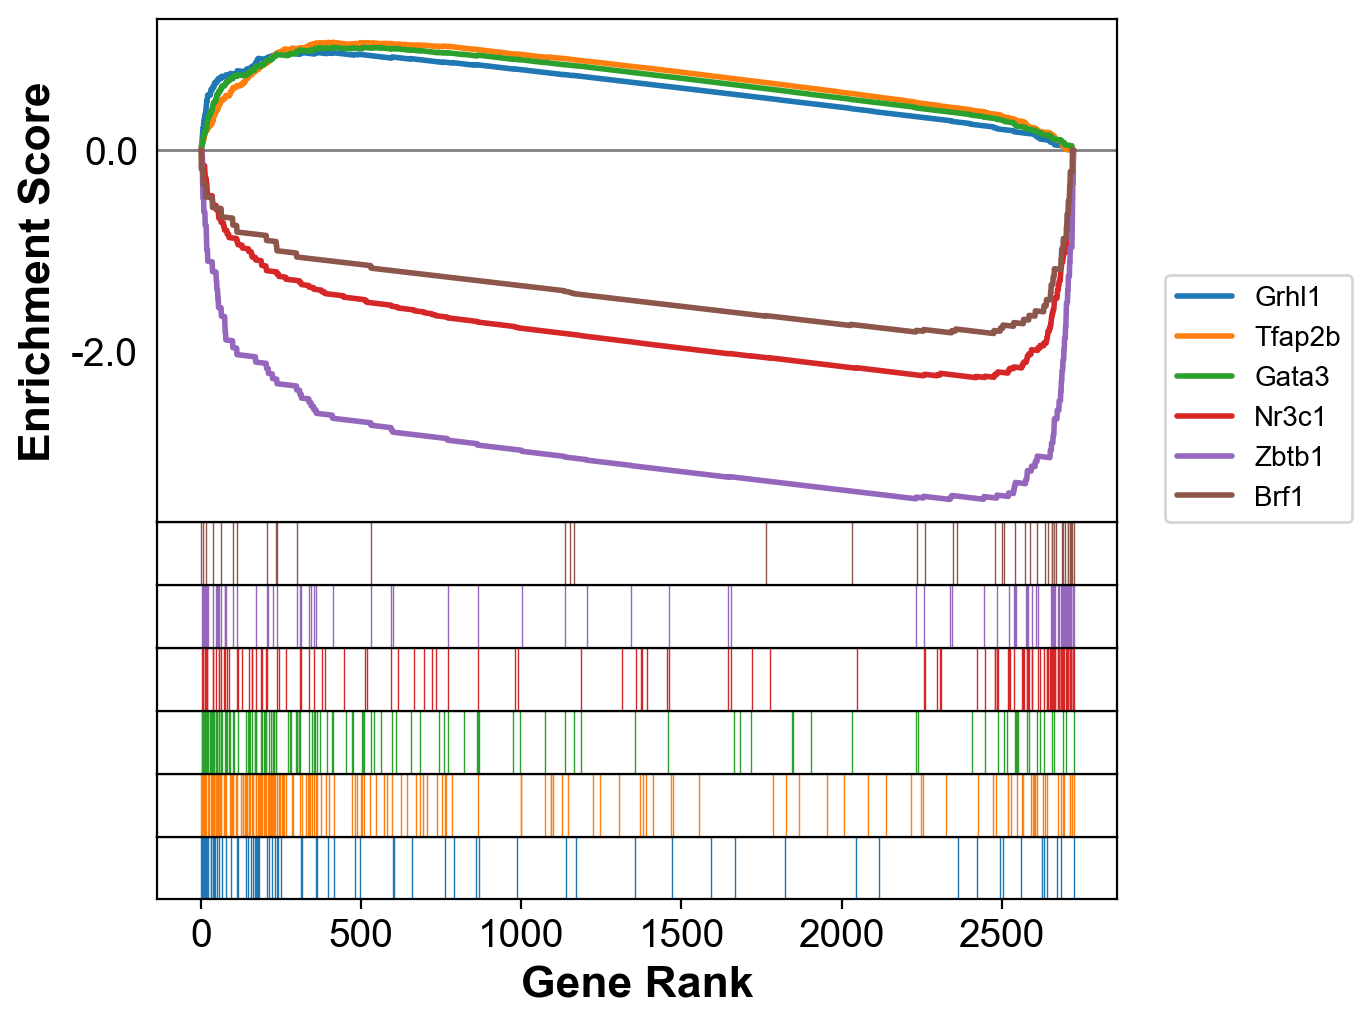

In [184]:
terms = gs_res_neg.res2d.Term
axs = gs_res_neg.plot(terms[:6], 
                  show_ranking=False, 
                  legend_kws={'loc': (1.05, 0)},
                  # ofname = os.path.join(save_gsea,f'neg_enrich_plot_{combine}.pdf'),
                  figsize=(2,5))

##### neg

In [79]:
# - initial
init_cluster = 'TAC-1'
control_cluster = 'IRS'
combine = '_'.join([init_cluster,control_cluster])

# - get tf_GRN_dict
tf_GRN_dict = total_tf_GRN_dict[combine]

# 获取所有的调控为正的tf并排序
df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
piv = pd.pivot_table(df, values='value', columns="cluster", index="index")
if True:
    piv = piv.fillna(0)
else:
    piv = piv.fillna(piv.mean(axis=0))
    
goi4 = piv[piv['adjusted coef'] > 0].index
goi4_pcc_list = [TF_pcc_dict[i] for i in goi4]
zipped_lists = zip(goi4_pcc_list, goi4)
sorted_lists = sorted(zipped_lists,reverse=True)
goi4_pcc_list, goi4 = zip(*sorted_lists)

# - get the six TFs
tf_genes_pos_dict, tf_genes_neg_dict = {}, {}
for tf in list(goi4[0:3])+list(goi4[-3:]):
    df2 = pd.DataFrame.from_dict(tf_GRN_dict[tf],orient='index',columns=['value'])
    tf_genes_pos_dict[tf] = list(df2[df2.value>0].index)
    tf_genes_neg_dict[tf] = list(df2[df2.value<0].index)
    
# - get adata_part
adata_part = adata[adata.obs[cluster_name_for_GRN_unit].isin([control_cluster, init_cluster])].copy()
df3 = pd.DataFrame(data=adata_part.X,index=adata_part.obs_names,columns=adata_part.var_names)
df3 = df3.T
df3.index.name = 'Gene'

class_vector = list(adata_part.obs[cluster_name_for_GRN_unit])

# run gsea
# enrichr libraries are supported by gsea module. Just provide the name
gs_res = gp.gsea(data=df3, # or data='./P53_resampling_data.txt'
                 gene_sets=tf_genes_neg_dict, # or enrichr library names
                 cls= class_vector, # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, 
                 seed= 7,
                 min_size=1)

In [80]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
df4 = gs_res.res2d
df4['NES_abs'] = [abs(i) for i in list(df4.NES)]
save_gsea = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/gsea'
os.makedirs(save_gsea,exist_ok=True)
ax = dotplot(df4,
             # y='NES',
             # y_order=['E2f1'],
             column="NES_abs",
             title='Neg-regulated target set',
             cmap=plt.cm.viridis,
             size=3,
             figsize=(4,6), 
             cutoff=5,
             ofname = os.path.join(save_gsea,f'neg_dotplot_{combine}.pdf'),
             top_term=100)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'G', 'N', 'T', 'Z', 'a', 'b', 'c', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'one', 'p', 'percent', 'period', 'r', 's', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 8, 16, 17, 19, 20, 21, 22, 23, 24, 27, 37, 42, 49, 55, 61, 68, 69, 70, 72, 73, 75, 76, 79, 81, 83, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 32 glyphs af

In [81]:
from gseapy import gseaplot, heatmap
terms = gs_res.res2d.Term
for i in range(len(terms)):
    # i = 0
    # Make sure that ``ofname`` is not None, if you want to save your figure to disk
    gseaplot(rank_metric=gs_res.ranking, term=terms[i], **gs_res.results[terms[i]],
             title = f'{terms[i]} neg-regulated target set',
            ofname = os.path.join(save_gsea,f'neg_gseaplot_{terms[i]}.pdf'))

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'D', 'E', 'F', 'N', 'P', 'R', 'S', 'Z', 'a', 'c', 'colon', 'e', 'eight', 'five', 'four', 'hyphen', 'l', 'nonmarkingreturn', 'o', 'one', 'period', 'plus', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 14, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 29, 39, 40, 41, 49, 51, 53, 54, 61, 68, 70, 72, 79, 82, 85, 86, 87, 89]
INFO:fontTools.subset:Closed glyph list over 'GSUB':

## 正式版 - TAC->Hair Shaft

In [14]:
adata.obs[cluster_name].value_counts()

Hair Shaft-cuticle.cortex    672
IRS                          672
Medulla                      672
TAC-1                        672
Name: celltype, dtype: int64

finish oracle_links_part load


  0%|          | 0/1 [00:00<?, ?it/s]

=======control cluster is:  Hair Shaft-cuticle.cortex========


  0%|          | 0/1 [00:00<?, ?it/s]

==========model:ridge, alpha:1
correlation is: 0.9451131592927632


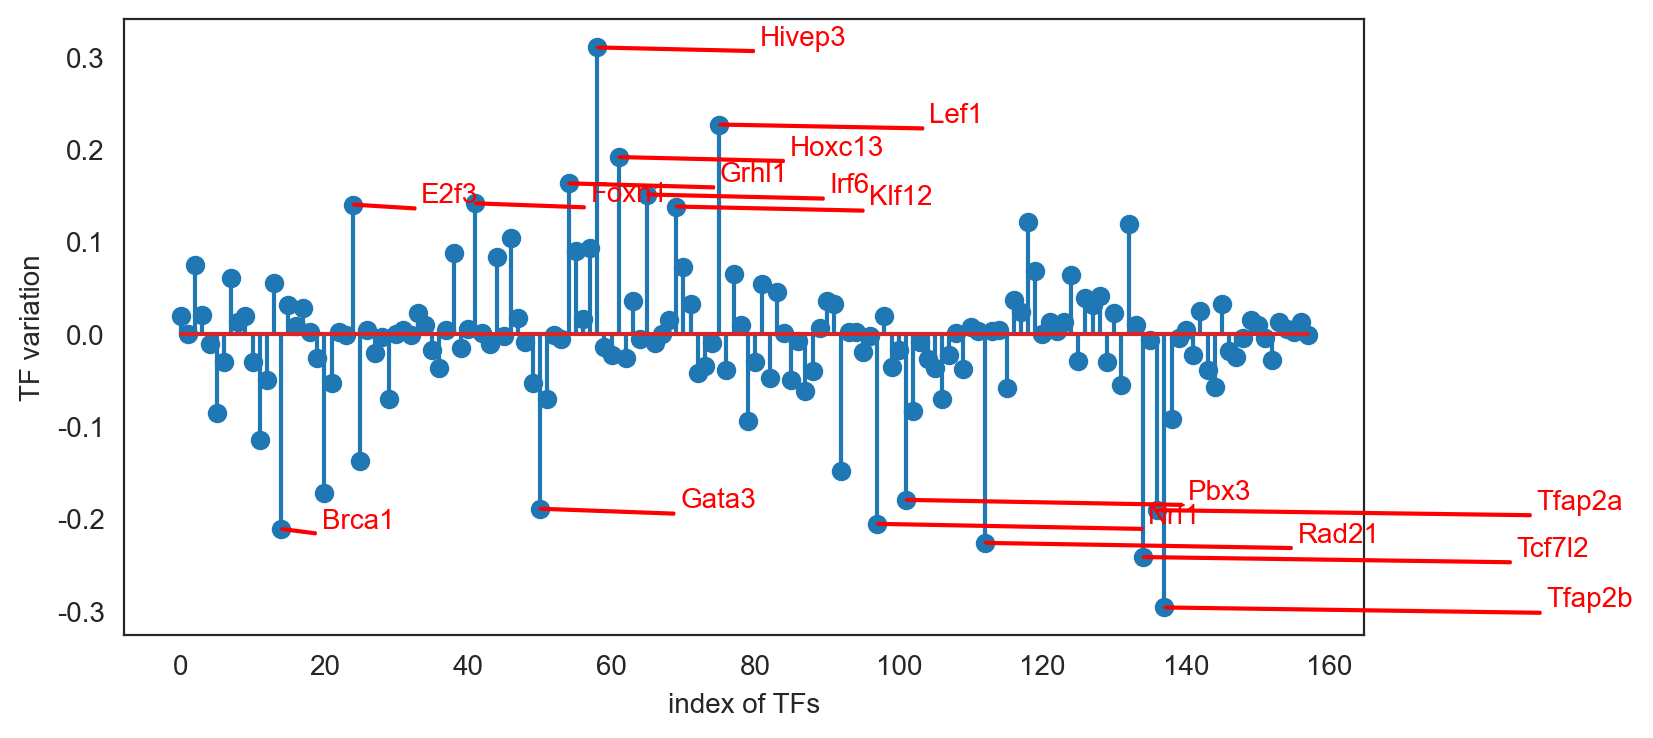

the percentile threshold is 89.0625
0.12070485743712851 -0.15696268590787663 0.4519423086467105


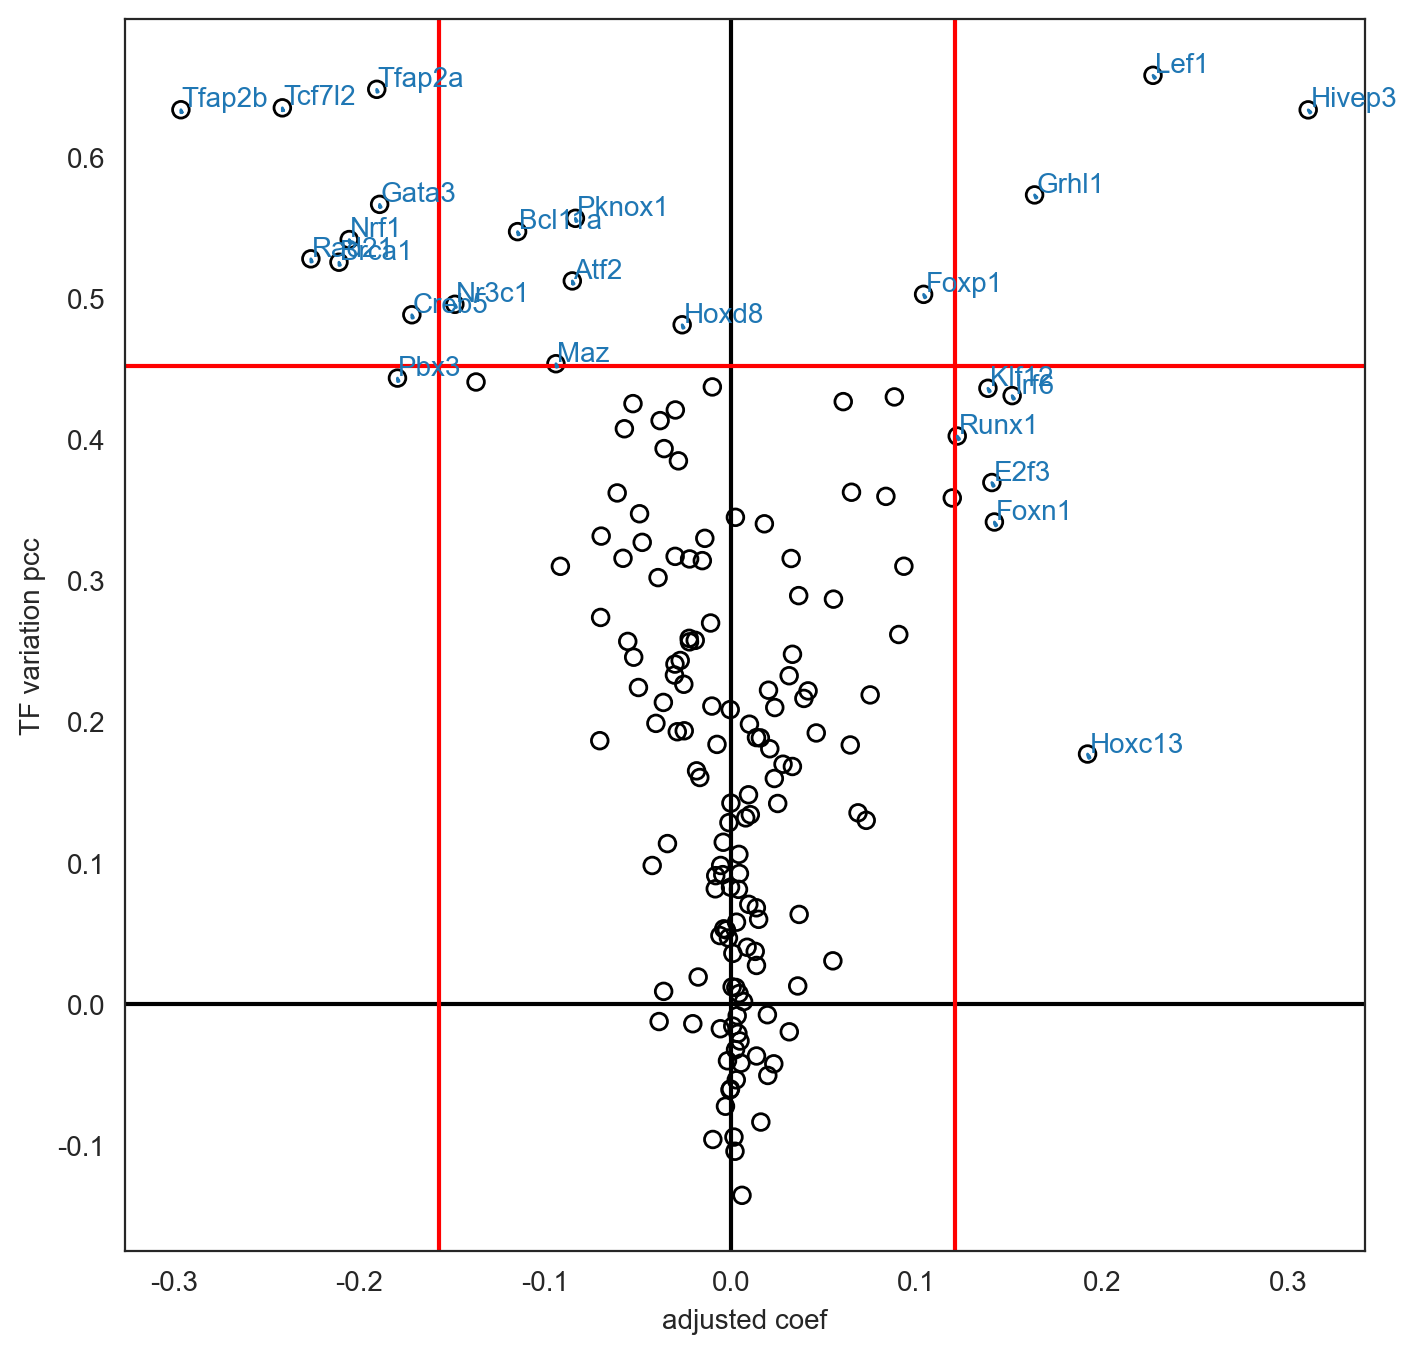

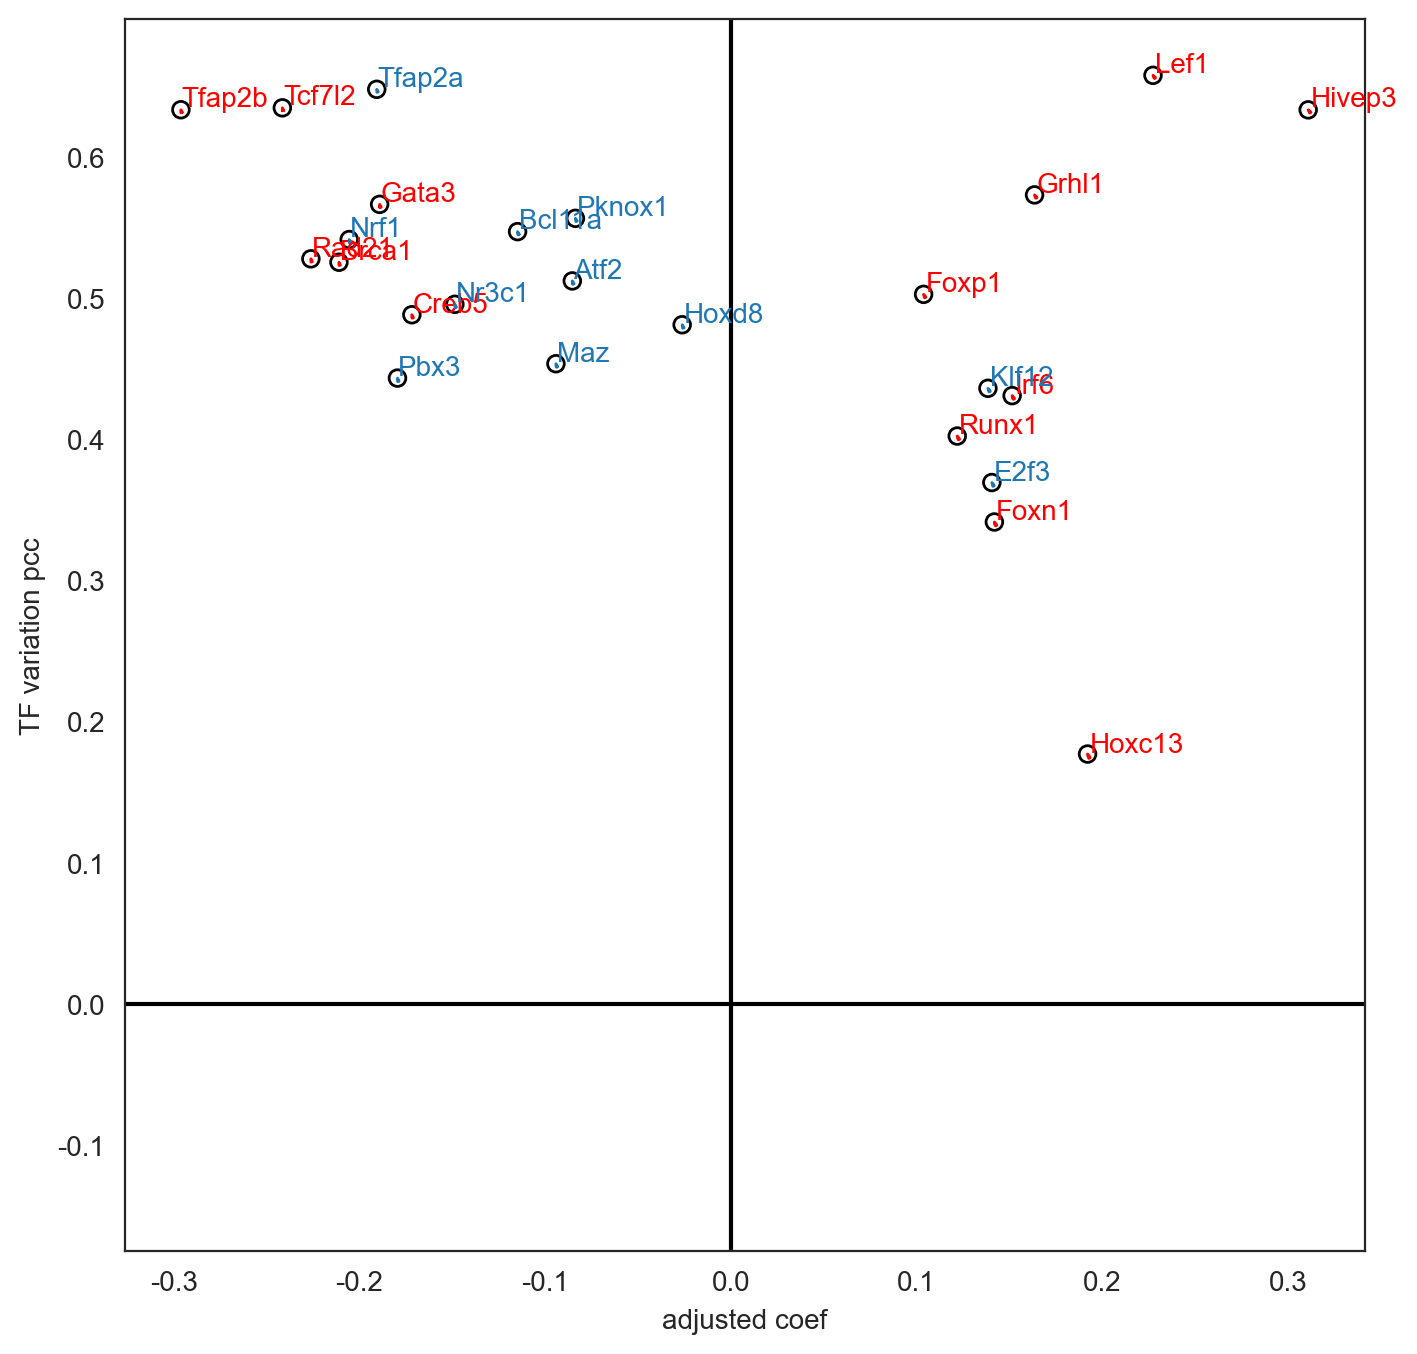

In [174]:


tmp_list = list(adata.obs[cluster_name].unique())
# tmp_list.remove('louvain5')
init_cluster = 'TAC-1'
# tmp_list = ['8-0']
score_de_list, score_our_list = [], []
total_tf_pos_control_norecover_list, total_pos_gene_filter_norecover_list = [], []
for control_cluster in tmp_list:
    control_cluster = 'Hair Shaft-cuticle.cortex'
    
    
    tmp_control = control_cluster
    tmp_name = 'combine_init_cluster'
    combine = '_'.join([init_cluster,tmp_control])
    
    save_dir_part = os.path.join(save_dir_1, f'oracle_links_part')
    os.makedirs(os.path.join(save_dir_part,combine), exist_ok=True)
    
    if not os.path.exists(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle")):
        oracle_part = oracle.copy()
        oracle_part.adata = oracle.adata[oracle.adata.obs[cluster_name].isin([init_cluster,tmp_control])]
        oracle_part.adata.obs[tmp_name] = '_'.join([init_cluster,tmp_control])
        oracle_part.adata.obs[tmp_name] = oracle_part.adata.obs[tmp_name].astype('category')
        oracle_part.cluster_column_name = tmp_name
        oracle_part.adata.uns[f'{tmp_name}_colors'] = np.array(['#ead3c6'])
        # Calculate GRN for each population in "louvain_annot" clustering unit.
        # This step may take some time.(~30 minutes)
        links_part = oracle_part.get_links(cluster_name_for_GRN_unit=tmp_name, 
                                 alpha=10,
                                 verbose_level=10)


        save_dir_part = os.path.join(save_dir_1, f'oracle_links_part')
        os.makedirs(save_dir_part, exist_ok=True)
        oracle_part.to_hdf5(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle"))
        links_part.to_hdf5(file_path=os.path.join(save_dir_part,combine,"links.celloracle.links"))
    else:
        oracle_part = co.load_hdf5(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle"))
        links_part = co.load_hdf5(file_path=os.path.join(save_dir_part,combine,"links.celloracle.links"))
    
    print('finish oracle_links_part load')
    
    
    # set the link threshold and do inference again
    threshold_number = 10000
    alpha_fit_GRN = 10
    links_part.filter_links(threshold_number=threshold_number,
                       p=0.001,
                       weight='coef_abs')
    oracle_part.get_cluster_specific_TFdict_from_Links(links_object=links_part)
    oracle_part.fit_GRN_for_simulation(alpha=alpha_fit_GRN,
                              use_cluster_specific_TFdict=True)
    
    # control_cluster = tmp_control
    print(f"=======control cluster is:  {control_cluster}========")
    total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori, \
    total_tf_GRN_filter_mtx, total_tf_GRN_dict, total_tf_info_df, \
    total_total_rs_dict, total_mean_rs_dict = get_GRN_parameters(oracle_part,
                                                               links_part,
                                                               if_print=False)
    
    infer_layer = 'normalized_count' # imputed_count
    tf_list = list(total_tf_GRN_dict[combine].keys())
    
    
    total_gene_GRN_mtx, total_tf_GRN_mtx = total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori
    # the recovered links
    gene_GRN_mtx = total_gene_GRN_mtx[combine]
    tf_GRN_mtx = total_tf_GRN_mtx[combine]
    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]

    gene_list = list(tf_GRN_mtx.columns)
    layer_use = 'normalized_count'
    cluster_name_for_GRN_unit = cluster_name
    
    tf_GRN_dict = total_tf_GRN_dict[combine]
    
    
    recover_ = True
    # start recover
    if recover_ == True:
        # parameters for training GNN model
        n_splits = 10
        seed = 42
        neg_link_split = 'all' # 'all'/'neg_hard_sampling'; 
        #'all' use all remaining negative links to train the model
        #'neg_hard_sampling' use the paired links to the positive links
        model_name = 'GAT' # 'GraphSAGE'/'GAT'/'GCN'
        pred_name = 'mlp' #'mlp'/'dot'
        hidden_dim = 16
        out_dim = 7
        num_heads = [4, 4, 6]
        epochs = 1500
        lr = 0.01
        patience = 300
        gpu = 3
        verbose = True
        # set the torch device
        if torch.cuda.is_available():
            device='cuda'
            torch.cuda.set_device(gpu)
        else:
            device='cpu'

        prefix = f'threshold{threshold_number}_seed{seed}_{model_name}_epochs{epochs}_patience{patience}' # seedxxx_model_epochxxx_earlyxxx
        # the model dir that save model and pred, used for earlystopping
        save_dir_GNN = os.path.join(save_dir_1, f'GNN_model/{prefix}/{combine}')
        model_dir = f'{save_dir_GNN}/model_checkpoint'+'/model.pt'
        pred_dir = f'{save_dir_GNN}/pred_checkpoint'+'/pred.pt'
        os.makedirs(f'{save_dir_GNN}/model_checkpoint', exist_ok=True)
        os.makedirs(f'{save_dir_GNN}/pred_checkpoint', exist_ok=True)
        
        if os.path.exists(os.path.join(save_dir_GNN,'tf_gene_link_dict_Allfold.pickle')):
            with open(os.path.join(f'{save_dir_GNN}/tf_gene_link_dict_Allfold.pickle'), 'rb') as file:
                tf_gene_link_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/tf_gene_link_score_dict_Allfold.pickle'), 'rb') as file:
                tf_gene_link_score_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/model_dict_Allfold.pickle'), 'rb') as file:
                model_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/h_dict_Allfold.pickle'), 'rb') as file:
                h_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/thre_dict_Allfold.pickle'), 'rb') as file:
                thre_dict_Allfold = pickle.load(file)
            
        else:
            # construct the graph dataset
            adata_part = adata[adata.obs[cluster_name_for_GRN_unit]==init_cluster]
            dataset = GRN_Dataset(adata_part,tf_GRN_mtx,tf_list)
            graph = dataset[0]
            g = graph
            print(g)

            # train the model
            tf_gene_link_dict_Allfold,tf_gene_link_score_dict_Allfold,\
            model_dict_Allfold,h_dict_Allfold,thre_dict_Allfold\
            =   recover_links(g,
                              gene_list = gene_list,
                              n_splits = n_splits,
                              seed = seed,
                              neg_link_split = neg_link_split,
                              model_name = model_name,
                              pred_name = pred_name,
                              hidden_dim = hidden_dim,
                              out_dim = out_dim,
                              num_heads = num_heads,
                              epochs = epochs,
                              lr = lr,
                              patience = patience,
                              device = device,
                              model_dir = model_dir,
                              pred_dir = pred_dir,
                              verbose = verbose,
                              save_dir = save_dir_GNN,
                              tf_list = tf_list)
        
        # parameters for filter the links
        if_inv = False
        count_fold = 9
        iter_step = 1
        iter_step_inv = 4
        link_score_quantile = 0.1 # 0-1 to filter the percentage of recover links
        delete_percent = 0

        # filter the links
        df_tmp, tf_target_link, tf_target_iter_link, tf_recover_link\
            =   filter_recover_links(tf_GRN_dict = tf_GRN_dict,
                                     gene_list = gene_list,
                                     tf_list = tf_list,
                                     tf_gene_link_dict_Allfold = tf_gene_link_dict_Allfold,
                                     tf_gene_link_score_dict_Allfold = tf_gene_link_score_dict_Allfold,
                                     count_fold = count_fold,
                                     iter_step = iter_step,
                                     if_inv = if_inv,
                                     iter_step_inv = iter_step_inv,
                                     link_score_quantile = link_score_quantile)
        
        # delete links
        # construct total TFGene_score_dict
        TfGene_score_dict = {}
        for tf in tf_list:
            # tf = 'Gata3'

            idx = gene_list.index(tf)
            idx_list = list(np.arange(len(gene_list)))
            idx_list.remove(idx)

            # count the show times of folds and construct the tf_recover_link
            tf_folds_array = [tmp[tf] for key,tmp in tf_gene_link_dict_Allfold.items()]
            tf_folds_array = np.array(tf_folds_array)
            tf_folds_score_array = np.array([tmp[tf] for key,tmp in tf_gene_link_score_dict_Allfold.items()])
            count = np.sum(tf_folds_array,axis=0)
            link_score = np.mean(tf_folds_score_array,axis=0)

            for i,gene in enumerate(np.array(gene_list)[np.array(idx_list)]):
                TfGene_score_dict['_'.join([tf,gene])] = link_score[i]

            # # filter the links with fewer links across folds
            # tf_waiting_list = np.array(gene_list)[np.array(idx_list)[count>=count_fold]]
            # link_score_filter = link_score[count>=count_fold]

        # get the values of filtered_links
        df_tmp = links_part.filtered_links[combine]
        filter_score_list = []
        for i in range(threshold_number):
            filter_score_list.append(TfGene_score_dict['_'.join([df_tmp.iloc[i,0],df_tmp.iloc[i,1]])])

        # get the thre
        thre = np.quantile(filter_score_list,delete_percent)
        
        # get rows that are less than thre
        filter_score_list = np.array(filter_score_list)
        delete_row_list = []
        for i in range(threshold_number):
            if TfGene_score_dict['_'.join([df_tmp.iloc[i,0],df_tmp.iloc[i,1]])] < thre:
                delete_row_list.append(i)
                
        df_tmp = df_tmp.reset_index(drop=True)
        df_tmp.drop(delete_row_list)
        # links_part_filter = links_part.copy()
        links_part_filter = deepcopy(links_part)
        links_part_filter.filtered_links[combine] = df_tmp.drop(delete_row_list)
        
        # Add links
        # add the links to a new link object and redo the GRN inference
        links_recover, tf_recover_filter_link =   add_recover_links(links = links_part_filter,
                                          tf_list = tf_list,
                                          init_cluster = combine,
                                          tf_recover_link = tf_recover_link,
                                          tf_target_iter_link = tf_target_iter_link)
        # refit the GRN
        oracle_part.get_cluster_specific_TFdict_from_Links(links_object=links_recover)
        oracle_part.fit_GRN_for_simulation(alpha=alpha_fit_GRN,
                                      use_cluster_specific_TFdict=True)
        
        # update the gene_GRN_mtx and tf_GRN_mtx, then again use add_recover_links function
        # to encode tf_GRN_mtx
        gene_GRN_mtx = oracle_part.coef_matrix_per_cluster[combine].copy()
        tf_GRN_mtx = gene_GRN_mtx[~(gene_GRN_mtx == 0).all(axis=1)]
        
        # update the links_recover
        links_recover, tf_recover_filter_link =   add_recover_links(links = links_part_filter,
                                          tf_list = tf_list,
                                          init_cluster = combine,
                                          tf_recover_link = tf_recover_link,
                                          tf_target_iter_link = tf_target_iter_link,
                                          tf_GRN_mtx = tf_GRN_mtx)
        
        
        # reload the parameter
        total_gene_GRN_mtx, total_tf_GRN_mtx, \
        total_tf_GRN_filter_mtx, total_tf_GRN_dict, total_tf_info_df, \
        total_total_rs_dict, total_mean_rs_dict = get_GRN_parameters(oracle_part,
                                                                   links_recover,
                                                                   if_print=False)
    else:
        total_gene_GRN_mtx, total_tf_GRN_mtx = total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori

    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]
    

    # set parameters

    # the basic parameters
    # init_cluster, control_cluster = '0', '2'
    # init_cluster, control_cluster = 'S3-S1-TAC', 'S3-S1-Hair Shaft-cuticle.cortex'
    infer_layer = 'normalized_count' # imputed_count
    tf_list = list(total_tf_GRN_dict[combine].keys())

    # the recovered links
    gene_GRN_mtx = total_gene_GRN_mtx[combine]
    tf_GRN_mtx = total_tf_GRN_mtx[combine]
    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]

    gene_list = list(tf_GRN_mtx.columns)
    layer_use = 'normalized_count'
    cluster_name_for_GRN_unit = cluster_name
    
    
    # set up parameters
    layer_use = 'normalized_count'
    model = 'ridge'
    alpha = 1
    plot = True
    a = [0.6,0.2,0.2]
    regression_percentile = 90
    prop_mode = 'soft'
    tf_index = gene_GRN_mtx.index.isin(tf_list)
    
    if recover_:
        save_dir_2 = f'recover_{recover_}/{combine}/filter_quantile_{link_score_quantile}-model-{model}_alpha-{alpha}_a-{a[0]}-{a[1]}-{a[2]}-threshold_{threshold_number}'
    else:
        save_dir_2 = f'recover_{recover_}/{combine}/model-{model}_alpha-{alpha}_a-{a[0]}-{a[1]}-{a[2]}-threshold_{threshold_number}'
    os.makedirs(os.path.join(save_dir_1,save_dir_2),exist_ok=True)
    
    # infer the variation of the TFs

    plt.rcParams["figure.figsize"] = [8, 4]
    rr,X,init_ave,control_ave = control_TF_infer_recover(adata,
                                                cluster_name_for_GRN_unit,
                                                tf_list,
                                                gene_GRN_mtx,
                                                tf_GRN_mtx,
                                                init_cluster,
                                                control_cluster,
                                                gene_GRN_mtx_ori=gene_GRN_mtx_ori ,
                                                tf_GRN_mtx_ori=tf_GRN_mtx_ori,
                                                prop_mode = prop_mode,
                                                layer_use=layer_use,
                                                model=model, 
                                                alpha=alpha, 
                                                plot=plot,
                                                a1=a[0],
                                                a2=a[1],
                                                a3=a[2],
                                                regression_percentile = regression_percentile,
                                                annot_shifts=(2,0.01),
                                                xlabel='index of TFs',
                                                ylabel='TF variation',
                                                save=os.path.join(save_dir_1,save_dir_2,'regression_coef.png'))
    rr_corr = rr
    
    TF_pcc_dict, TF_acc_dict = cal_control_pcc(change_tf=tf_list,
                                  rr=rr_corr,
                                  tf_GRN_mtx=tf_GRN_mtx,
                                  diff_ave=(control_ave-init_ave).ravel(),
                                  mode='single',
                                  if_print=False,
                                  tf_GRN_dict=total_tf_GRN_dict[combine],
                                              X=X)
    
    pos_gene, neg_gene, pos_gene_tf, neg_gene_tf = get_de_genes(adata,
                                                             cluster_name_for_GRN_unit,
                                                             init_cluster,
                                                             control_cluster,
                                                             tf_list,
                                                             p_val=0.05)
    
    x_name, y_name = 'adjusted coef', 'TF variation pcc'
    percentile1 = 90
    percentile2 = 90
    plot_de_gene = True
    TF_number=10


    df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
    
    percentile = get_percentile_thre(df, 'value', True, x_name, y_name, TF_number=TF_number)
    
    save_dir_3 = f'percentile1-{percentile1}_percentile2-{percentile2}'
    os.makedirs(os.path.join(save_dir_1,save_dir_2,save_dir_3),exist_ok=True)
    
    save = os.path.join(save_dir_1,save_dir_2,save_dir_3,'compare')
    os.makedirs(save,exist_ok=True)
    
    
    # plt.rcParams["figure.figsize"] = [8, 8]
    # save = ''
    # save1 = os.path.join(save,'pcc_coef_compare.png')
    # save2 = os.path.join(save,'pcc_coef_de_compare.png')
    # save, save1, save2 = None, None, None
    # change_tf=plot_score_comparison_2D(df, 
    #                          value='value', 
    #                          cluster1=x_name, 
    #                          cluster2=y_name, 
    #                          percentile1=percentile,
    #                          percentile2=percentile,
    #                          annot_shifts=None, 
    #                          save=None, 
    #                          fillna_with_zero=True, 
    #                          plt_show=True,
    #                          select='union',
    #                          plot_de_gene=plot_de_gene,
    #                          neg_gene_tf=neg_gene_tf,
    #                          pos_gene_tf=pos_gene_tf,
    #                          title1='',
    #                          title2='',
    #                          save1=save1,
    #                          save2=save2)
    
    plt.rcParams["figure.figsize"] = [8, 8]
    save = ''
    save1 = os.path.join(save,'pcc_coef_compare.png')
    save2 = os.path.join(save,'pcc_coef_de_compare.png')
    save, save1, save2 = None, None, None

    save_dir = '/nfs/public/lichen/results/ISDE_GRN/TFAtlas_benchmark/figures/scatter_plot'
    os.makedirs(save_dir,exist_ok=True)
    save_dir_fig = os.path.join(save_dir,f'scatter_{control_cluster}.pdf')
    
    plt.rcParams["figure.figsize"] = [8, 8]
    save = ''
    save1 = os.path.join(save,'pcc_coef_compare.png')
    save2 = os.path.join(save,'pcc_coef_de_compare.png')
    save, save1, save2 = None, None, None
    change_tf=plot_score_comparison_2D(df, 
                             value='value', 
                             cluster1=x_name, 
                             cluster2=y_name, 
                             percentile1=percentile,
                             percentile2=percentile,
                             annot_shifts=None, 
                             save=None, 
                             fillna_with_zero=True, 
                             plt_show=True,
                             select='union',
                             plot_de_gene=plot_de_gene,
                             neg_gene_tf=neg_gene_tf,
                             pos_gene_tf=pos_gene_tf,
                             title1='',
                             title2='',
                             save1=save1,
                             save2=save2)

    # change_tf=plot_score_comparison_2D_test(df, 
    #                          value='value', 
    #                          cluster1=x_name, 
    #                          cluster2=y_name, 
    #                          percentile1=percentile,
    #                          percentile2=percentile,
    #                          annot_shifts=None, 
    #                          save=None, 
    #                          fillna_with_zero=True, 
    #                          plt_show=True,
    #                          select='union',
    #                          plot_de_gene=plot_de_gene,
    #                          neg_gene_tf=neg_gene_tf,
    #                          pos_gene_tf=pos_gene_tf,
    #                          title1='Cell state '+control_cluster,
    #                          title2='',
    #                          save1=save_dir_fig,
    #                          save2=save2,
    #                          goi_size=10,
    #                          point_size=15,
    #                          gt_tforf=gt_trorf)
    
    
    # gt_trorf = np.unique([i.split('-')[1] for i in filter_tforf_dict[control_cluster]])
    # de_tforf_list = np.intersect1d(total_tf_list,pos_gene)
    # print(f'our method on cluster {cluster_name} is :\n {np.intersect1d(gt_trorf,change_tf)} ')
    # print(f'DE on cluster {cluster_name} is :\n {np.intersect1d(gt_trorf,de_tforf_list)} ')
    
    # calculate the benchmark score
    tf_pos_control_list = [i for i in change_tf if rr_corr.coef_[tf_list.index(i)]>0]
    tf_pos_control_pcc_list = [TF_pcc_dict[i] for i in tf_pos_control_list]
    zipped_lists = zip(tf_pos_control_pcc_list, tf_pos_control_list)
    sorted_lists = sorted(zipped_lists,reverse=True)
    tf_pos_control_pcc_list, tf_pos_control_list = zip(*sorted_lists)
    
    pos_gene_filter_list = [i for i in pos_gene if i in total_tf_list][0:len(tf_pos_control_list)]
    
    
    # score_our, score_de = get_benchmark_score(gt_trorf, tf_pos_control_list), get_benchmark_score(gt_trorf, pos_gene_filter_list)
    # score_de_list.append(score_de)
    # score_our_list.append(score_our)
    # print('de score is: ', score_de)
    # print('our score is:', score_our)
    
    import json
    with open(os.path.join(save_dir_1,save_dir_2,save_dir_3,'tf_pos_control_list.json'), 'w') as file:
        json.dump(tf_pos_control_list, file)
    with open(os.path.join(save_dir_1,save_dir_2,save_dir_3,'pos_gene_filter_list.json'), 'w') as file:
        json.dump(pos_gene_filter_list, file)
    
    total_tf_pos_control_norecover_list.append(tf_pos_control_list)
    total_pos_gene_filter_norecover_list.append(pos_gene_filter_list)
    break

### 绘制scatter图

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 36 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'E', 'F', 'H', 'K', 'P', 'S', 'T', 'a', 'c', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'period', 'r', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 38, 40, 41, 43, 46, 51, 54, 55, 68, 70, 71, 72, 73, 75, 76, 79, 81, 82, 85, 87, 88, 89, 91]
INFO:fontTools.subset:Closed glyph l

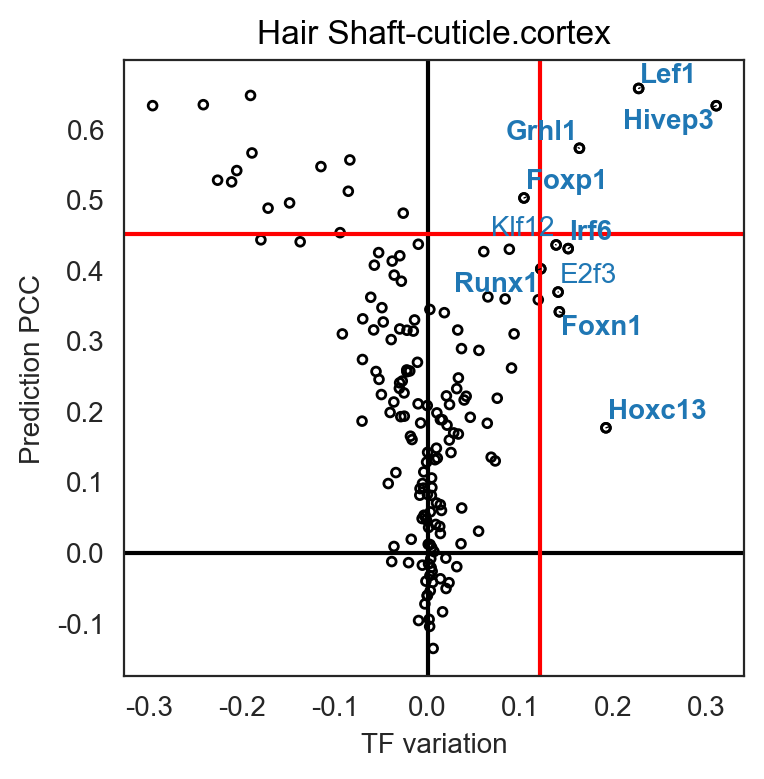

In [175]:
plt.rcParams["figure.figsize"] = [4, 4]
save = ''
save1 = os.path.join(save,'pcc_coef_compare.png')
save2 = os.path.join(save,'pcc_coef_de_compare.png')
save, save1, save2 = None, None, None

save_dir = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/scatter_plot'
os.makedirs(save_dir,exist_ok=True)
save_dir_fig = os.path.join(save_dir,f'scatter_{control_cluster}.pdf')
change_tf=plot_score_comparison_2D_test(df, 
                         value='value', 
                         cluster1=x_name, 
                         cluster2=y_name, 
                         percentile1=percentile,
                         percentile2=percentile,
                         annot_shifts=None, 
                         save=None, 
                         fillna_with_zero=True, 
                         plt_show=True,
                         select='union',
                         plot_de_gene=plot_de_gene,
                         neg_gene_tf=neg_gene_tf,
                         pos_gene_tf=pos_gene_tf,
                         title1=''+control_cluster,
                         title2='',
                         save1=save_dir_fig,
                         save2=save2,
                         goi_size=10,
                         point_size=10,
                         gt_tforf=pos_gene)

## 正式版 - TAC->Medulla

In [14]:
adata.obs[cluster_name].value_counts()

Hair Shaft-cuticle.cortex    672
IRS                          672
Medulla                      672
TAC-1                        672
Name: celltype, dtype: int64

finish oracle_links_part load


  0%|          | 0/1 [00:00<?, ?it/s]

=======control cluster is:  Medulla========


  0%|          | 0/1 [00:00<?, ?it/s]

==========model:ridge, alpha:1
correlation is: 0.8314747073865344


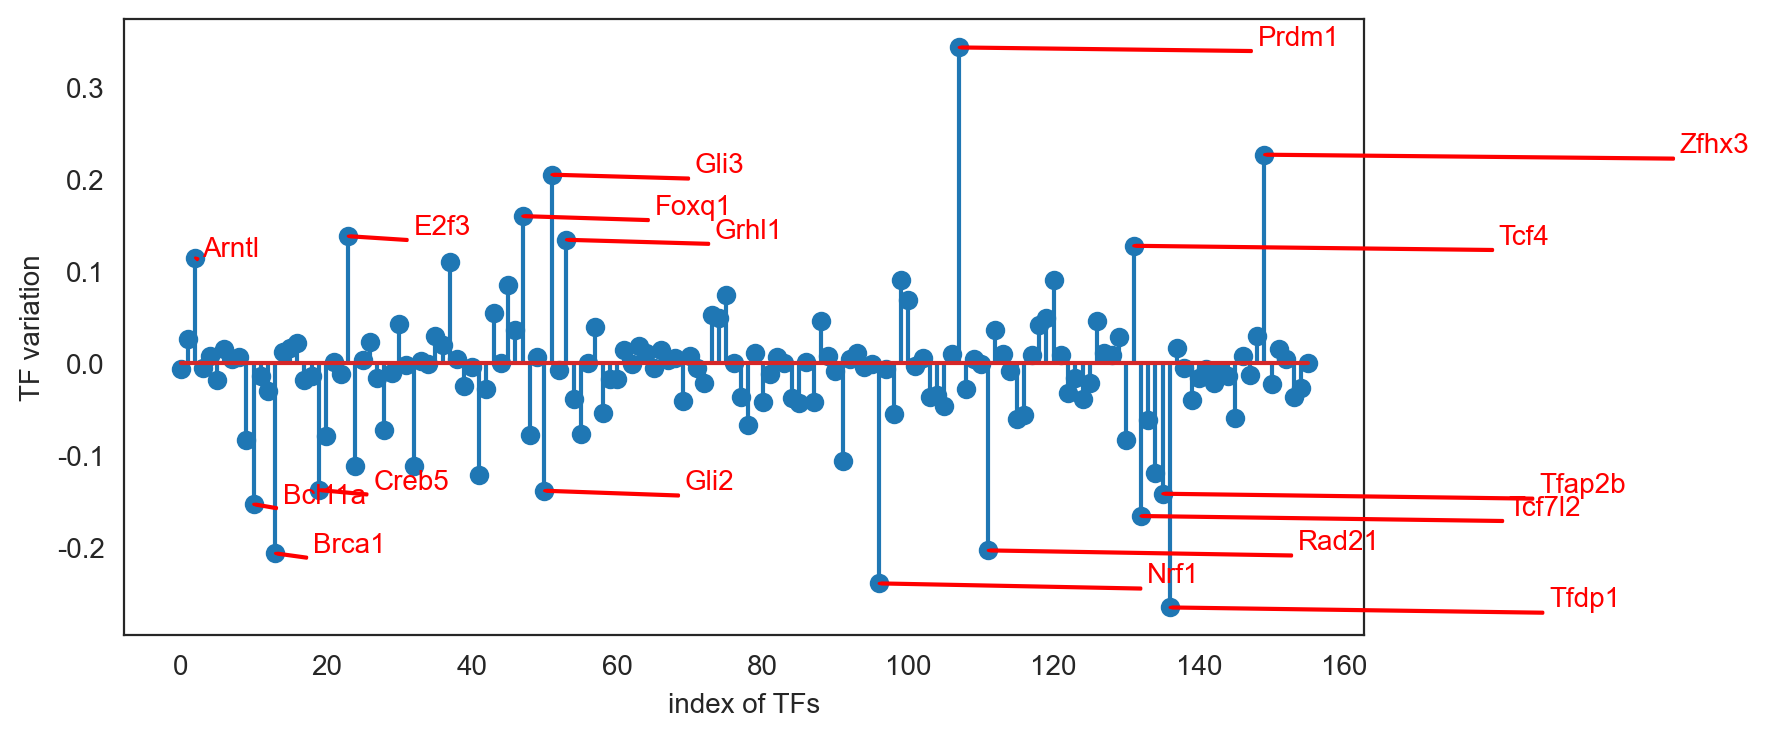

the percentile threshold is 87.5
0.09348632024193741 -0.11664007365413423 0.38769959229661316


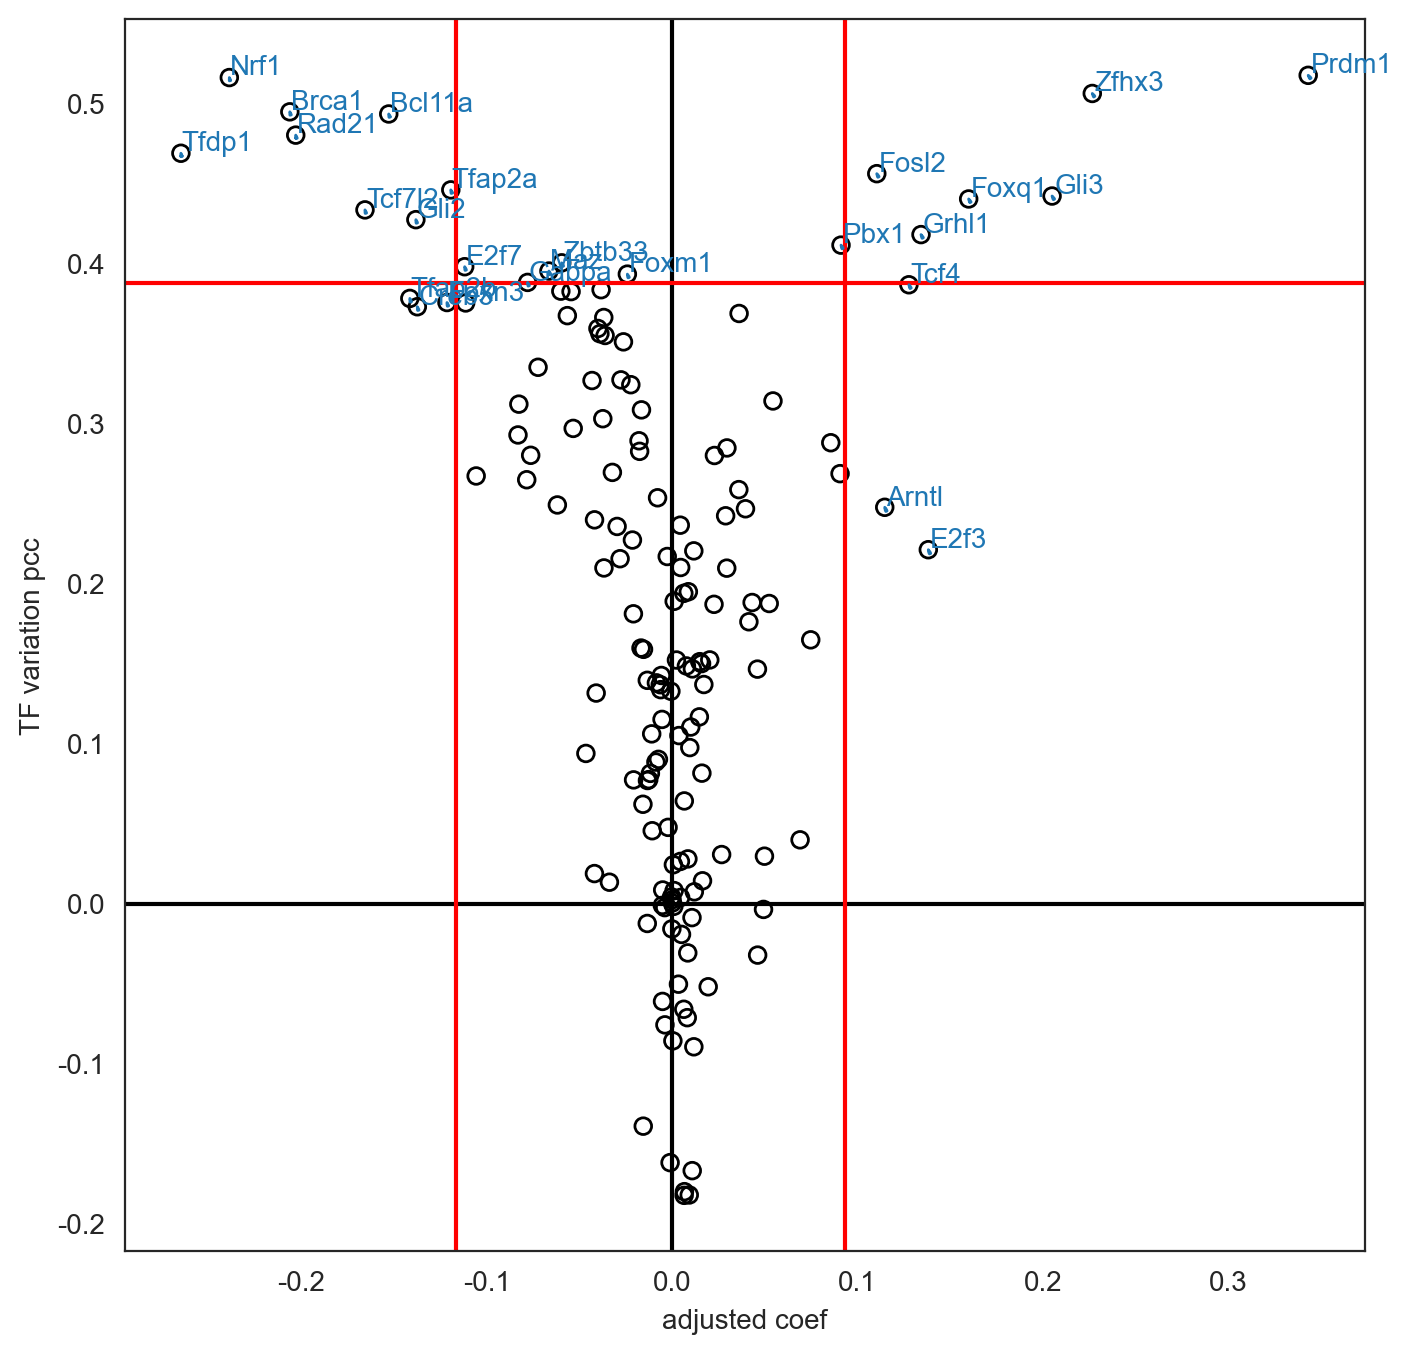

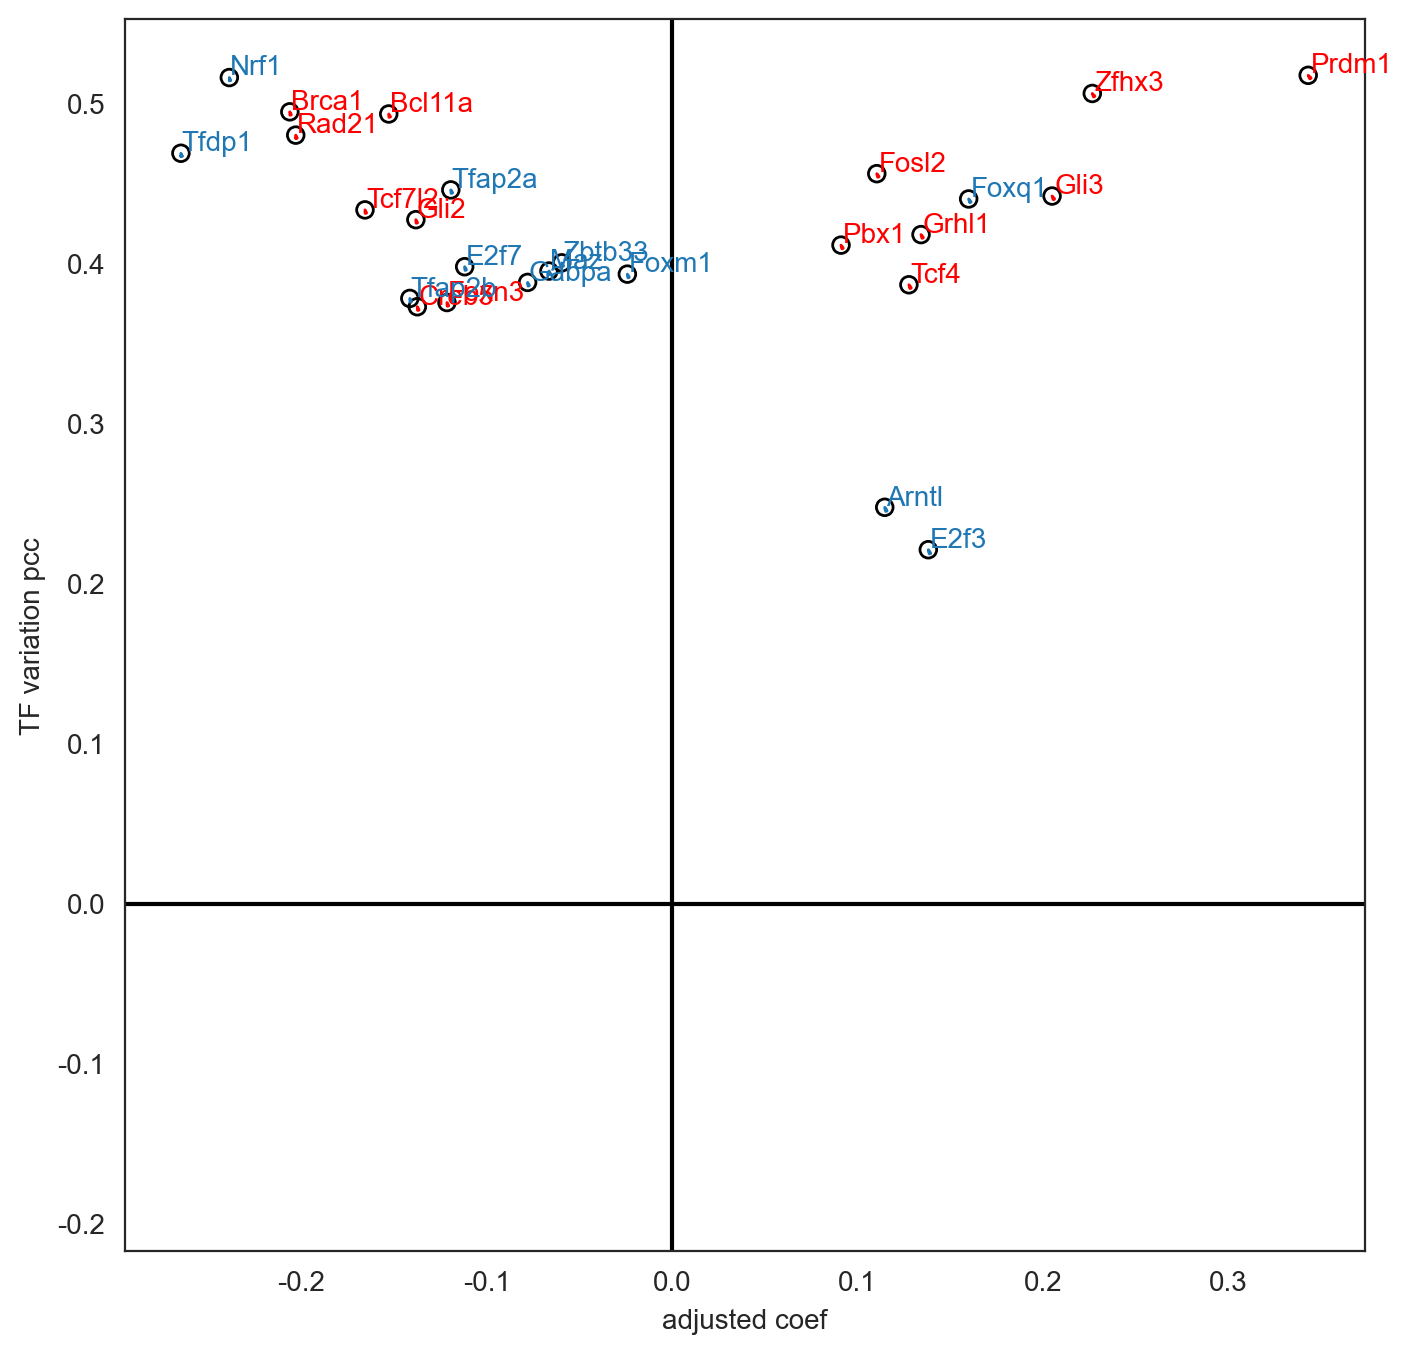

In [176]:


tmp_list = list(adata.obs[cluster_name].unique())
# tmp_list.remove('louvain5')
init_cluster = 'TAC-1'
# tmp_list = ['8-0']
score_de_list, score_our_list = [], []
total_tf_pos_control_norecover_list, total_pos_gene_filter_norecover_list = [], []
for control_cluster in tmp_list:
    control_cluster = 'Medulla'
    
    
    tmp_control = control_cluster
    tmp_name = 'combine_init_cluster'
    combine = '_'.join([init_cluster,tmp_control])
    
    save_dir_part = os.path.join(save_dir_1, f'oracle_links_part')
    os.makedirs(os.path.join(save_dir_part,combine), exist_ok=True)
    
    if not os.path.exists(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle")):
        oracle_part = oracle.copy()
        oracle_part.adata = oracle.adata[oracle.adata.obs[cluster_name].isin([init_cluster,tmp_control])]
        oracle_part.adata.obs[tmp_name] = '_'.join([init_cluster,tmp_control])
        oracle_part.adata.obs[tmp_name] = oracle_part.adata.obs[tmp_name].astype('category')
        oracle_part.cluster_column_name = tmp_name
        oracle_part.adata.uns[f'{tmp_name}_colors'] = np.array(['#ead3c6'])
        # Calculate GRN for each population in "louvain_annot" clustering unit.
        # This step may take some time.(~30 minutes)
        links_part = oracle_part.get_links(cluster_name_for_GRN_unit=tmp_name, 
                                 alpha=10,
                                 verbose_level=10)


        save_dir_part = os.path.join(save_dir_1, f'oracle_links_part')
        os.makedirs(save_dir_part, exist_ok=True)
        oracle_part.to_hdf5(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle"))
        links_part.to_hdf5(file_path=os.path.join(save_dir_part,combine,"links.celloracle.links"))
    else:
        oracle_part = co.load_hdf5(os.path.join(save_dir_part,combine,"oracle.celloracle.oracle"))
        links_part = co.load_hdf5(file_path=os.path.join(save_dir_part,combine,"links.celloracle.links"))
    
    print('finish oracle_links_part load')
    
    
    # set the link threshold and do inference again
    threshold_number = 10000
    alpha_fit_GRN = 10
    links_part.filter_links(threshold_number=threshold_number,
                       p=0.001,
                       weight='coef_abs')
    oracle_part.get_cluster_specific_TFdict_from_Links(links_object=links_part)
    oracle_part.fit_GRN_for_simulation(alpha=alpha_fit_GRN,
                              use_cluster_specific_TFdict=True)
    
    # control_cluster = tmp_control
    print(f"=======control cluster is:  {control_cluster}========")
    total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori, \
    total_tf_GRN_filter_mtx, total_tf_GRN_dict, total_tf_info_df, \
    total_total_rs_dict, total_mean_rs_dict = get_GRN_parameters(oracle_part,
                                                               links_part,
                                                               if_print=False)
    
    infer_layer = 'normalized_count' # imputed_count
    tf_list = list(total_tf_GRN_dict[combine].keys())
    
    
    total_gene_GRN_mtx, total_tf_GRN_mtx = total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori
    # the recovered links
    gene_GRN_mtx = total_gene_GRN_mtx[combine]
    tf_GRN_mtx = total_tf_GRN_mtx[combine]
    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]

    gene_list = list(tf_GRN_mtx.columns)
    layer_use = 'normalized_count'
    cluster_name_for_GRN_unit = cluster_name
    
    tf_GRN_dict = total_tf_GRN_dict[combine]
    
    
    recover_ = True
    # start recover
    if recover_ == True:
        # parameters for training GNN model
        n_splits = 10
        seed = 42
        neg_link_split = 'all' # 'all'/'neg_hard_sampling'; 
        #'all' use all remaining negative links to train the model
        #'neg_hard_sampling' use the paired links to the positive links
        model_name = 'GAT' # 'GraphSAGE'/'GAT'/'GCN'
        pred_name = 'mlp' #'mlp'/'dot'
        hidden_dim = 16
        out_dim = 7
        num_heads = [4, 4, 6]
        epochs = 1500
        lr = 0.01
        patience = 300
        gpu = 3
        verbose = True
        # set the torch device
        if torch.cuda.is_available():
            device='cuda'
            torch.cuda.set_device(gpu)
        else:
            device='cpu'

        prefix = f'threshold{threshold_number}_seed{seed}_{model_name}_epochs{epochs}_patience{patience}' # seedxxx_model_epochxxx_earlyxxx
        # the model dir that save model and pred, used for earlystopping
        save_dir_GNN = os.path.join(save_dir_1, f'GNN_model/{prefix}/{combine}')
        model_dir = f'{save_dir_GNN}/model_checkpoint'+'/model.pt'
        pred_dir = f'{save_dir_GNN}/pred_checkpoint'+'/pred.pt'
        os.makedirs(f'{save_dir_GNN}/model_checkpoint', exist_ok=True)
        os.makedirs(f'{save_dir_GNN}/pred_checkpoint', exist_ok=True)
        
        if os.path.exists(os.path.join(save_dir_GNN,'tf_gene_link_dict_Allfold.pickle')):
            with open(os.path.join(f'{save_dir_GNN}/tf_gene_link_dict_Allfold.pickle'), 'rb') as file:
                tf_gene_link_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/tf_gene_link_score_dict_Allfold.pickle'), 'rb') as file:
                tf_gene_link_score_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/model_dict_Allfold.pickle'), 'rb') as file:
                model_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/h_dict_Allfold.pickle'), 'rb') as file:
                h_dict_Allfold = pickle.load(file)
            with open(os.path.join(f'{save_dir_GNN}/thre_dict_Allfold.pickle'), 'rb') as file:
                thre_dict_Allfold = pickle.load(file)
            
        else:
            # construct the graph dataset
            adata_part = adata[adata.obs[cluster_name_for_GRN_unit]==init_cluster]
            dataset = GRN_Dataset(adata_part,tf_GRN_mtx,tf_list)
            graph = dataset[0]
            g = graph
            print(g)

            # train the model
            tf_gene_link_dict_Allfold,tf_gene_link_score_dict_Allfold,\
            model_dict_Allfold,h_dict_Allfold,thre_dict_Allfold\
            =   recover_links(g,
                              gene_list = gene_list,
                              n_splits = n_splits,
                              seed = seed,
                              neg_link_split = neg_link_split,
                              model_name = model_name,
                              pred_name = pred_name,
                              hidden_dim = hidden_dim,
                              out_dim = out_dim,
                              num_heads = num_heads,
                              epochs = epochs,
                              lr = lr,
                              patience = patience,
                              device = device,
                              model_dir = model_dir,
                              pred_dir = pred_dir,
                              verbose = verbose,
                              save_dir = save_dir_GNN,
                              tf_list = tf_list)
        
        # parameters for filter the links
        if_inv = False
        count_fold = 9
        iter_step = 1
        iter_step_inv = 4
        link_score_quantile = 0.1 # 0-1 to filter the percentage of recover links
        delete_percent = 0

        # filter the links
        df_tmp, tf_target_link, tf_target_iter_link, tf_recover_link\
            =   filter_recover_links(tf_GRN_dict = tf_GRN_dict,
                                     gene_list = gene_list,
                                     tf_list = tf_list,
                                     tf_gene_link_dict_Allfold = tf_gene_link_dict_Allfold,
                                     tf_gene_link_score_dict_Allfold = tf_gene_link_score_dict_Allfold,
                                     count_fold = count_fold,
                                     iter_step = iter_step,
                                     if_inv = if_inv,
                                     iter_step_inv = iter_step_inv,
                                     link_score_quantile = link_score_quantile)
        
        # delete links
        # construct total TFGene_score_dict
        TfGene_score_dict = {}
        for tf in tf_list:
            # tf = 'Gata3'

            idx = gene_list.index(tf)
            idx_list = list(np.arange(len(gene_list)))
            idx_list.remove(idx)

            # count the show times of folds and construct the tf_recover_link
            tf_folds_array = [tmp[tf] for key,tmp in tf_gene_link_dict_Allfold.items()]
            tf_folds_array = np.array(tf_folds_array)
            tf_folds_score_array = np.array([tmp[tf] for key,tmp in tf_gene_link_score_dict_Allfold.items()])
            count = np.sum(tf_folds_array,axis=0)
            link_score = np.mean(tf_folds_score_array,axis=0)

            for i,gene in enumerate(np.array(gene_list)[np.array(idx_list)]):
                TfGene_score_dict['_'.join([tf,gene])] = link_score[i]

            # # filter the links with fewer links across folds
            # tf_waiting_list = np.array(gene_list)[np.array(idx_list)[count>=count_fold]]
            # link_score_filter = link_score[count>=count_fold]

        # get the values of filtered_links
        df_tmp = links_part.filtered_links[combine]
        filter_score_list = []
        for i in range(threshold_number):
            filter_score_list.append(TfGene_score_dict['_'.join([df_tmp.iloc[i,0],df_tmp.iloc[i,1]])])

        # get the thre
        thre = np.quantile(filter_score_list,delete_percent)
        
        # get rows that are less than thre
        filter_score_list = np.array(filter_score_list)
        delete_row_list = []
        for i in range(threshold_number):
            if TfGene_score_dict['_'.join([df_tmp.iloc[i,0],df_tmp.iloc[i,1]])] < thre:
                delete_row_list.append(i)
                
        df_tmp = df_tmp.reset_index(drop=True)
        df_tmp.drop(delete_row_list)
        # links_part_filter = links_part.copy()
        links_part_filter = deepcopy(links_part)
        links_part_filter.filtered_links[combine] = df_tmp.drop(delete_row_list)
        
        # Add links
        # add the links to a new link object and redo the GRN inference
        links_recover, tf_recover_filter_link =   add_recover_links(links = links_part_filter,
                                          tf_list = tf_list,
                                          init_cluster = combine,
                                          tf_recover_link = tf_recover_link,
                                          tf_target_iter_link = tf_target_iter_link)
        # refit the GRN
        oracle_part.get_cluster_specific_TFdict_from_Links(links_object=links_recover)
        oracle_part.fit_GRN_for_simulation(alpha=alpha_fit_GRN,
                                      use_cluster_specific_TFdict=True)
        
        # update the gene_GRN_mtx and tf_GRN_mtx, then again use add_recover_links function
        # to encode tf_GRN_mtx
        gene_GRN_mtx = oracle_part.coef_matrix_per_cluster[combine].copy()
        tf_GRN_mtx = gene_GRN_mtx[~(gene_GRN_mtx == 0).all(axis=1)]
        
        # update the links_recover
        links_recover, tf_recover_filter_link =   add_recover_links(links = links_part_filter,
                                          tf_list = tf_list,
                                          init_cluster = combine,
                                          tf_recover_link = tf_recover_link,
                                          tf_target_iter_link = tf_target_iter_link,
                                          tf_GRN_mtx = tf_GRN_mtx)
        
        
        # reload the parameter
        total_gene_GRN_mtx, total_tf_GRN_mtx, \
        total_tf_GRN_filter_mtx, total_tf_GRN_dict, total_tf_info_df, \
        total_total_rs_dict, total_mean_rs_dict = get_GRN_parameters(oracle_part,
                                                                   links_recover,
                                                                   if_print=False)
    else:
        total_gene_GRN_mtx, total_tf_GRN_mtx = total_gene_GRN_mtx_ori, total_tf_GRN_mtx_ori

    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]
    

    # set parameters

    # the basic parameters
    # init_cluster, control_cluster = '0', '2'
    # init_cluster, control_cluster = 'S3-S1-TAC', 'S3-S1-Hair Shaft-cuticle.cortex'
    infer_layer = 'normalized_count' # imputed_count
    tf_list = list(total_tf_GRN_dict[combine].keys())

    # the recovered links
    gene_GRN_mtx = total_gene_GRN_mtx[combine]
    tf_GRN_mtx = total_tf_GRN_mtx[combine]
    # the original oracle linsk
    gene_GRN_mtx_ori = total_gene_GRN_mtx_ori[combine]
    tf_GRN_mtx_ori = total_tf_GRN_mtx_ori[combine]

    gene_list = list(tf_GRN_mtx.columns)
    layer_use = 'normalized_count'
    cluster_name_for_GRN_unit = cluster_name
    
    
    # set up parameters
    layer_use = 'normalized_count'
    model = 'ridge'
    alpha = 1
    plot = True
    a = [0.6,0.2,0.2]
    regression_percentile = 90
    prop_mode = 'soft'
    tf_index = gene_GRN_mtx.index.isin(tf_list)
    
    if recover_:
        save_dir_2 = f'recover_{recover_}/{combine}/filter_quantile_{link_score_quantile}-model-{model}_alpha-{alpha}_a-{a[0]}-{a[1]}-{a[2]}-threshold_{threshold_number}'
    else:
        save_dir_2 = f'recover_{recover_}/{combine}/model-{model}_alpha-{alpha}_a-{a[0]}-{a[1]}-{a[2]}-threshold_{threshold_number}'
    os.makedirs(os.path.join(save_dir_1,save_dir_2),exist_ok=True)
    
    # infer the variation of the TFs

    plt.rcParams["figure.figsize"] = [8, 4]
    rr,X,init_ave,control_ave = control_TF_infer_recover(adata,
                                                cluster_name_for_GRN_unit,
                                                tf_list,
                                                gene_GRN_mtx,
                                                tf_GRN_mtx,
                                                init_cluster,
                                                control_cluster,
                                                gene_GRN_mtx_ori=gene_GRN_mtx_ori ,
                                                tf_GRN_mtx_ori=tf_GRN_mtx_ori,
                                                prop_mode = prop_mode,
                                                layer_use=layer_use,
                                                model=model, 
                                                alpha=alpha, 
                                                plot=plot,
                                                a1=a[0],
                                                a2=a[1],
                                                a3=a[2],
                                                regression_percentile = regression_percentile,
                                                annot_shifts=(2,0.01),
                                                xlabel='index of TFs',
                                                ylabel='TF variation',
                                                save=os.path.join(save_dir_1,save_dir_2,'regression_coef.png'))
    rr_corr = rr
    
    TF_pcc_dict, TF_acc_dict = cal_control_pcc(change_tf=tf_list,
                                  rr=rr_corr,
                                  tf_GRN_mtx=tf_GRN_mtx,
                                  diff_ave=(control_ave-init_ave).ravel(),
                                  mode='single',
                                  if_print=False,
                                  tf_GRN_dict=total_tf_GRN_dict[combine],
                                              X=X)
    
    pos_gene, neg_gene, pos_gene_tf, neg_gene_tf = get_de_genes(adata,
                                                             cluster_name_for_GRN_unit,
                                                             init_cluster,
                                                             control_cluster,
                                                             tf_list,
                                                             p_val=0.05)
    
    x_name, y_name = 'adjusted coef', 'TF variation pcc'
    percentile1 = 90
    percentile2 = 90
    plot_de_gene = True
    TF_number=10


    df = pd.DataFrame({'index':tf_list+tf_list,
                      'value':list(rr.coef_)+list(TF_pcc_dict.values()),
                      'cluster':[x_name]*len(rr.coef_)+[y_name]*len(rr.coef_)})
    
    percentile = get_percentile_thre(df, 'value', True, x_name, y_name, TF_number=TF_number)
    
    save_dir_3 = f'percentile1-{percentile1}_percentile2-{percentile2}'
    os.makedirs(os.path.join(save_dir_1,save_dir_2,save_dir_3),exist_ok=True)
    
    save = os.path.join(save_dir_1,save_dir_2,save_dir_3,'compare')
    os.makedirs(save,exist_ok=True)
    
    
    # plt.rcParams["figure.figsize"] = [8, 8]
    # save = ''
    # save1 = os.path.join(save,'pcc_coef_compare.png')
    # save2 = os.path.join(save,'pcc_coef_de_compare.png')
    # save, save1, save2 = None, None, None
    # change_tf=plot_score_comparison_2D(df, 
    #                          value='value', 
    #                          cluster1=x_name, 
    #                          cluster2=y_name, 
    #                          percentile1=percentile,
    #                          percentile2=percentile,
    #                          annot_shifts=None, 
    #                          save=None, 
    #                          fillna_with_zero=True, 
    #                          plt_show=True,
    #                          select='union',
    #                          plot_de_gene=plot_de_gene,
    #                          neg_gene_tf=neg_gene_tf,
    #                          pos_gene_tf=pos_gene_tf,
    #                          title1='',
    #                          title2='',
    #                          save1=save1,
    #                          save2=save2)
    
    plt.rcParams["figure.figsize"] = [8, 8]
    save = ''
    save1 = os.path.join(save,'pcc_coef_compare.png')
    save2 = os.path.join(save,'pcc_coef_de_compare.png')
    save, save1, save2 = None, None, None

    save_dir = '/nfs/public/lichen/results/ISDE_GRN/TFAtlas_benchmark/figures/scatter_plot'
    os.makedirs(save_dir,exist_ok=True)
    save_dir_fig = os.path.join(save_dir,f'scatter_{control_cluster}.pdf')
    
    plt.rcParams["figure.figsize"] = [8, 8]
    save = ''
    save1 = os.path.join(save,'pcc_coef_compare.png')
    save2 = os.path.join(save,'pcc_coef_de_compare.png')
    save, save1, save2 = None, None, None
    change_tf=plot_score_comparison_2D(df, 
                             value='value', 
                             cluster1=x_name, 
                             cluster2=y_name, 
                             percentile1=percentile,
                             percentile2=percentile,
                             annot_shifts=None, 
                             save=None, 
                             fillna_with_zero=True, 
                             plt_show=True,
                             select='union',
                             plot_de_gene=plot_de_gene,
                             neg_gene_tf=neg_gene_tf,
                             pos_gene_tf=pos_gene_tf,
                             title1='',
                             title2='',
                             save1=save1,
                             save2=save2)

    # change_tf=plot_score_comparison_2D_test(df, 
    #                          value='value', 
    #                          cluster1=x_name, 
    #                          cluster2=y_name, 
    #                          percentile1=percentile,
    #                          percentile2=percentile,
    #                          annot_shifts=None, 
    #                          save=None, 
    #                          fillna_with_zero=True, 
    #                          plt_show=True,
    #                          select='union',
    #                          plot_de_gene=plot_de_gene,
    #                          neg_gene_tf=neg_gene_tf,
    #                          pos_gene_tf=pos_gene_tf,
    #                          title1='Cell state '+control_cluster,
    #                          title2='',
    #                          save1=save_dir_fig,
    #                          save2=save2,
    #                          goi_size=10,
    #                          point_size=15,
    #                          gt_tforf=gt_trorf)
    
    
    # gt_trorf = np.unique([i.split('-')[1] for i in filter_tforf_dict[control_cluster]])
    # de_tforf_list = np.intersect1d(total_tf_list,pos_gene)
    # print(f'our method on cluster {cluster_name} is :\n {np.intersect1d(gt_trorf,change_tf)} ')
    # print(f'DE on cluster {cluster_name} is :\n {np.intersect1d(gt_trorf,de_tforf_list)} ')
    
    # calculate the benchmark score
    tf_pos_control_list = [i for i in change_tf if rr_corr.coef_[tf_list.index(i)]>0]
    tf_pos_control_pcc_list = [TF_pcc_dict[i] for i in tf_pos_control_list]
    zipped_lists = zip(tf_pos_control_pcc_list, tf_pos_control_list)
    sorted_lists = sorted(zipped_lists,reverse=True)
    tf_pos_control_pcc_list, tf_pos_control_list = zip(*sorted_lists)
    
    pos_gene_filter_list = [i for i in pos_gene if i in total_tf_list][0:len(tf_pos_control_list)]
    
    
    # score_our, score_de = get_benchmark_score(gt_trorf, tf_pos_control_list), get_benchmark_score(gt_trorf, pos_gene_filter_list)
    # score_de_list.append(score_de)
    # score_our_list.append(score_our)
    # print('de score is: ', score_de)
    # print('our score is:', score_our)
    
    import json
    with open(os.path.join(save_dir_1,save_dir_2,save_dir_3,'tf_pos_control_list.json'), 'w') as file:
        json.dump(tf_pos_control_list, file)
    with open(os.path.join(save_dir_1,save_dir_2,save_dir_3,'pos_gene_filter_list.json'), 'w') as file:
        json.dump(pos_gene_filter_list, file)
    
    total_tf_pos_control_norecover_list.append(tf_pos_control_list)
    total_pos_gene_filter_norecover_list.append(pos_gene_filter_list)
    break

### 绘制scatter图

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 34 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'E', 'F', 'M', 'P', 'T', 'a', 'c', 'd', 'e', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'period', 'q', 'r', 'space', 't', 'three', 'two', 'u', 'v', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 36, 38, 40, 41, 48, 51, 55, 68, 70, 71, 72, 73, 76, 79, 81, 82, 84, 85, 87, 88, 89, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 34 

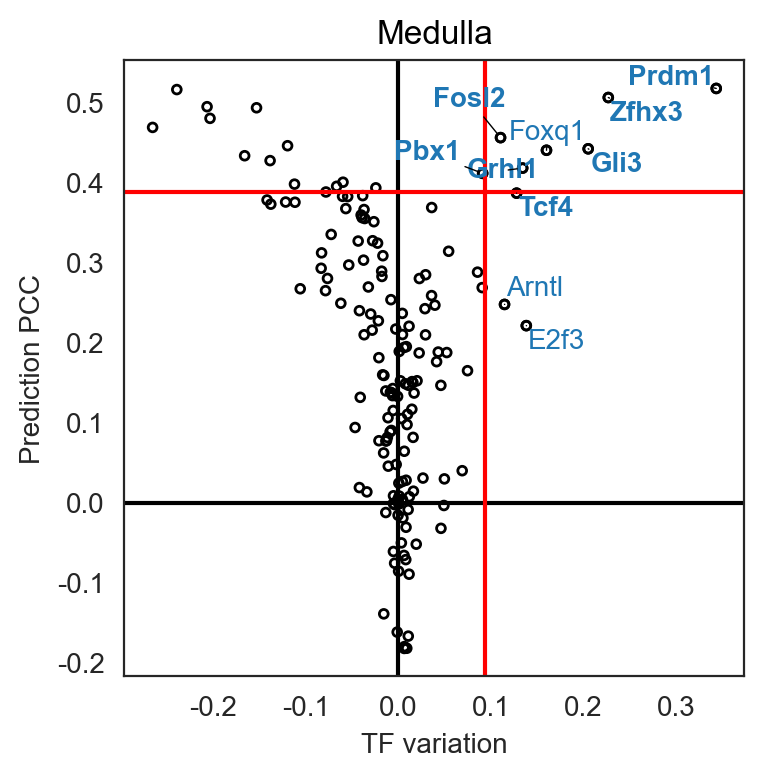

In [177]:
plt.rcParams["figure.figsize"] = [4, 4]
save = ''
save1 = os.path.join(save,'pcc_coef_compare.png')
save2 = os.path.join(save,'pcc_coef_de_compare.png')
save, save1, save2 = None, None, None

save_dir = '/nfs/public/lichen/results/ISDE_GRN/mouse_skin/figures/scatter_plot'
os.makedirs(save_dir,exist_ok=True)
save_dir_fig = os.path.join(save_dir,f'scatter_{control_cluster}.pdf')
change_tf=plot_score_comparison_2D_test(df, 
                         value='value', 
                         cluster1=x_name, 
                         cluster2=y_name, 
                         percentile1=percentile,
                         percentile2=percentile,
                         annot_shifts=None, 
                         save=None, 
                         fillna_with_zero=True, 
                         plt_show=True,
                         select='union',
                         plot_de_gene=plot_de_gene,
                         neg_gene_tf=neg_gene_tf,
                         pos_gene_tf=pos_gene_tf,
                         title1=''+control_cluster,
                         title2='',
                         save1=save_dir_fig,
                         save2=save2,
                         goi_size=10,
                         point_size=10,
                         gt_tforf=pos_gene)

In [26]:
tf_pos_control_list, pos_gene_filter_list

(('Prdm1',
  'Zfhx3',
  'Fosl2',
  'Foxq1',
  'Pbx1',
  'Grhl1',
  'Gli3',
  'Tcf4',
  'Arntl',
  'E2f3'),
 ['Gli3',
  'Prdm1',
  'Foxp1',
  'Zfhx3',
  'Grhl1',
  'Pbx1',
  'Tcf4',
  'Lef1',
  'Fosl2',
  'Maf'])

# TF combination

In [88]:
from itertools import combinations

TF_combination_dict = {}
for TF_combination in list(combinations(tf_pos_control_list,3)):
    TF_pcc = cal_control_pcc(change_tf=list(TF_combination),
                                  rr=rr_corr,
                                  tf_GRN_mtx=tf_GRN_mtx,
                                  diff_ave=(control_ave-init_ave).ravel(),
                                  mode='multi',
                                  if_print=False,
                                  tf_GRN_dict=total_tf_GRN_dict[combine])
    TF_combination_dict[TF_combination] = TF_pcc
    
df = pd.DataFrame({'TF_combination':TF_combination_dict.keys(),
                   'PCC':TF_combination_dict.values()})
df = df.sort_values(by='PCC',ascending=False)
df = df.reset_index()
df

index         TF_combination       PCC
0        14     (Cebpb, Spi1, Fos)  0.802504
1         5     (Cebpb, Spi1, Maf)  0.798228
2         3    (Cebpb, Spi1, Mafb)  0.798154
3         2   (Cebpb, Spi1, Mef2a)  0.796183
4         7    (Cebpb, Spi1, Maff)  0.795065
...     ...                    ...       ...
6540   6418   (Rfx7, Hivep3, Junb)  0.120604
6541   6540  (Hivep3, Zfhx3, Junb)  0.116865
6542   6421     (Rfx7, Tfeb, Junb)  0.104464
6543   6543    (Tfeb, Zfhx3, Junb)  0.101498
6544   6537   (Hivep3, Tfeb, Junb)  0.098655

[6545 rows x 3 columns]

In [78]:
for i in list(combinations(tf_pos_control_list,3)):
    if 'Cebpa' in i and 'Cebpb' in i and 'Spi1' in i:
        print(i)

('Cebpb', 'Spi1', 'Cebpa')


In [89]:
df[df.TF_combination==('Cebpb', 'Spi1', 'Cebpa')]

index        TF_combination      PCC
25     23  (Cebpb, Spi1, Cebpa)  0.79085

# function

In [12]:
def plot_umap_transition_test(adata,
                         change_tf,
                         rr,
                         X,
                         cluster_name_for_GRN_unit,
                         init_cluster,
                         control_cluster,
                         init_ave,
                         control_ave,
                         pca_train,
                         umap_train,
                         mode='single',
                         layer_use='normalized_count',
                         bbox_list=None,
                         title_list=None,
                         fig_size=None,
                         save=None,
                         save_prefix=None,
                         if_close=False,
                         tf_GRN_mtx=None,
                         oracle=None,
                         save_format='png'):
    # calculate the shift
    shift_coef = []
    if mode=='multi':
        if len(change_tf)==1:raise ValueError('the mode is wrong!')
        for (i,gene) in enumerate(tf_GRN_mtx.index): 
            if gene in list(change_tf):
                shift_coef.append(rr.coef_[i])
            else:
                shift_coef.append(0)


    elif mode=='single':
        if len(change_tf)>1:raise ValueError('the mode is wrong!')
        TF_pcc_dict, TF_acc_dict = {}, {}
        for TF in list(change_tf):
            shift_coef = []
            for (i,gene) in enumerate(tf_GRN_mtx.index): 
                if gene==TF:
                    shift_coef.append(rr.coef_[i])
                else:
                    shift_coef.append(0)
    
    # calculate the total gene shift
    # gene_shift = tf_GRN_mtx.T.values.dot((shift_coef))+rr.intercept_
    gene_shift = X.dot((shift_coef))+rr.intercept_
    
    gem = _adata_to_df(oracle.adata, layer_use)
    
    gem_transition = gem.copy()
    gem_transition.iloc[:,:] = gem_transition.iloc[:,:]+gene_shift
    
    # filter gem_transition to the init_cluster
    cluster_info = adata.obs[cluster_name_for_GRN_unit]
    gem_transition = gem_transition[(cluster_info == init_cluster)]
    
    X_umap_list, label_list=[], []
    
    # use the trained pca and umap to show the transition
    X_pca = pca_train.transform(gem.values)
    X_umap = umap_train.transform(X_pca)
    X_umap_list.append(X_umap)
    label_list.append(adata.obs[cluster_name_for_GRN_unit])
    
    # get the transition part
    X_pca = pca_train.transform(gem_transition.values)
    X_umap = umap_train.transform(X_pca)
    X_umap_list.append(X_umap)
    label_list.append([init_cluster+' transition']*len(X_umap))
    
    # bbox_list = [1.75, 1.2]
    
    # color_list = ['#e7dad2','#8ecfc9','#ffbe7a','#82b0d2']
    hue_dict = {
        # 'TAC-1':'#e7dad2',
               'TAC-1':'#807377',
               'Hair Shaft-cuticle.cortex':'#8ecfc9',
               'IRS':'#ffbe7a',
               'Medulla':'#82b0d2'}
    celltype_list = ['TAC-1','Hair Shaft-cuticle.cortex','IRS','Medulla']
    
    # plot the transition respectively
    fig=plt.figure(figsize=fig_size)
    for i in range(2):
        fig=plt.figure(figsize=fig_size)
        df = {'UMAP1':X_umap_list[i][:, 0],\
              'UMAP2':X_umap_list[i][:, 1], \
              'label':label_list[i]}
        df = pd.DataFrame(df)
        if i==0:
            celltype_list = ['TAC-1','Hair Shaft-cuticle.cortex','IRS','Medulla']
            color_list = [hue_dict[celltype] for celltype in celltype_list]
        else:
            celltype_list = [init_cluster+' transition']
            color_list = [hue_dict[init_cluster]]
            # hue_order = [init_cluster+' transition']
        ax = sns.scatterplot(x="UMAP1", 
                             y="UMAP2", 
                             hue="label",
                             edgecolor='none',
                             hue_order=celltype_list,
                             # saturation=1,
                             # palette = 'tab10',
                             palette = color_list,
                             s=8,linewidth = 0.0001, data=df)
        plt.xticks(rotation=0,fontsize=15)
        plt.yticks(rotation=0,fontsize=15)

        # ax.set(title='original UMAP',xlabel='UMAP_1')
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        if i>0:
            ax.set_xlim(lim1_x,lim2_x)
            ax.set_ylim(lim1_y,lim2_y)
        ax.set_title(title_list[i],fontsize=18)
        axLine, axLabel = ax.get_legend_handles_labels()
        # ax.legend([],[],frameon=False)
        ax.legend(loc='upper right',bbox_to_anchor=(bbox_list[i], 1),
                 frameon=False)
        if i==0:
            lim1_y,lim1_x,lim2_y,lim2_x=ax.get_ylim()[0],ax.get_xlim()[0],ax.get_ylim()[1],ax.get_xlim()[1]
        if False:
            if mode=='multi':
                if save_format == 'png':
                    fig.savefig(os.path.join(save,f'tansition visualization-{mode}-{save_prefix}-{title_list[i]}.png'),facecolor='white',bbox_inches='tight',dpi=400)
                if save_format == 'pdf':
                    fig.savefig(os.path.join(save,f'UMAP_total-{mode}-{init_cluster}-{control_cluster}.pdf'),facecolor='white',bbox_inches='tight')
            elif mode=='single':
                fig.savefig(os.path.join(save,f'tansition visualization-{mode}-{change_tf[0]}-{save_prefix}-{title_list[i]}.png'),facecolor='white',bbox_inches='tight',dpi=400)
        if if_close:plt.close()
    # fig.savefig(save,facecolor='white',bbox_inches='tight',dpi=400)
    
    
    # get the centroids of init, control, transition
    init_centroid = umap_train.transform(pca_train.transform(init_ave.reshape(1,-1)))
    control_centroid = umap_train.transform(pca_train.transform(control_ave.reshape(1,-1)))
    transition_centroid = umap_train.transform(pca_train.transform((init_ave.ravel()+gene_shift).reshape(1,-1)))

    x_init, y_init = init_centroid[0][0],init_centroid[0][1]
    x_control, y_control = control_centroid[0][0],control_centroid[0][1]
    x_transition, y_transition = transition_centroid[0][0],transition_centroid[0][1]
    
    # plot the transition with arrow
    for i in range(1):
        fig=plt.figure(figsize=fig_size)
        plt.grid(True)
        df = {'UMAP1':list(X_umap_list[0][adata.obs[cluster_name_for_GRN_unit].isin([init_cluster,control_cluster])][:, 0])+list(X_umap_list[1][:, 0]),\
              'UMAP2':list(X_umap_list[0][adata.obs[cluster_name_for_GRN_unit].isin([init_cluster,control_cluster])][:, 1])+list(X_umap_list[1][:, 1]), \
              'label':list(adata.obs[adata.obs[cluster_name_for_GRN_unit].isin([init_cluster,control_cluster])][cluster_name_for_GRN_unit])+list(label_list[1])}
        df = pd.DataFrame(df)
        
        # celltype_list = ['TAC-1','Hair Shaft-cuticle.cortex','IRS','Medulla']
        celltype_list = [init_cluster,control_cluster,init_cluster+' transition'] # '#ff8884'/#c64848/#c82423/#e06666
        color_list = [hue_dict[celltype] if 'transition' not in celltype else '#e06666' for celltype in celltype_list]
        
        ax = sns.scatterplot(x="UMAP1", 
                             y="UMAP2", 
                             hue="label",
                             edgecolor='none',
                             hue_order=celltype_list,
                             # saturation=1,
                             palette = color_list, 
                             s=8,linewidth = 0.0001, data=df)

        size = 50
        marker = 'x'
        c = 'black'
        arrow_scale = 0.9
        plt.scatter(x_init, y_init,c=c,s=size,marker=marker)
        plt.scatter(x_control, y_control,c=c,s=size,marker=marker)
        plt.scatter(x_transition, y_transition,c=c,s=size,marker=marker)
        plt.arrow(x_init+(x_control-x_init)*(1-arrow_scale), y_init+(y_control-y_init)*(1-arrow_scale),(x_control-x_init)*(2*arrow_scale-1), (y_control-y_init)*(2*arrow_scale-1),color='black',width=0.05,shape='full')
        plt.arrow(x_init+(x_transition-x_init)*(1-arrow_scale), y_init+(y_transition-y_init)*(1-arrow_scale),(x_transition-x_init)*(2*arrow_scale-1), (y_transition-y_init)*(2*arrow_scale-1),color='red',width=0.05,shape='full')

        plt.xticks(rotation=0,fontsize=15)
        plt.yticks(rotation=0,fontsize=15)

        # ax.annotate("123", xy=(2, 2), xytext=(1, 1),
        #         arrowprops=dict(arrowstyle="->"))

        # ax.set(title='original UMAP',xlabel='UMAP_1')
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        if i>=0:
            ax.set_xlim(lim1_x,lim2_x)
            ax.set_ylim(lim1_y,lim2_y)
        ax.set_title(title_list[2],fontsize=18)
        axLine, axLabel = ax.get_legend_handles_labels()
        # ax.legend([],[],frameon=False)
        ax.legend(loc='upper right',bbox_to_anchor=(bbox_list[2], 1),
                 frameon=False)
        if i==0:
            lim1_y,lim1_x,lim2_y,lim2_x=ax.get_ylim()[0],ax.get_xlim()[0],ax.get_ylim()[1],ax.get_xlim()[1]
        if save:
            if mode=='multi':
                if save_format == 'png':
                    fig.savefig(os.path.join(save,f'tansition visualization-{mode}-{save_prefix}-{title_list[2]}.png'),facecolor='white',bbox_inches='tight',dpi=400)
                if save_format == 'pdf':
                    fig.savefig(os.path.join(save,f'UMAP_transition-{mode}-{init_cluster}-{control_cluster}.pdf'),facecolor='white',bbox_inches='tight')
            elif mode=='single':
                if save_format == 'png':
                    fig.savefig(os.path.join(save,f'tansition visualization-{mode}-{change_tf[0]}-{save_prefix}-{title_list[2]}.png'),facecolor='white',bbox_inches='tight',dpi=400)
                if save_format == 'pdf':
                    fig.savefig(os.path.join(save,f'UMAP_transition-{mode}-{change_tf[0]}-{init_cluster}-{control_cluster}.pdf'),facecolor='white',bbox_inches='tight')
        
        if if_close:plt.close()

In [13]:
def _plot_goi(x, y, goi, args_annot, scatter=False, x_shift=0.1, y_shift=0.1, color='black', goi_size=10, weight='normal'):
    """
    Plot an annoation to highlight one point in scatter plot.

    Args:
        x (float): Cordinate-x.
        y (float): Cordinate-y.
        args_annot (dictionary): arguments for matplotlib.pyplot.annotate().
        scatter (bool): Whether to plot dot for the point of interest.
        x_shift (float): distance between the annotation and the point of interest in the x-axis.
        y_shift (float): distance between the annotation and the point of interest in the y-axis.
    """
    
    default = {"size": goi_size}
    default.update(args_annot)
    args_annot = default.copy()

    arrow_dict = {"width": 0.2, "headwidth": 0.5, "headlength": 1, "color": color}
    if scatter:
        plt.scatter(x, y, c="none", edgecolor=color)
    anno = plt.annotate(f"{goi}", xy=(x, y), 
                #  textcoords="offset points",
                 xytext=(x, y),
                        weight=weight,
                 # xytext=(x+x_shift, y+y_shift),
                 color=color, 
                        # arrowprops=arrow_dict,
                        **args_annot)
    return anno

In [14]:
def plot_score_comparison_2D_test(df, value, cluster1, cluster2, percentile1=99,percentile2=99, 
                             annot_shifts=None, save=None, fillna_with_zero=True, plt_show=True,
                             select='union',plot_de_gene=True,neg_gene_tf=None,pos_gene_tf=None,title1=None,
                             title2=None,if_line=True,save1=None,save2=None,links=None,goi_size=10,point_size=15,
                                 gt_tforf=None):
    """
    Make a scatter plot that shows the relationship of a specific network score in two groups.

    Args:
        links (Links object): See network_analisis.Links class for detail.
        value (srt): The network score to be shown.
        cluster1 (str): Cluster nome to analyze. Network scores in the cluste1 are shown as x-axis.
        cluster2 (str): Cluster nome to analyze. Network scores in the cluste2 are shown as y-axis.
        percentile (float): Genes with a network score above the percentile will be shown with annotation. Default is 99.
        annot_shifts ((float, float)): Shift x and y cordinate for annotations.
        save (str): Folder path to save plots. If the folde does not exist in the path, the function create the folder.
            If None plots will not be saved. Default is None.
        select (str):
            1.'union'
            2.'intersect'
    """
    piv = pd.pivot_table(df, values=value, columns="cluster", index="index")
    if fillna_with_zero:
        piv = piv.fillna(0)
    else:
        piv = piv.fillna(piv.mean(axis=0))

    goi1 = piv[piv[cluster1] > np.percentile(piv[cluster1][piv[cluster1].values>0].values, percentile1)].index
    goi2 = piv[piv[cluster1] < np.percentile(piv[cluster1][piv[cluster1].values<0].values, 100-percentile1)].index
    goi3 = piv[piv[cluster2] > np.percentile(piv[cluster2].values, percentile2)].index
    goi4 = piv[piv[cluster1] > 0].index
    gois = np.intersect1d(goi4,np.union1d(goi1, goi3))
    
    thre1 = np.percentile(piv[cluster1][piv[cluster1].values>0].values, percentile1)
    thre2 = np.percentile(piv[cluster2].values, percentile2)

    x, y = piv[cluster1], piv[cluster2]
    plt.scatter(x, y, c="none", edgecolor="black",s=point_size)

    if annot_shifts is None:
        x_shift, y_shift = (x.max() - x.min())*0.03, (y.max() - y.min())*0.03
    else:
        x_shift, y_shift = annot_shifts


    # for goi in gois:
    #     x, y = piv.loc[goi, cluster1], piv.loc[goi, cluster2]
    #     _plot_goi(x, y, goi, {}, scatter=False, x_shift=x_shift, y_shift=y_shift,color='#1f77b4',goi_size=goi_size)
    
    anno_list = []
    for goi in gois:
        x, y = piv.loc[goi, cluster1], piv.loc[goi, cluster2]
        if goi in gt_tforf:
            plt.scatter(x, y, c="none", edgecolor="black",s=point_size)
            anno = _plot_goi(x, y, goi, {}, scatter=False, x_shift=x_shift, y_shift=y_shift,color='#1f77b4',goi_size=goi_size,weight='bold')
            anno_list.append(anno)
        else:
            plt.scatter(x, y, c="none", edgecolor='black',s=point_size)
            anno = _plot_goi(x, y, goi, {}, scatter=False, x_shift=x_shift, y_shift=y_shift,color='#1f77b4',goi_size=goi_size)
            anno_list.append(anno)
    adjust_text(anno_list,lim=500,
                expand_objects=(1.05,1.05),
               force_text=(0.02,0.01),
                precision=0.005,
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5)
               )        
    

    # plt.xlabel(cluster1)
    # plt.ylabel(cluster2)
    plt.xlabel('TF variation')
    plt.ylabel('Prediction PCC')
    plt.axvline(x=0,color='black')
    plt.axhline(y=0,color='black')
    if if_line:
        plt.axvline(x=thre1,color='r')
        plt.axhline(y=thre2,color='r')
        # plt.axhline(y=thre3,color='r')

    xmin, xmax, ymin, ymax = plt.axis()
    if title1==None:
        plt.title(f"{value}")
    else:
        plt.title(title1)
    if not save is None:
        os.makedirs(save, exist_ok=True)
        path = os.path.join(save, f"values_comparison_in_{links.name}_{value}_{links.threshold_number}_{cluster1}_vs_{cluster2}.{settings['save_figure_as']}")
        plt.savefig(path, transparent=True)

    if save1:
        # plt.savefig(save1,dpi=400
        plt.savefig(save1 ,bbox_inches='tight',facecolor='white')
    if plt_show:
        plt.show()
    else:
        plt.close()
            
    return gois